# Dataset Exploration
This notebook serves to dive deeper into the properties of our data.

In [2]:
from pathlib import Path
import sys
sys.path.append('..') # add the parent directory to system path

%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import torch
from src.data.dataset import CnvDataset

In [4]:
from plotnine import *

In [5]:
# directories we will need
git_root = Path('..')
data_root = git_root / 'data'
assert data_root.exists()

# dataset split files
b1_train_path = data_root / 'splits' / 'batch1_training_filtered.tsv'
b1_val_path = data_root / 'splits' / 'batch1_val_filtered.tsv'
b1_test_path = data_root / 'splits' / 'batch1_test_filtered.tsv'
b2_train_path = data_root / 'splits' / 'batch2_training_filtered.tsv'
b2_val_path = data_root / 'splits' / 'batch2_val_filtered.tsv'
b2_test_path = data_root / 'splits' / 'batch2_test_filtered.tsv'

In [6]:
b1_full_data = data_root / 'preprocessing' / 'classification_median_batch_1.tsv'
b2_full_data = data_root / 'preprocessing' / 'classification_median_batch_2.tsv'

## Raw Data
This section explores the raw data. 

### scATAC-seq
Visualization of the raw scATAC-seq matrix from `.h5` file.

In [16]:
atac_raw_path = data_root / 'raw' / 'H_Kidney_Cancer_Chromium_Nuc_Iso_vs_SaltyEZ_vs_ComplexTissueDP_filtered_feature_bc_matrix.h5'

## Preprocessed Data
Visualizations on the preprocessed data.

### scATAC-seq
One of the inputs to our model are scATAc-seq peaks to inform about open chromatin regions in the genome.
Here we explore the distributions of peaks in this dataset.
The atac peaks are preprocessed and collected in a `.tsv` file by `match_peaks_genes.ipynb`.

In [7]:
atac_b1_path = data_root / 'gene_positions_and_overlaps' / 'overlaps_batch1.tsv'
atac_b2_path = data_root / 'gene_positions_and_overlaps' / 'overlaps_batch1.tsv'

In [8]:
atac_b1_df = pd.read_csv(atac_b1_path, sep='\t')
atac_b1_df

,barcode,Chromosome,Start_peak,End_peak,gene_id,Start_gene,End_gene
0,AAACCAACATGTCAGC-1,1,47997167,47998016,ENSG00000269113,47758528,47999385
1,AAACCGAAGGCGCATC-1,1,97920596,97921519,ENSG00000188641,97075743,97997000
2,AAACCGAAGTAAACCC-1,1,66543200,66543959,ENSG00000118473,66531267,66753139
3,AAACCGAAGTAAACCC-1,1,66648772,66649635,ENSG00000118473,66531267,66753139
4,AAACCGAAGTAAACCC-1,1,171606177,171607044,ENSG00000283683,171598621,171640799
...,...,...,...,...,...,...,...
55150,TTTAGGATCGTTATCT-1,X,109732881,109733753,ENSG00000068366,109622244,109735403
55151,TTTGTTGGTGCCGCAA-1,X,17405116,17405991,ENSG00000188158,17373200,17737994
55152,TTTGTTGGTGCCGCAA-1,X,17526978,17527816,ENSG00000188158,17373200,17737994
55153,TTTGTTGGTGCCGCAA-1,X,17566915,17567797,ENSG00000188158,17373200,17737994


/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 39'. Pick better value with 'binwidth'.


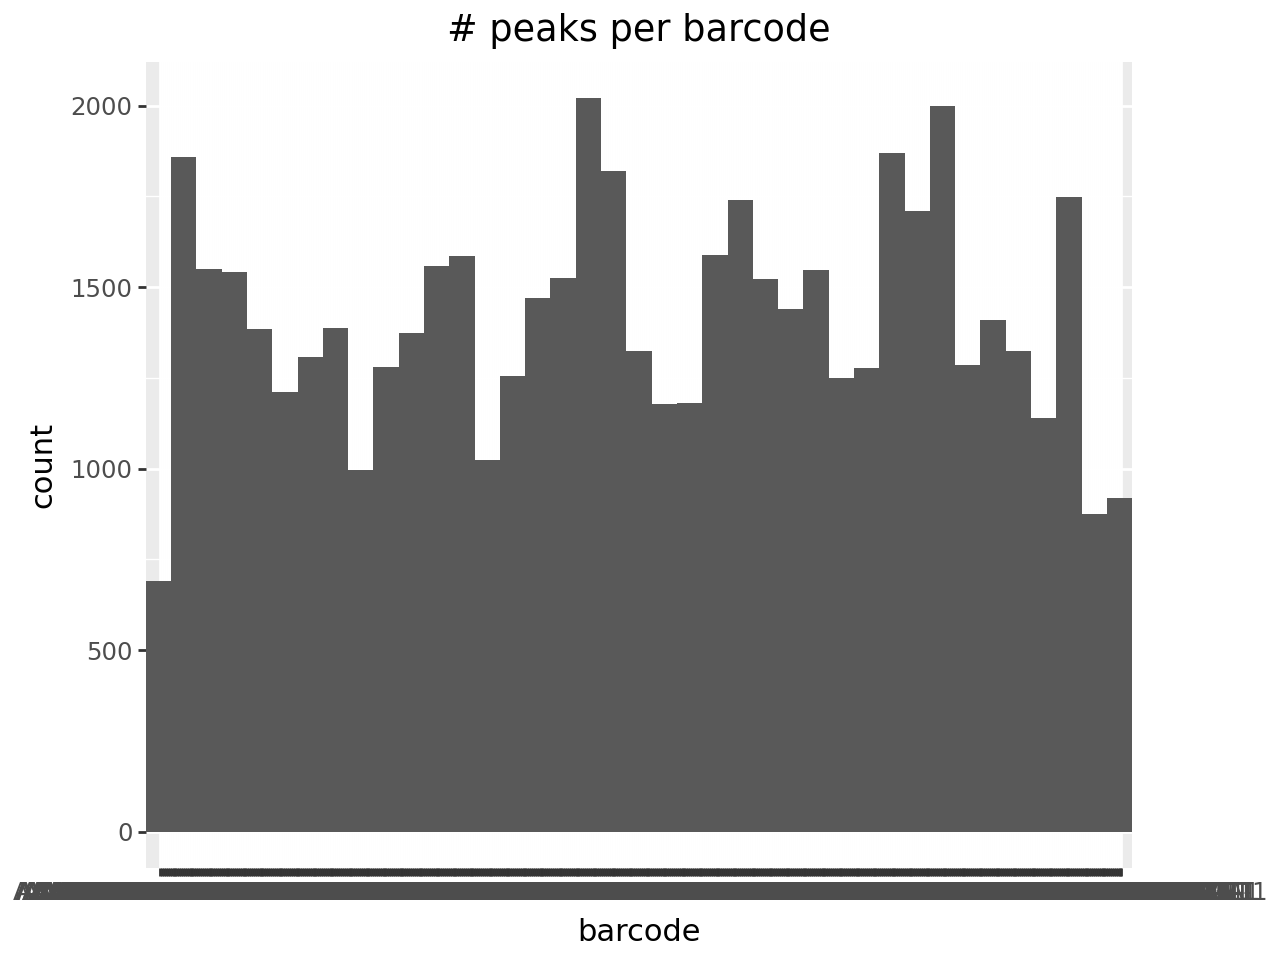

In [9]:
# plot number of peaks per barcode
ggplot(atac_b1_df, aes(x='barcode')) + \
    geom_histogram() + \
    labs(title='# peaks per barcode', x='barcode', y='count')

In [10]:
# calculate peak size
atac_b1_df['peak_length'] = atac_b1_df['End_peak'] - atac_b1_df['Start_peak']

# calculate overlap size between gene and peak
atac_b1_df['overlap_length'] = atac_b1_df['End_peak'] - atac_b1_df['Start_gene']

In [11]:
atac_b1_df

,barcode,Chromosome,Start_peak,End_peak,gene_id,Start_gene,End_gene,peak_length,overlap_length
0,AAACCAACATGTCAGC-1,1,47997167,47998016,ENSG00000269113,47758528,47999385,849,239488
1,AAACCGAAGGCGCATC-1,1,97920596,97921519,ENSG00000188641,97075743,97997000,923,845776
2,AAACCGAAGTAAACCC-1,1,66543200,66543959,ENSG00000118473,66531267,66753139,759,12692
3,AAACCGAAGTAAACCC-1,1,66648772,66649635,ENSG00000118473,66531267,66753139,863,118368
4,AAACCGAAGTAAACCC-1,1,171606177,171607044,ENSG00000283683,171598621,171640799,867,8423
...,...,...,...,...,...,...,...,...,...
55150,TTTAGGATCGTTATCT-1,X,109732881,109733753,ENSG00000068366,109622244,109735403,872,111509
55151,TTTGTTGGTGCCGCAA-1,X,17405116,17405991,ENSG00000188158,17373200,17737994,875,32791
55152,TTTGTTGGTGCCGCAA-1,X,17526978,17527816,ENSG00000188158,17373200,17737994,838,154616
55153,TTTGTTGGTGCCGCAA-1,X,17566915,17567797,ENSG00000188158,17373200,17737994,882,194597


/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 205'. Pick better value with 'binwidth'.


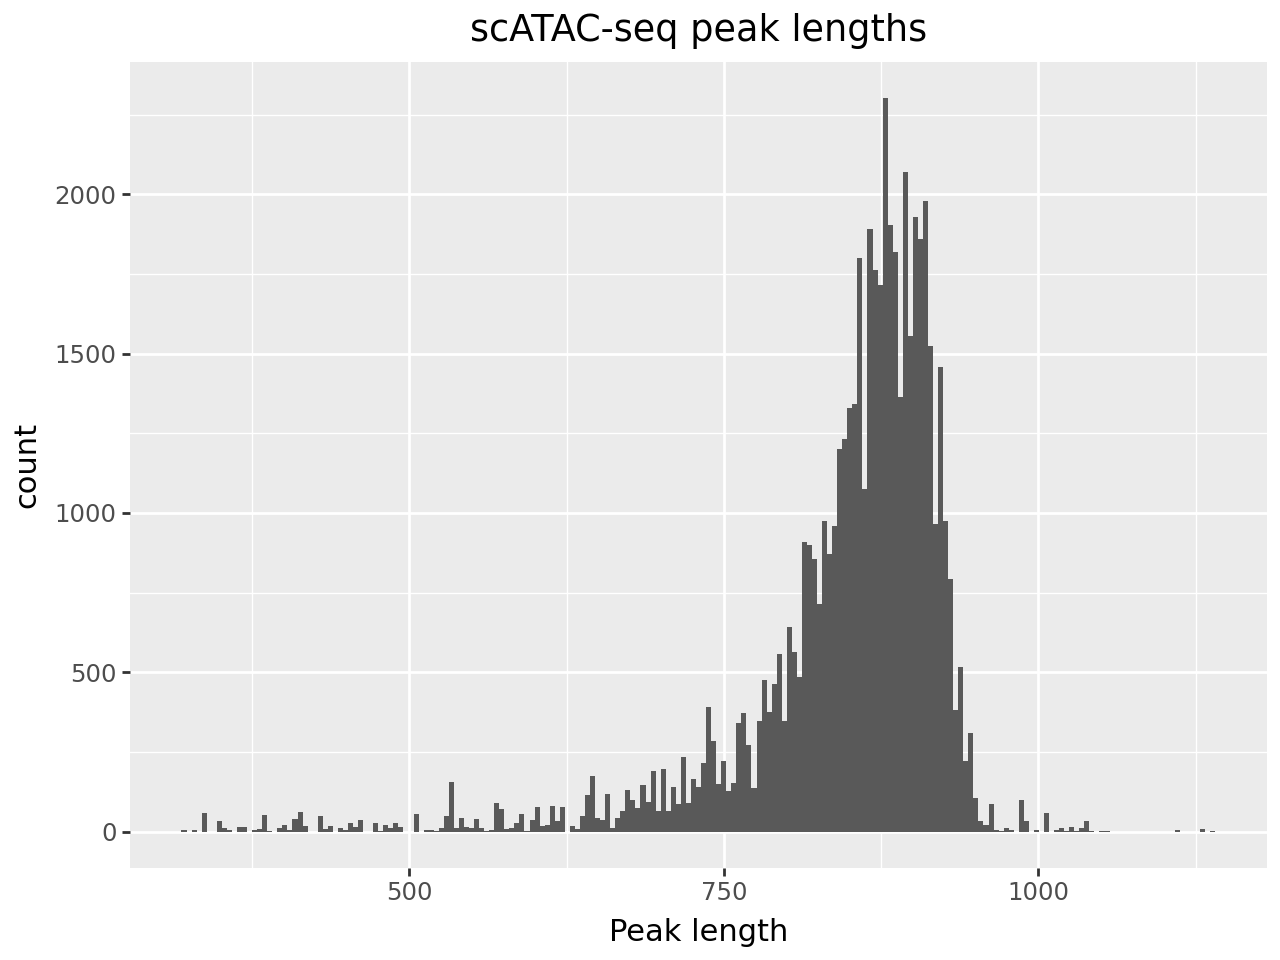

In [12]:
ggplot(atac_b1_df, aes(x='peak_length')) + \
    geom_histogram() + \
    labs(title='scATAC-seq peak lengths', x='Peak length', y='count')

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 166'. Pick better value with 'binwidth'.


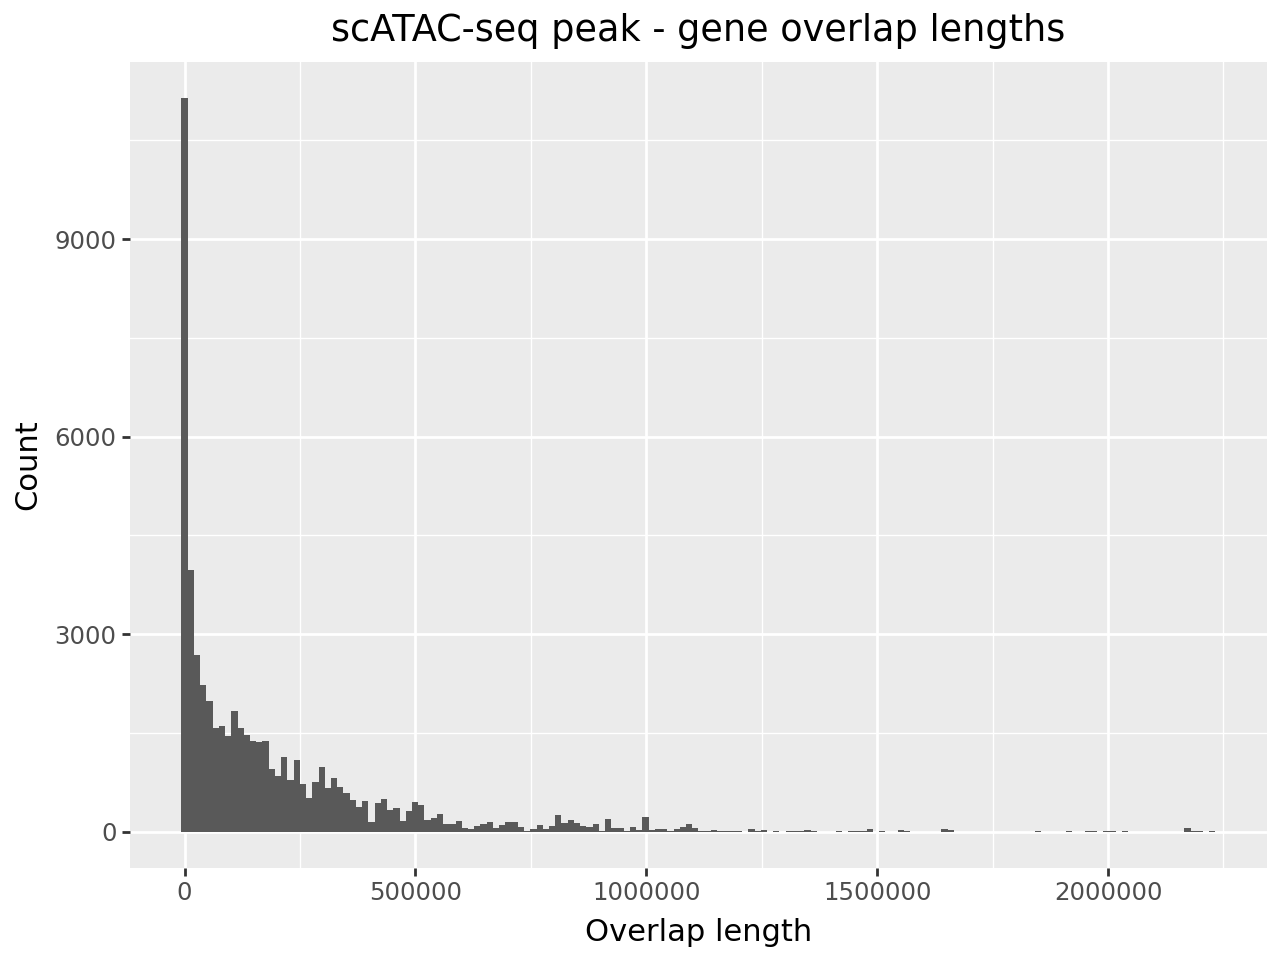

In [13]:
ggplot(atac_b1_df, aes(x='overlap_length')) + \
    geom_histogram() + \
    labs(title='scATAC-seq peak - gene overlap lengths', x='Overlap length', y='Count')

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 111'. Pick better value with 'binwidth'.
/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 42797 rows containing non-finite values.
/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


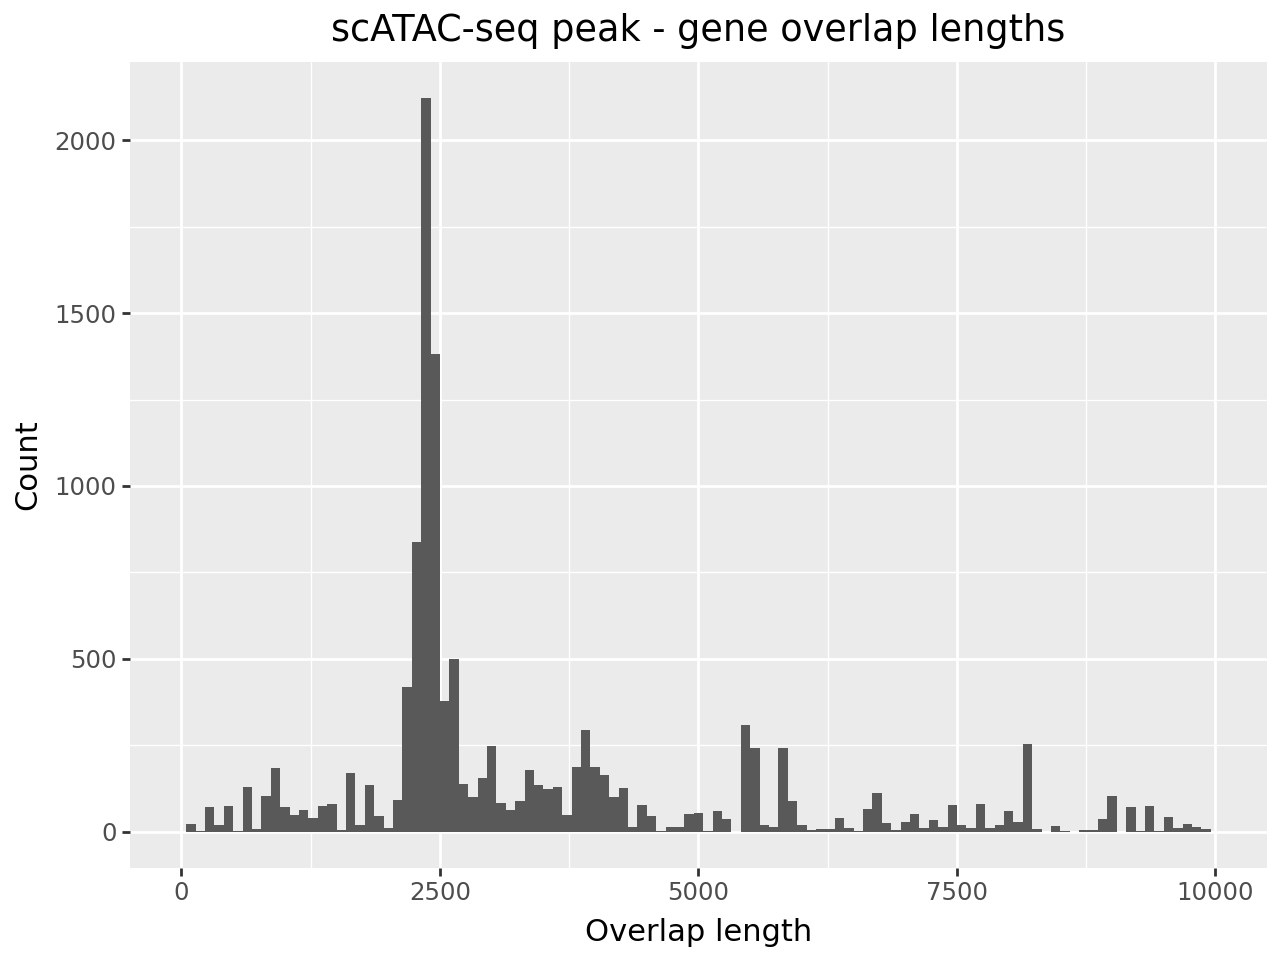

In [15]:
ggplot(atac_b1_df, aes(x='overlap_length')) + \
    geom_histogram() + xlim(0, 10_000) + \
    labs(title='scATAC-seq peak - gene overlap lengths', x='Overlap length', y='Count')

## Data splits

### Split summary
This subsection summarizes the distribution of ATAC, CNV loss/gain and class distribution per split (e.g. stacked bar plot)

In [78]:
b2 = CnvDataset(
    root=data_root / 'embeddings' / 'batch_2' / 'all',
    data_df=pd.read_csv(b2_full_data, sep='\t')
)
b2

Using 5723 barcodes
Using 2000 genes
No embedding files for 11415718 data points in ../data/embeddings/batch_2/all/single_gene_barcode!


<class 'src.data.dataset.CnvDataset'> with 30282 datapoints

In [82]:
b2.data_df.to_csv('../data/splits/batch_2_all_available_data.tsv', sep='\t')

In [6]:
b2_val = CnvDataset(
    root=data_root / 'embeddings' / 'batch_2' / 'val',
    data_df=pd.read_csv(b2_val_path, sep='\t')
)
b2_val

Using 35 barcodes
Using 621 genes
No embedding files for 426 data points in ../data/embeddings/batch_2/val/single_gene_barcode!


<class 'src.data.dataset.CnvDataset'> with 3177 datapoints

In [7]:
b2_val.class_balance().to_numpy()

array([2126, 1051])

In [35]:
def dataset_dist(dataset: CnvDataset):
    return torch.vstack([torch.hstack([e.sum(axis=1), t]) for e, t in dataset])

In [74]:
def dataset_metadata(dist_tensor: torch.Tensor, emb_length=10_000):
    # list elements: 1. no, 2. some, 3. all positions in embedding show signal
    status_matrix = np.zeros(shape=(6, 3))
    # high_atac = [0] * 3
    # low_atac = [0] * 3
    # high_CNV-_loss, low_CNV-_loss = [0] * 3, [0] * 3
    # high_cnv_gain, low_cnv_gain = [0] * 3, [0] * 3
    # no_atac, some_atac, full_atac = 0, 0, 0
    # no_cnv_loss, some_cnv_loss, full_cnv_loss = 0, 0, 0
    # no_cnv_gain, some_cnv_gain, full_cnv_gain = 0, 0, 0
    for atac, cnv_loss, cnv_gain, target_class in dist_tensor[:,4:]:
        target_class = int(target_class)
        if atac == 0:
            status_matrix[target_class, 0] += 1
        elif atac == emb_length:
            status_matrix[target_class, 2] += 1
        else:
            status_matrix[target_class, 1] += 1

        if cnv_loss == 0:
            status_matrix[(2 + target_class), 0] += 1
        elif cnv_loss == emb_length:
            status_matrix[(2 + target_class), 2] += 1
        else:
            status_matrix[(2 + target_class), 1] += 1

        if cnv_gain == 0:
            status_matrix[(4 + target_class), 0] += 1
        elif cnv_gain == emb_length:
            status_matrix[(4 + target_class), 2] += 1
        else:
            status_matrix[(4 + target_class), 1] += 1
    
    # return dataframe for plotting
    return pd.DataFrame({
        'data': [
            'ATAC', 'ATAC', 'ATAC', 'ATAC', 'ATAC', 'ATAC',
            'CNV-', 'CNV-', 'CNV-', 'CNV-', 'CNV-', 'CNV-',
            'CNV+', 'CNV+', 'CNV+', 'CNV+', 'CNV+', 'CNV+'
            ],
        'classification': ['high', 'high', 'high', 'low', 'low', 'low'] * 3,
        'status': ['none', 'part', 'full'] * 6,
        'value': status_matrix.flatten()
        })
    

In [ ]:
b2_val_t = dataset_dist(b2_val)
b2_val_t

tensor([[2241., 2873., 2807.,  ...,    0.,    0.,    0.],
        [2772., 2269., 2125.,  ...,    0.,    0.,    0.],
        [2906., 2107., 2009.,  ...,    0.,    0.,    0.],
        ...,
        [2488., 2597., 2530.,  ...,    0.,    0.,    0.],
        [2022., 2836., 2857.,  ...,    0.,    0.,    0.],
        [2655., 2459., 2390.,  ...,    0.,    0.,    0.]])

In [44]:
b2_val.label_to_class[0]

'high'

In [75]:
b2_val_meta_df = dataset_metadata(b2_val_t)
b2_val_meta_df

,data,classification,status,value
0,ATAC,high,none,1873.0
1,ATAC,high,part,32.0
2,ATAC,high,full,221.0
3,ATAC,low,none,920.0
4,ATAC,low,part,13.0
5,ATAC,low,full,118.0
6,CNV-,high,none,2101.0
7,CNV-,high,part,0.0
8,CNV-,high,full,25.0
9,CNV-,low,none,1017.0


In [22]:
b2_val_t.shape

torch.Size([3177, 7])

In [66]:
cb_df = pd.DataFrame(b2_val.class_balance())
cb_df['status'] = cb_df.index
cb_df['classification'] = 'class balance'
cb_df['data'] = ''
cb_df

,count,status,classification,data
classification,,,,
high,2126,high,class balance,
low,1051,low,class balance,


,data,status,value
0,ATAC,none,2793
1,ATAC,some,45
2,ATAC,full,339
3,CNV loss,none,3118
4,CNV loss,some,0
5,CNV loss,full,59
6,CNV gain,none,2978
7,CNV gain,some,0
8,CNV gain,full,199


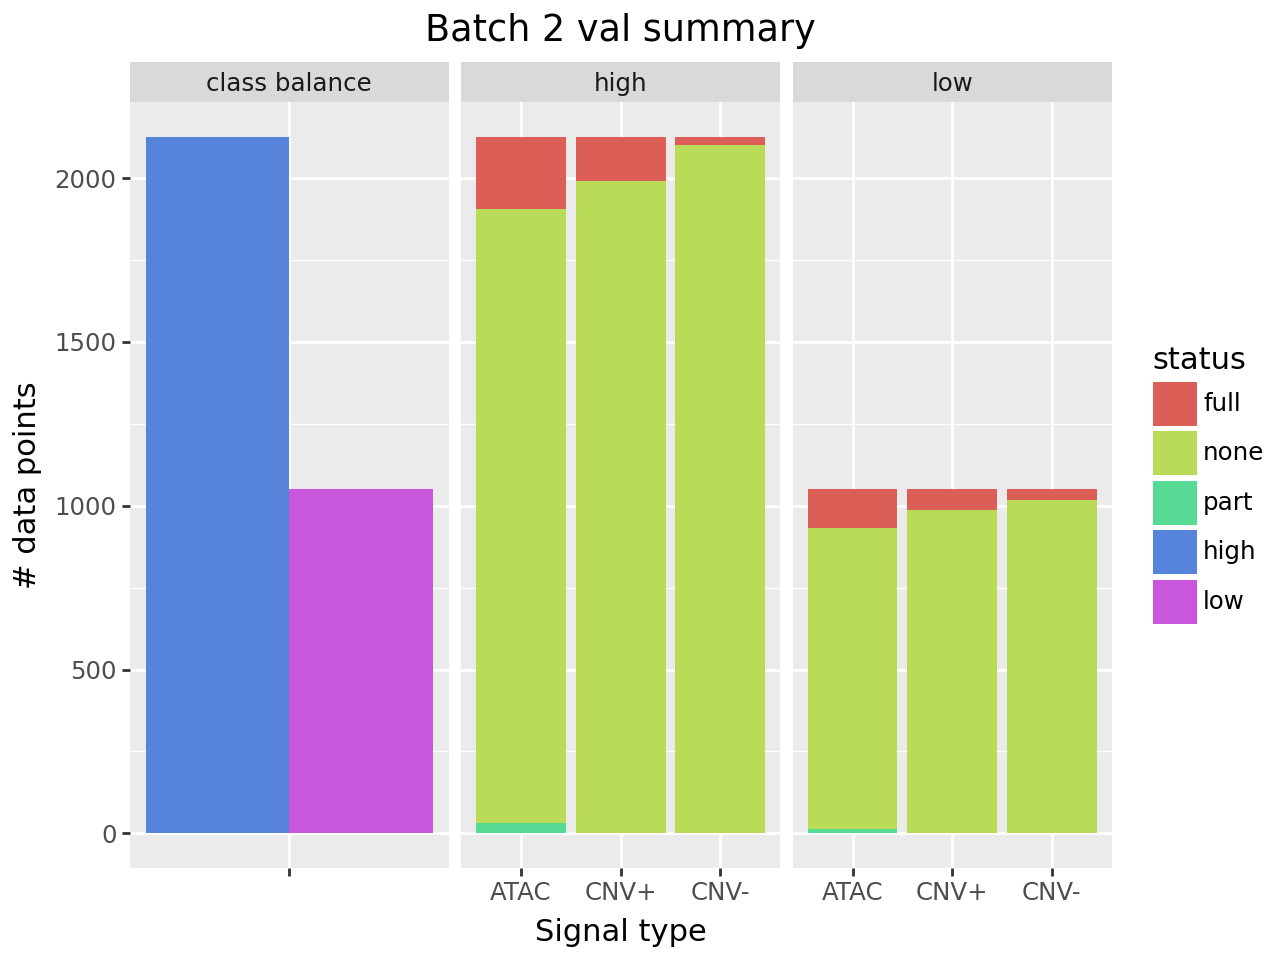

In [77]:
# make overview plot
ggplot(data=b2_val_meta_df, mapping=aes(x='data', y='value')) +\
    geom_col(aes(fill='status'), position='stack') +\
    geom_col(data=cb_df, mapping=aes(y='count', fill='status'), position='dodge') +\
    facet_wrap('~classification', scales='free_x') +\
    labs(title='Batch 2 val summary', x='Signal type', y='# data points')

In [79]:
# TODO: join cell type data

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


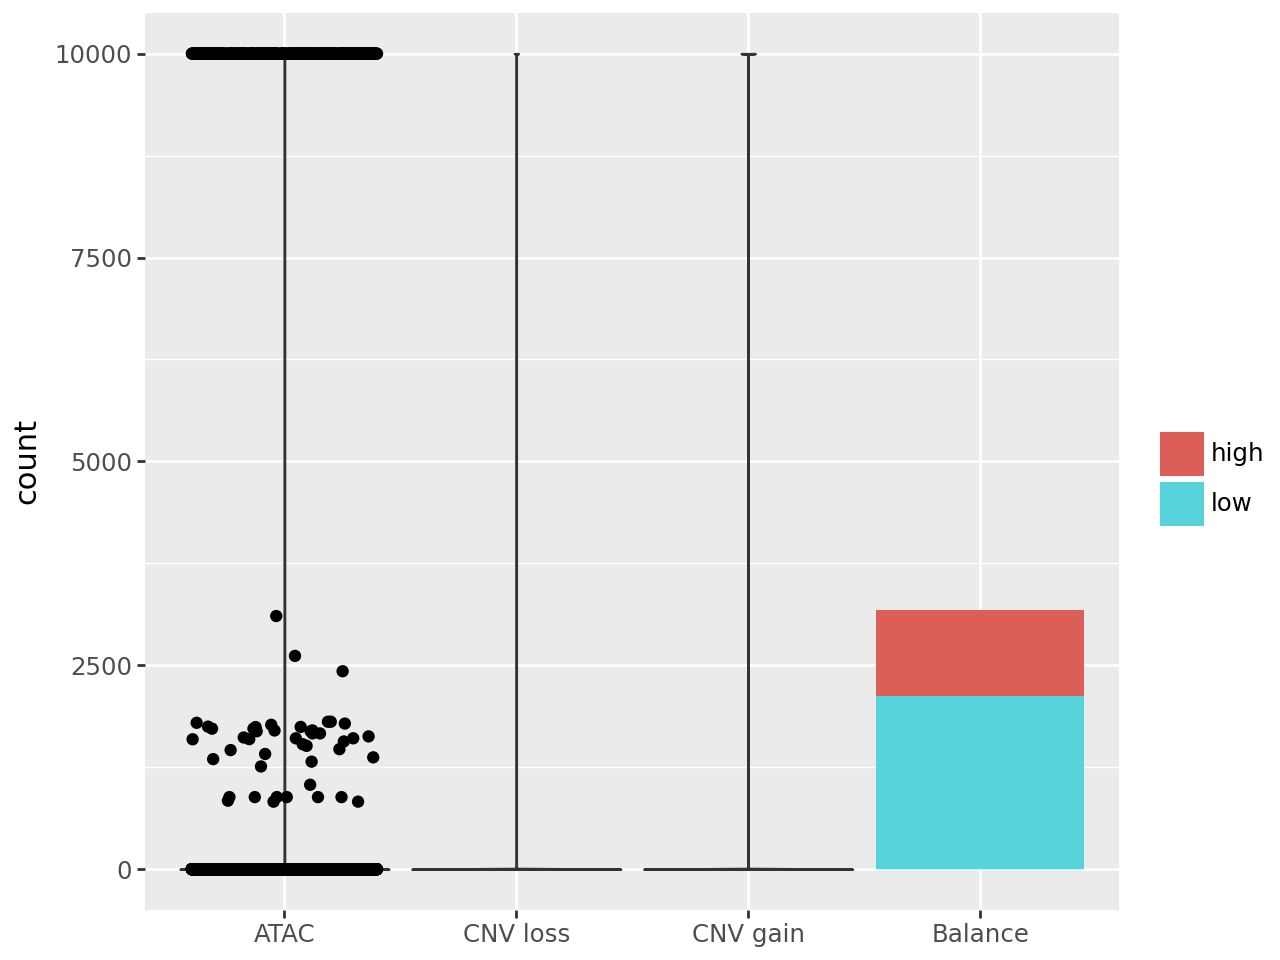

In [26]:
# make overview plot
ggplot(aes(x=['ATAC', 'CNV loss', 'CNV gain', 'Balance'])) +\
    geom_violin(aes(x=['ATAC'] * b2_val_t.shape[0], y=b2_val_t[:,4])) +\
    geom_jitter(aes(x=['ATAC'] * b2_val_t.shape[0], y=b2_val_t[:,4])) +\
    geom_violin(aes(x=['CNV loss'] * b2_val_t.shape[0], y=b2_val_t[:,5])) +\
    geom_violin(aes(x=['CNV gain'] * b2_val_t.shape[0], y=b2_val_t[:,6])) +\
    geom_col(
        aes(x=['Balance'] * 2, y=b2_val.class_balance(), fill=['low', 'high']),
        position='stack'
    )

### Full distributions
This subsection explores the distribution in the datasets per row in each embedding.
Only the rows 5, 6 and 7 are taken into account here, as they encode scATAC, CNV loss and CNV gain respectively.

In [ ]:
def plot_dataset_dist(dataset: CnvDataset, name: str):
    dist_tensor = torch.vstack([e.sum(axis=1) for e, _ in dataset])
    # dist_tensor.sum(dist_tensor, axis=0)

    p = ggplot(aes(x = dist_tensor[:,4])) + geom_histogram() + \
        labs(
            title=name + ' ATAC openess',
            x='Open positions in embedding',
            y='Count'
        )
    p.show()
    
    p = ggplot(aes(x = dist_tensor[:,5])) + geom_histogram() + \
        labs(
            title=name + ' CNV loss',
            x='# positions with CNV loss in embedding',
            y='Count'
        )
    p.show()
    
    p = ggplot(aes(x = dist_tensor[:,6])) + geom_histogram() + \
        labs(
            title=name + ' CNV gain',
            x='# positions with CNV gain in embedding',
            y='Count'
        )
    p.show()
    
    return dist_tensor
    

#### Batch 1 Distributions
Following, the ATAC signal and CNV loss/gain signal distributions will be plotted for all batch 1 dataset splits.

In [ ]:
b1_train = CnvDataset(
    root=data_root / 'embeddings' / 'batch_1' / 'training',
    data_df=pd.read_csv(b1_train_path, sep='\t'),
    file_format='mtx'
)
b1_train

Using 356 barcodes
Using 1595 genes
No embedding files for 4566 data points in ../data/embeddings/batch_1/training/single_gene_barcode!


<class 'src.data.dataset.CnvDataset'> with 54775 datapoints

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 235'. Pick better value with 'binwidth'.


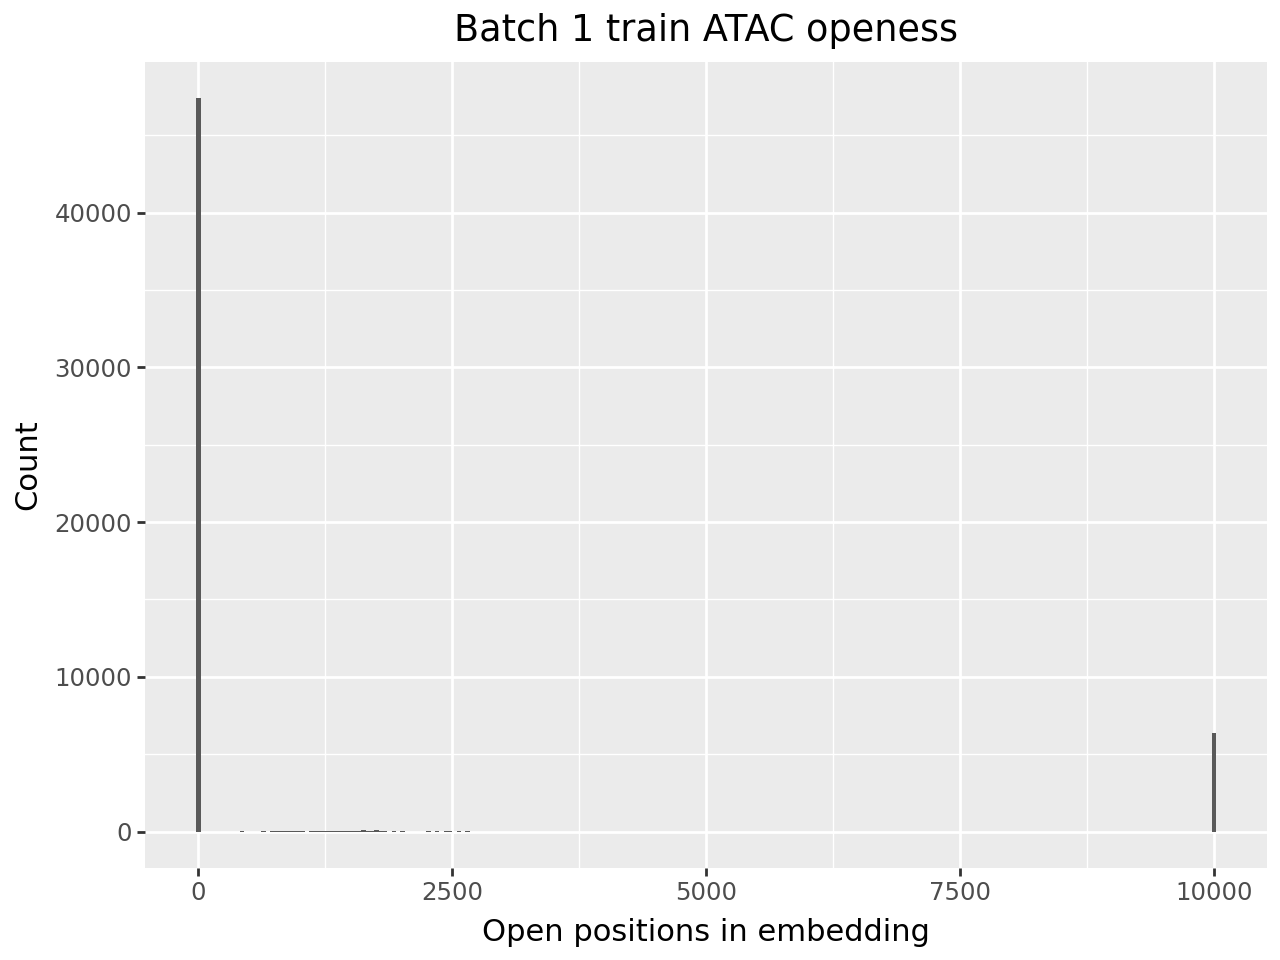

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 235'. Pick better value with 'binwidth'.


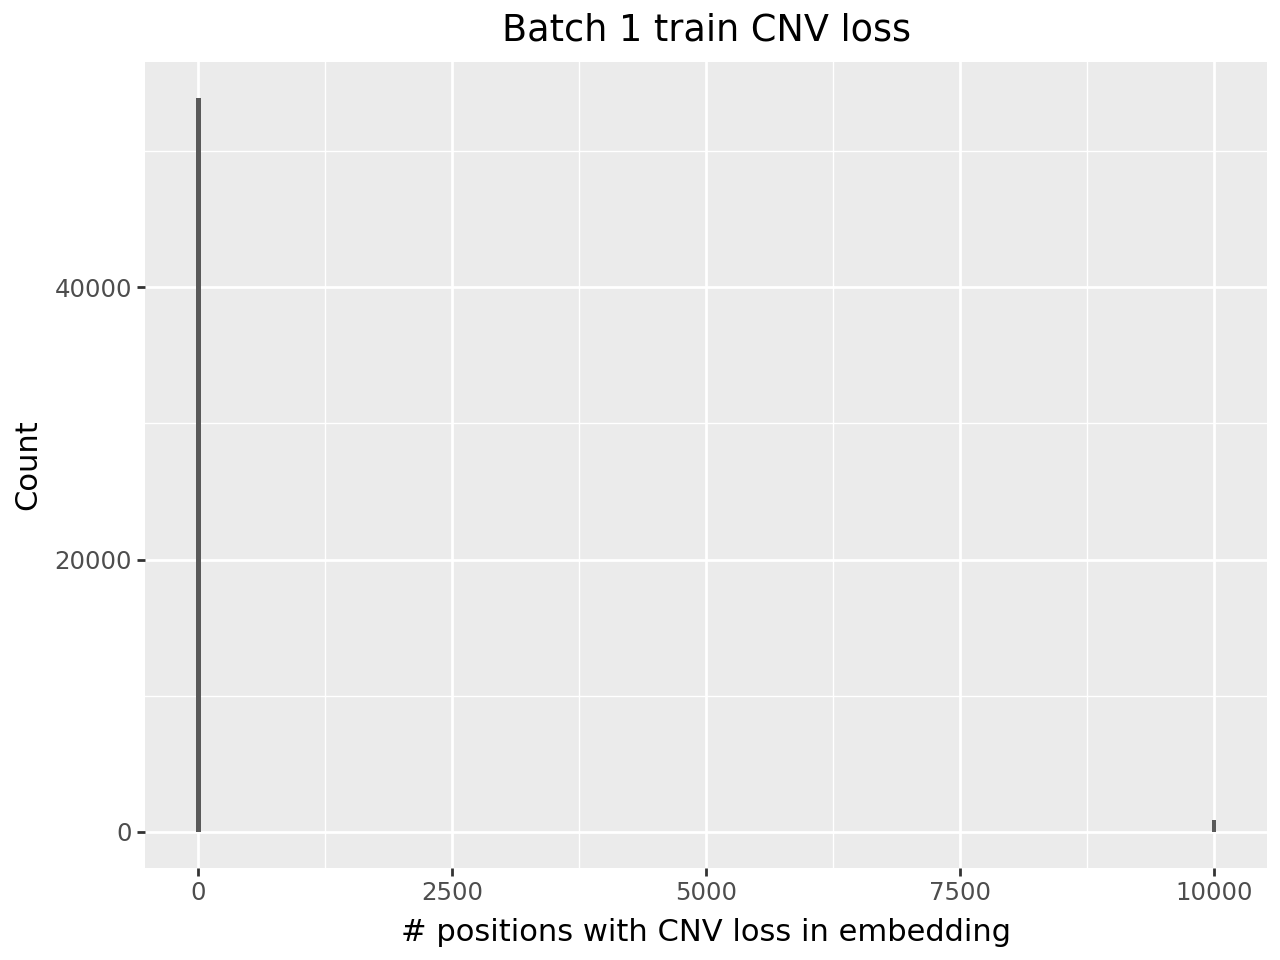

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 235'. Pick better value with 'binwidth'.


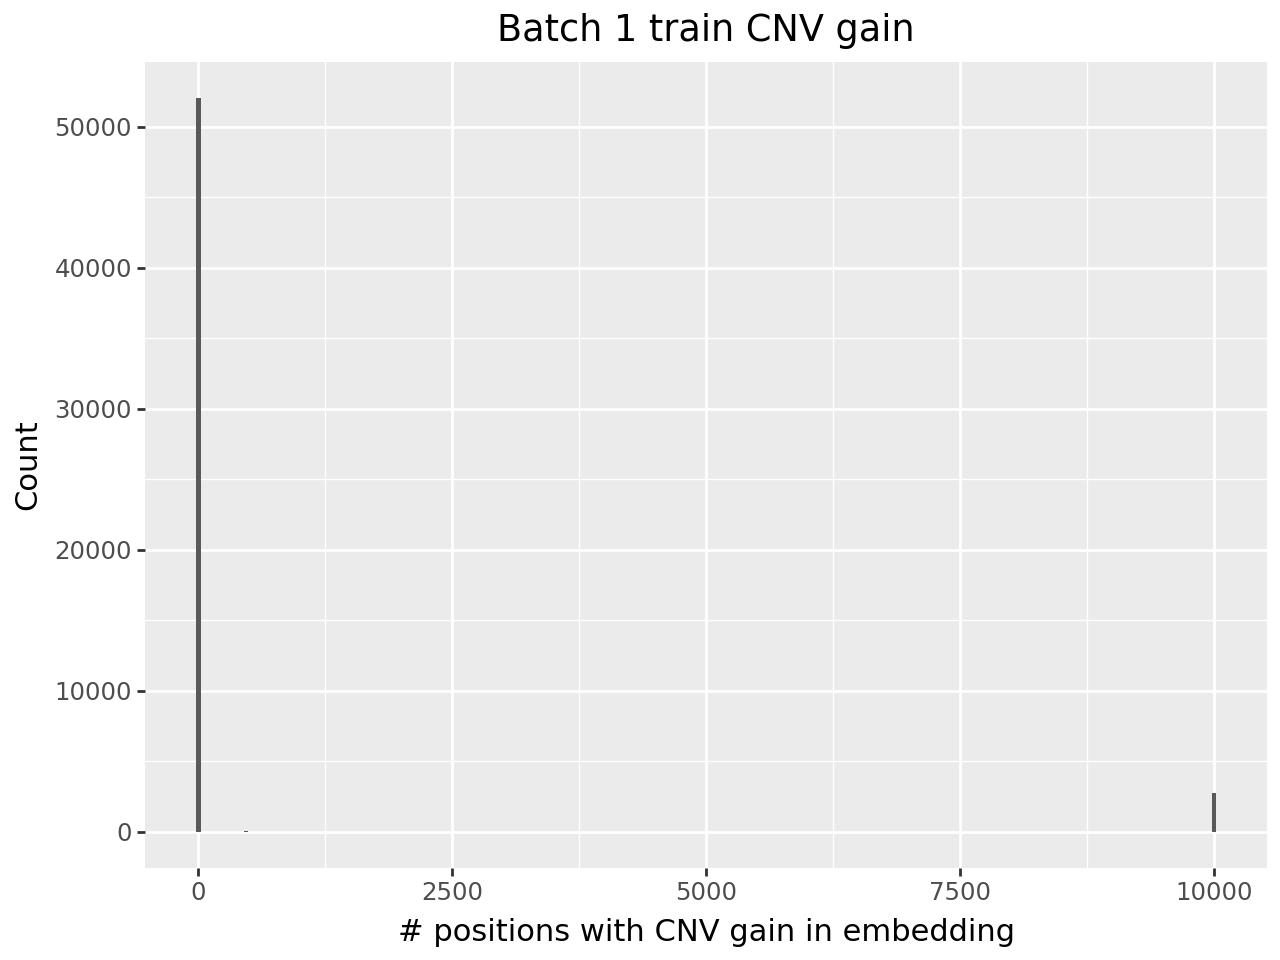

tensor([[2370., 2583., 2751.,  ...,    0.,    0.,    0.],
        [2990., 2003., 1999.,  ...,    0.,    0.,    0.],
        [3491., 1881., 2057.,  ...,    0.,    0.,    0.],
        ...,
        [3128., 1874., 2111.,  ...,    0.,    0.,    0.],
        [2459., 2356., 2635.,  ...,    0.,    0.,    0.],
        [2503., 2226., 2019.,  ...,    0.,    0.,    0.]])

In [ ]:
b1_train_dist_t = plot_dataset_dist(b1_train, name='Batch 1 train')
b1_train_dist_t

In [ ]:
b1_val = CnvDataset(
    root=data_root / 'embeddings' / 'batch_1' / 'val',
    data_df=pd.read_csv(b1_val_path, sep='\t')
)
b1_val

Using 51 barcodes
Using 1093 genes
No embedding files for 988 data points in ../data/embeddings/batch_1/val/single_gene_barcode!


<class 'src.data.dataset.CnvDataset'> with 7966 datapoints

In [ ]:
b1_val_dist_t = plot_dataset_dist(b1_val, name='Batch 1 val')
b1_val_dist_t

NameError: name 'plot_dataset_dist' is not defined

In [ ]:
b1_test = CnvDataset(
    root=data_root / 'embeddings' / 'batch_1' / 'test',
    data_df=pd.read_csv(b1_test_path, sep='\t'),
    file_format='mtx'
)
b1_test

Using 102 barcodes
Using 1235 genes
No embedding files for 3795 data points in ../data/embeddings/batch_1/test/single_gene_barcode!


<class 'src.data.dataset.CnvDataset'> with 14840 datapoints

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 122'. Pick better value with 'binwidth'.


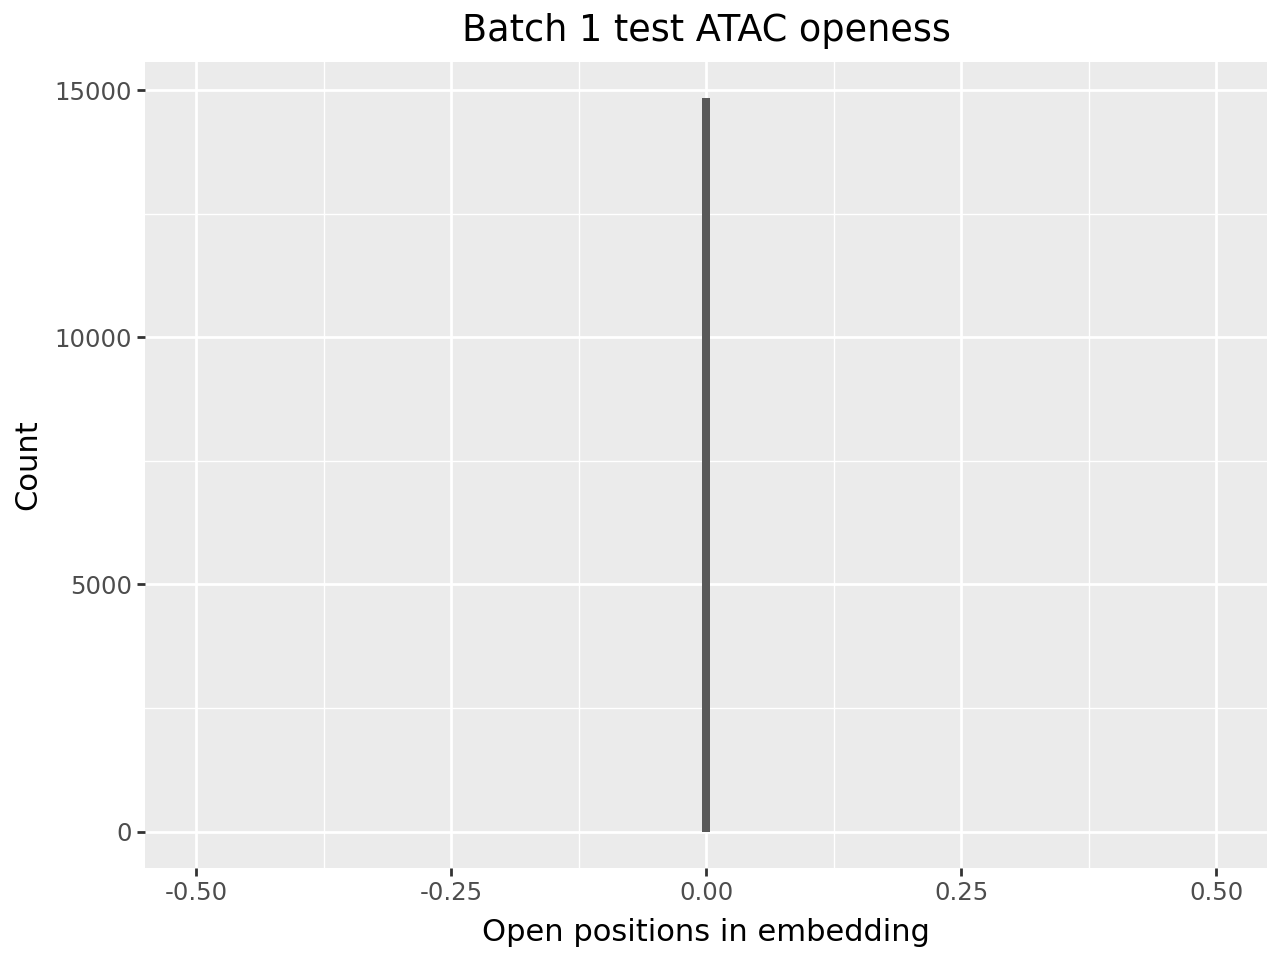

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 122'. Pick better value with 'binwidth'.


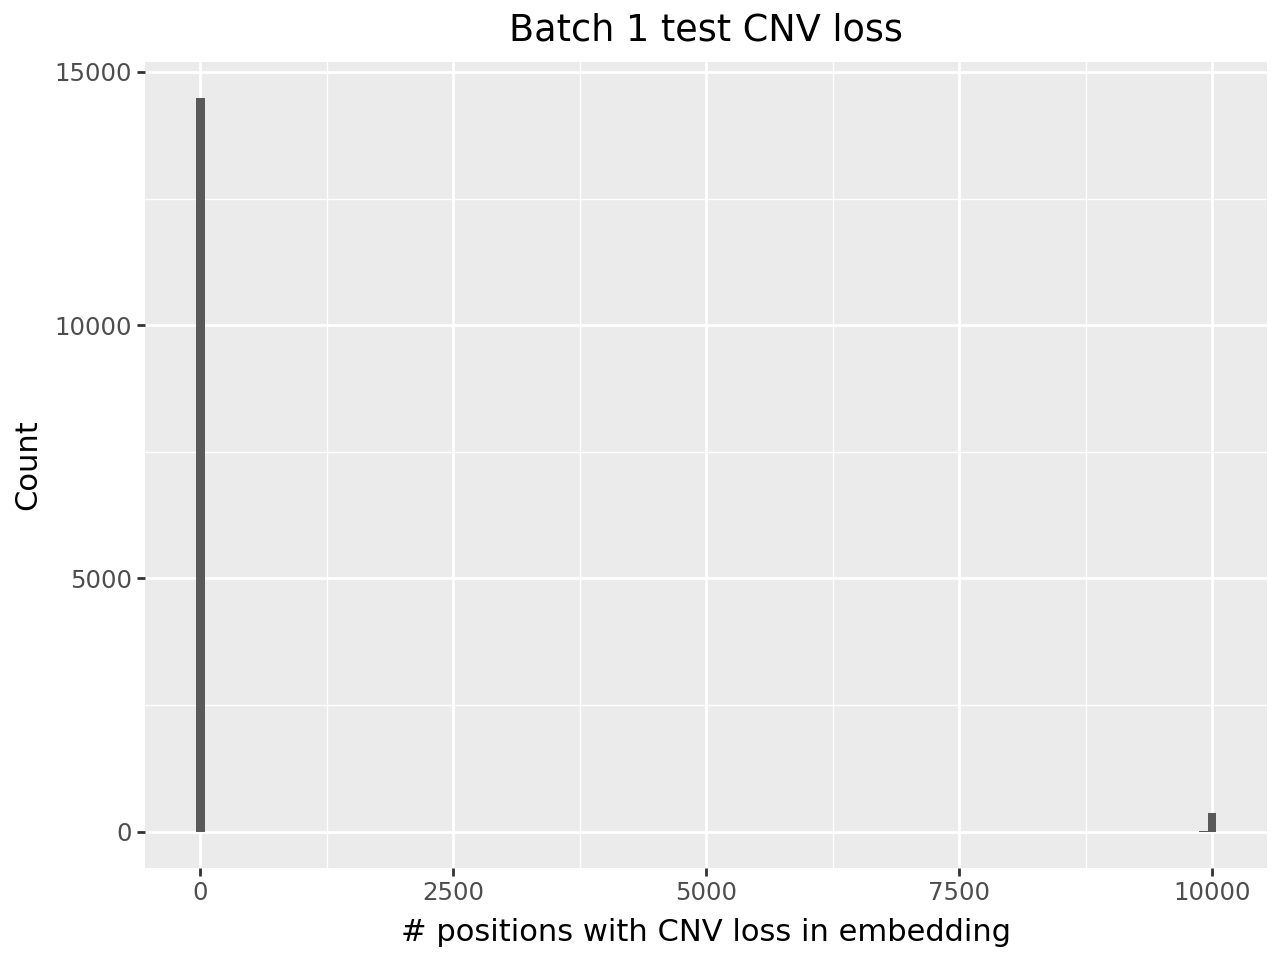

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 122'. Pick better value with 'binwidth'.


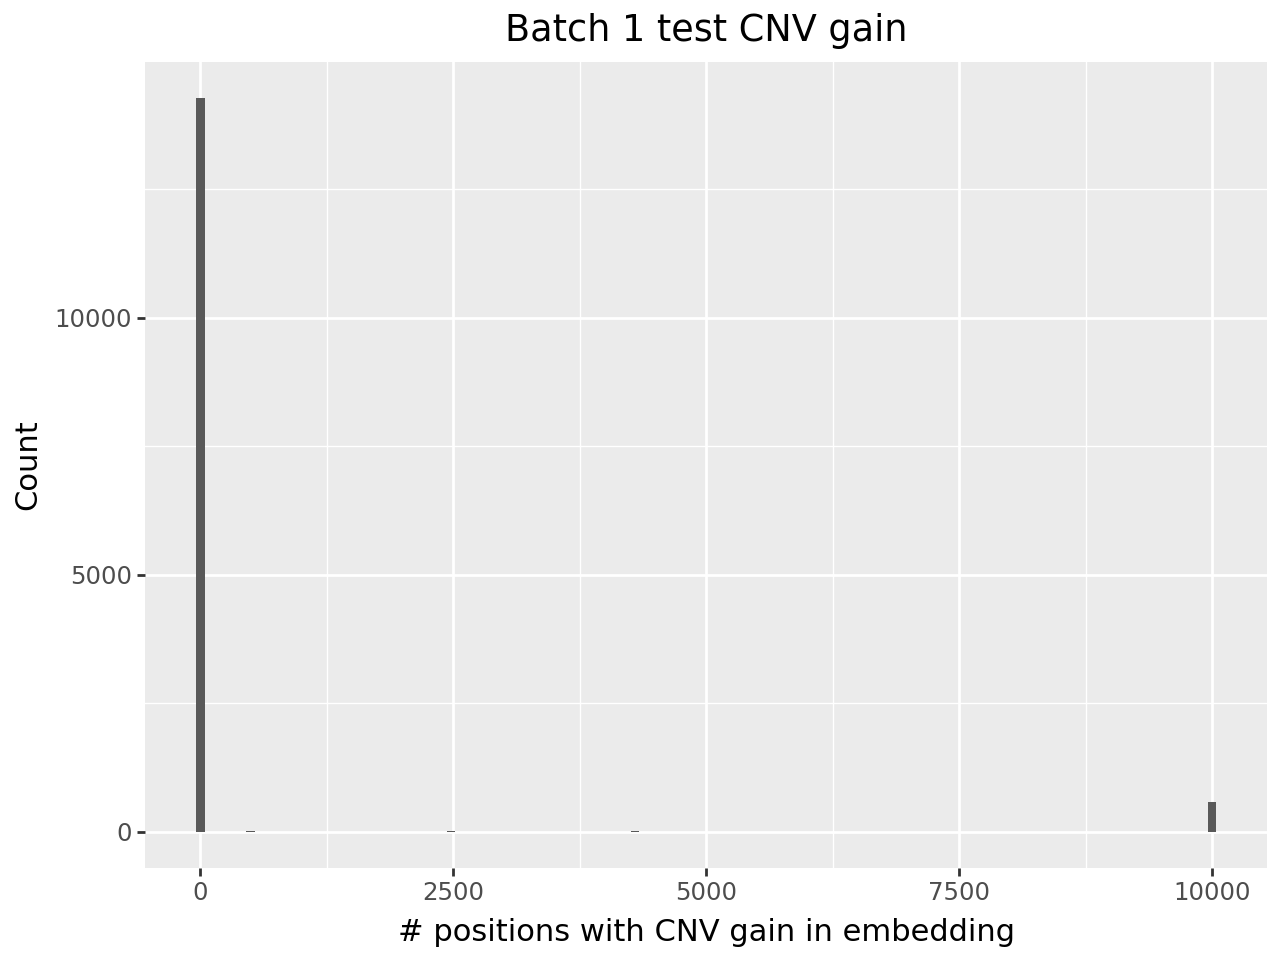

tensor([[2297., 2646., 2628.,  ...,    0.,    0.,    0.],
        [2954., 2096., 1976.,  ...,    0.,    0.,    0.],
        [3187., 1742., 1784.,  ...,    0.,    0.,    0.],
        ...,
        [2079., 2904., 3083.,  ...,    0.,    0.,    0.],
        [2044., 2630., 2919.,  ...,    0.,    0.,    0.],
        [2180., 2850., 2671.,  ...,    0.,    0.,    0.]])

In [ ]:
b1_test_dist_t = plot_dataset_dist(b1_test, name='Batch 1 test')
b1_test_dist_t

This is an old version of the batch 1 test data set, remove all `.mtx` files from the directory.
Use these commands:
```sh
find data/embeddings/batch_1/test/single_gene_barcode/ -type f -name *.mtx | wc -l
```
and
```sh
for f in $(find data/embeddings/batch_1/test/single_gene_barcode/ -type f -name *.mtx); do rm -v $f; done | wc -l
```

In [ ]:
b1_test_pt = CnvDataset(
    root=data_root / 'embeddings' / 'batch_1' / 'test',
    data_df=pd.read_csv(b1_test_path, sep='\t'),
    file_format='pt'
)
b1_test_pt

Using 102 barcodes
Using 1235 genes
No embedding files for 2149 data points in ../data/embeddings/batch_1/test/single_gene_barcode!


<class 'src.data.dataset.CnvDataset'> with 16486 datapoints

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 129'. Pick better value with 'binwidth'.


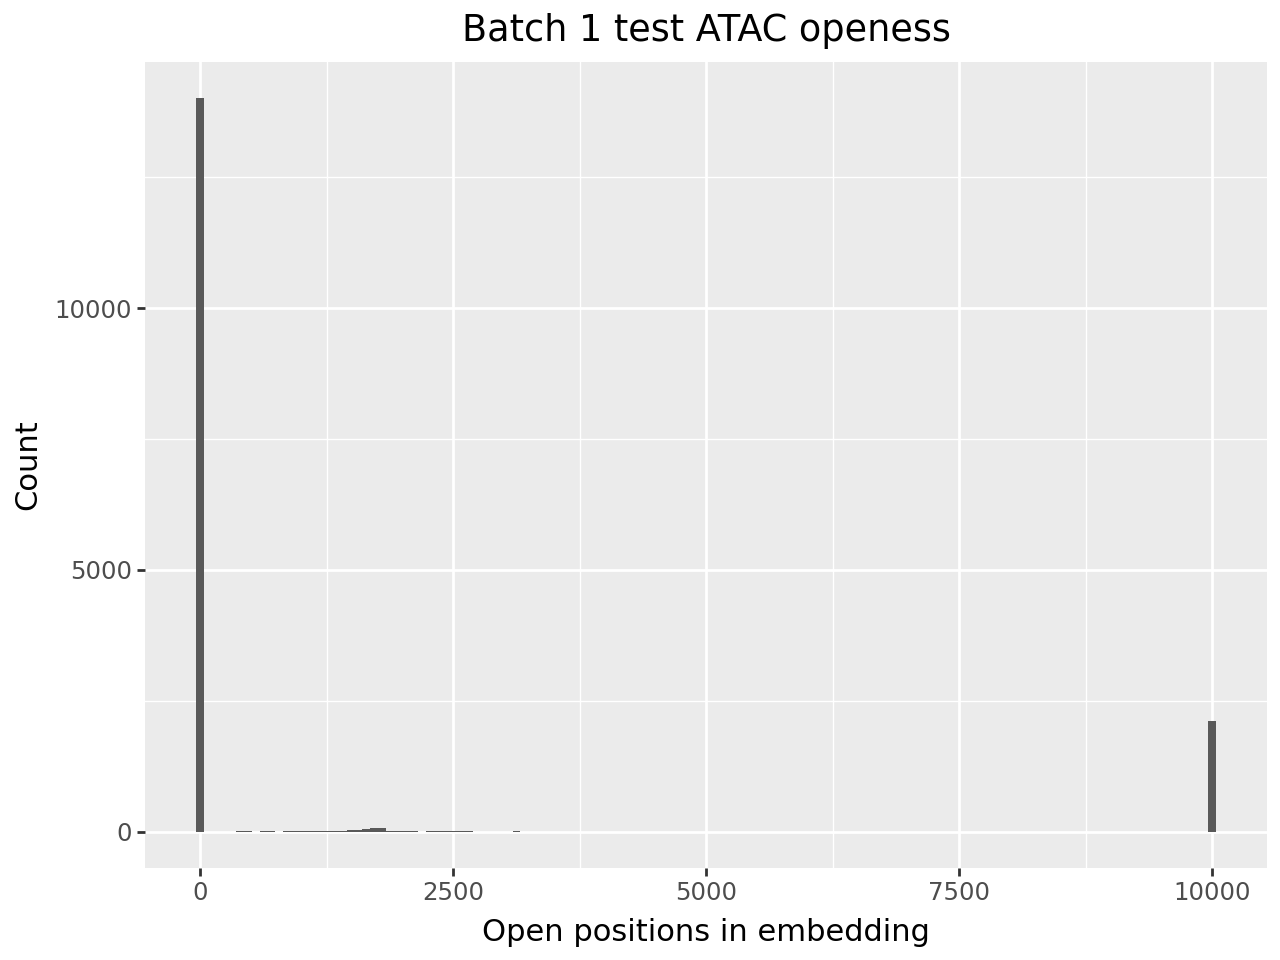

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 129'. Pick better value with 'binwidth'.


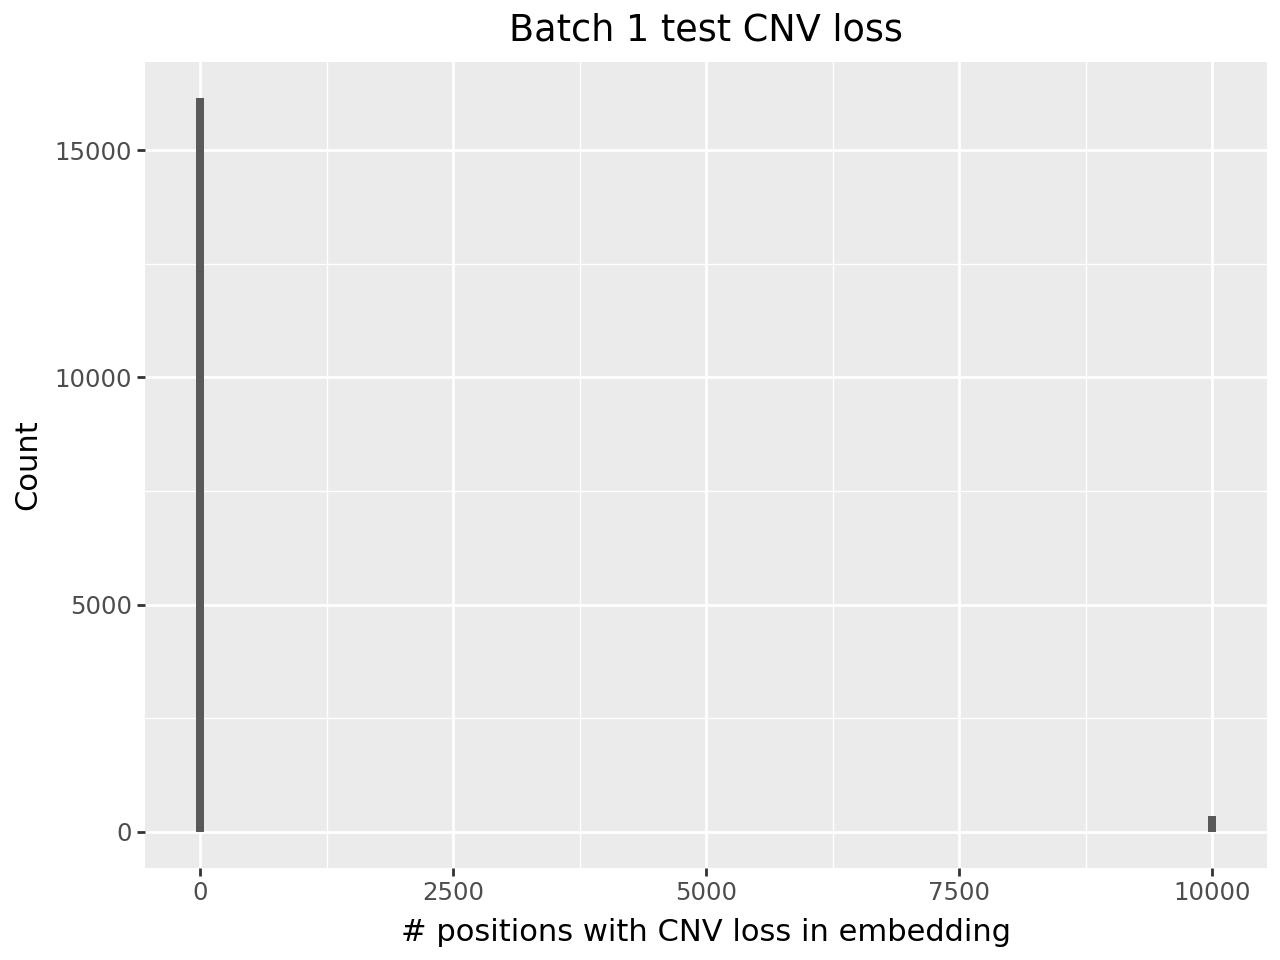

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 129'. Pick better value with 'binwidth'.


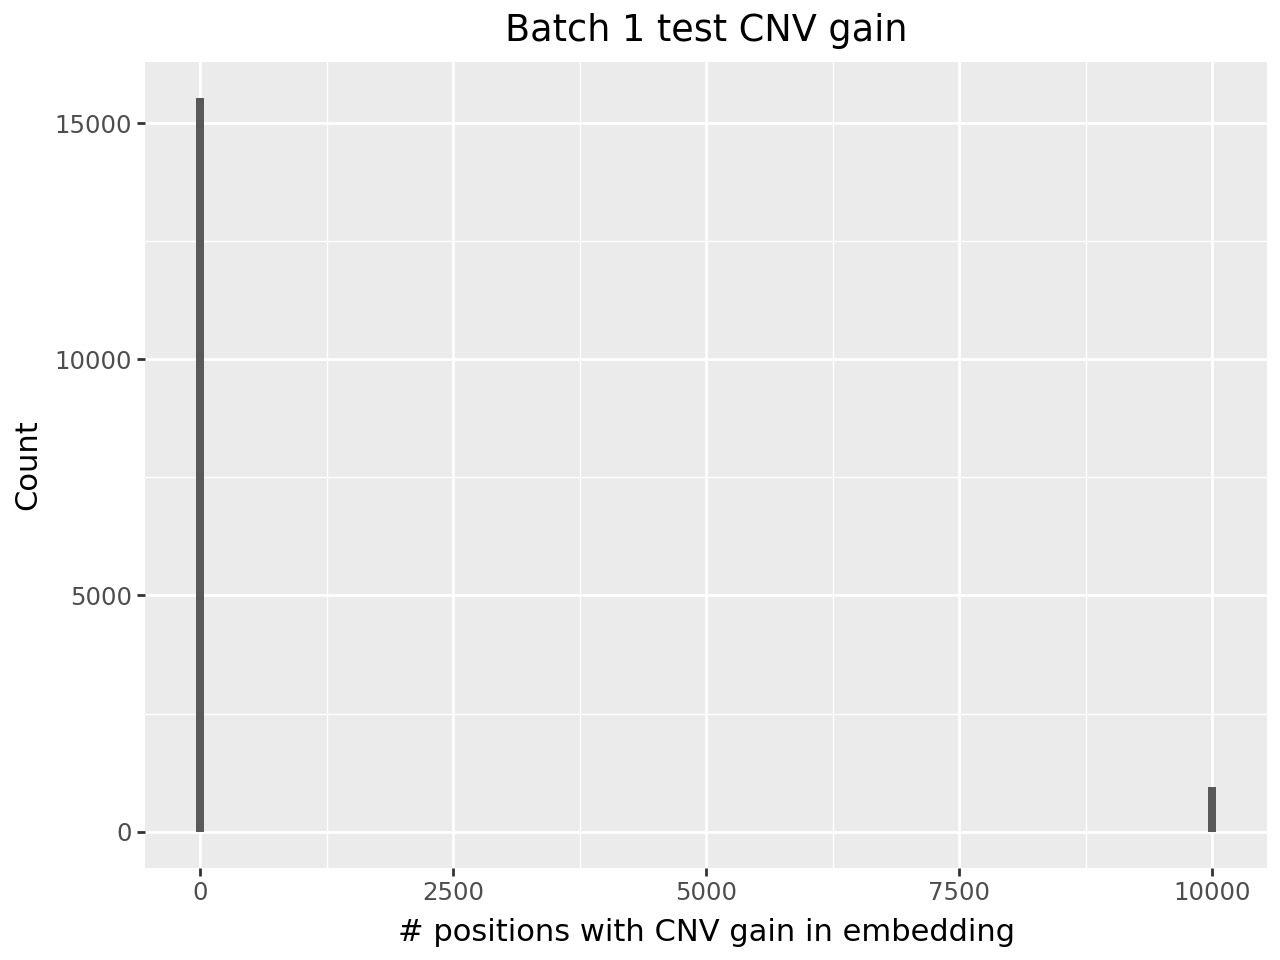

tensor([[ 2370.,  2583.,  2751.,  ...,     0.,     0.,     0.],
        [ 2906.,  2107.,  2009.,  ...,     0.,     0.,     0.],
        [ 3203.,  1747.,  1678.,  ...,     0.,     0.,     0.],
        ...,
        [ 2862.,  2216.,  2271.,  ...,     0.,     0., 10000.],
        [ 2580.,  2086.,  2085.,  ...,     0.,     0.,     0.],
        [ 2544.,  2174.,  2288.,  ...,     0.,     0.,     0.]])

In [ ]:
b1_test_pt_dist_t = plot_dataset_dist(b1_test_pt, name='Batch 1 test')
b1_test_pt_dist_t

#### Batch 2 Distributions
The follwoing analyses the distributions in batch 2 data set splits.

In [ ]:
b2_train = CnvDataset(
    root=data_root / 'embeddings' / 'batch_2' / 'train',
    data_df=pd.read_csv(b2_train_path, sep='\t'),
)
b2_train

Using 239 barcodes
Using 1217 genes
No embedding files for 2835 data points in ../data/embeddings/batch_2/train/single_gene_barcode!


<class 'src.data.dataset.CnvDataset'> with 20661 datapoints

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 144'. Pick better value with 'binwidth'.


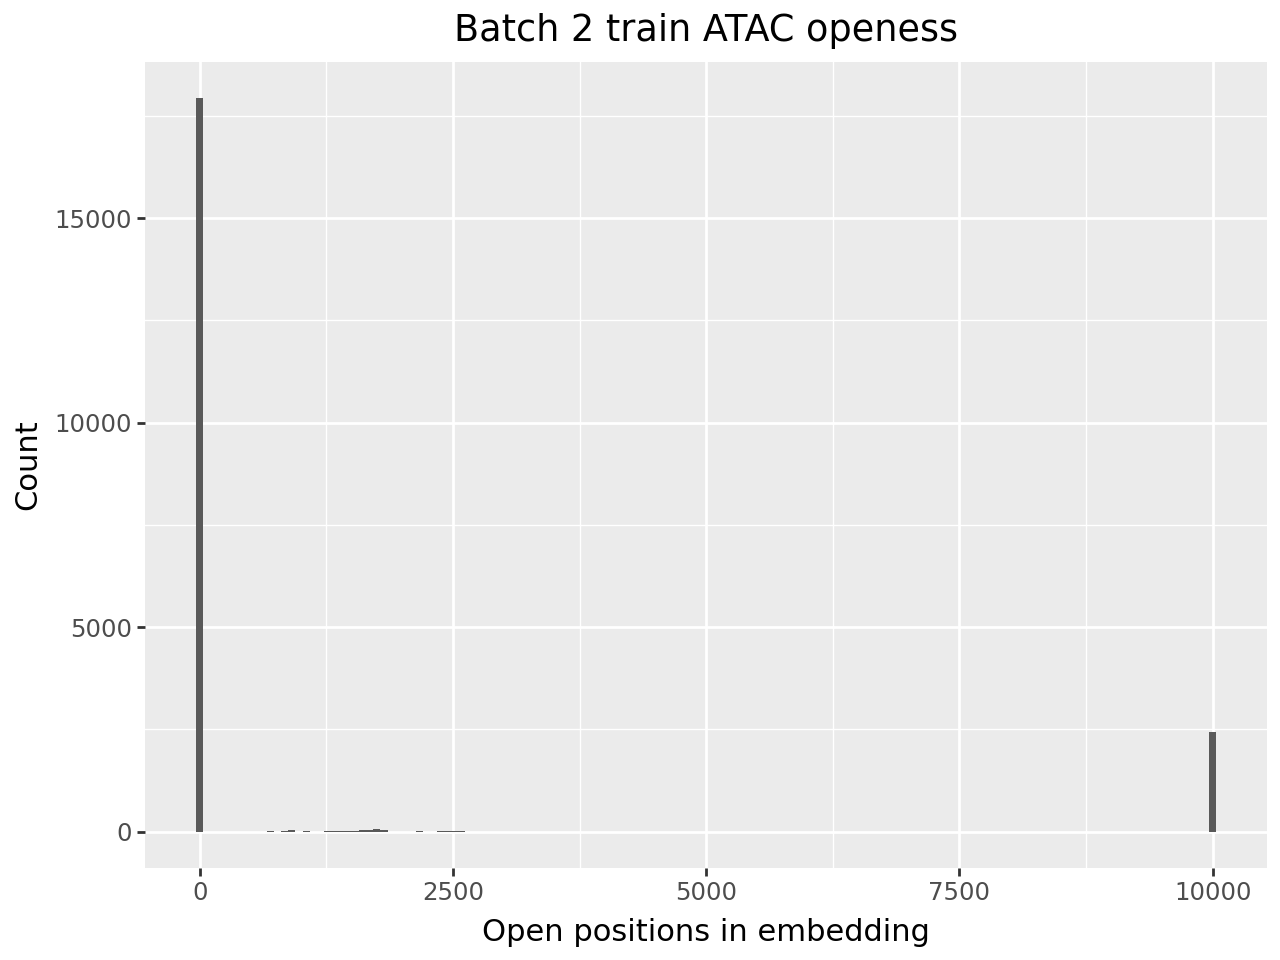

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 144'. Pick better value with 'binwidth'.


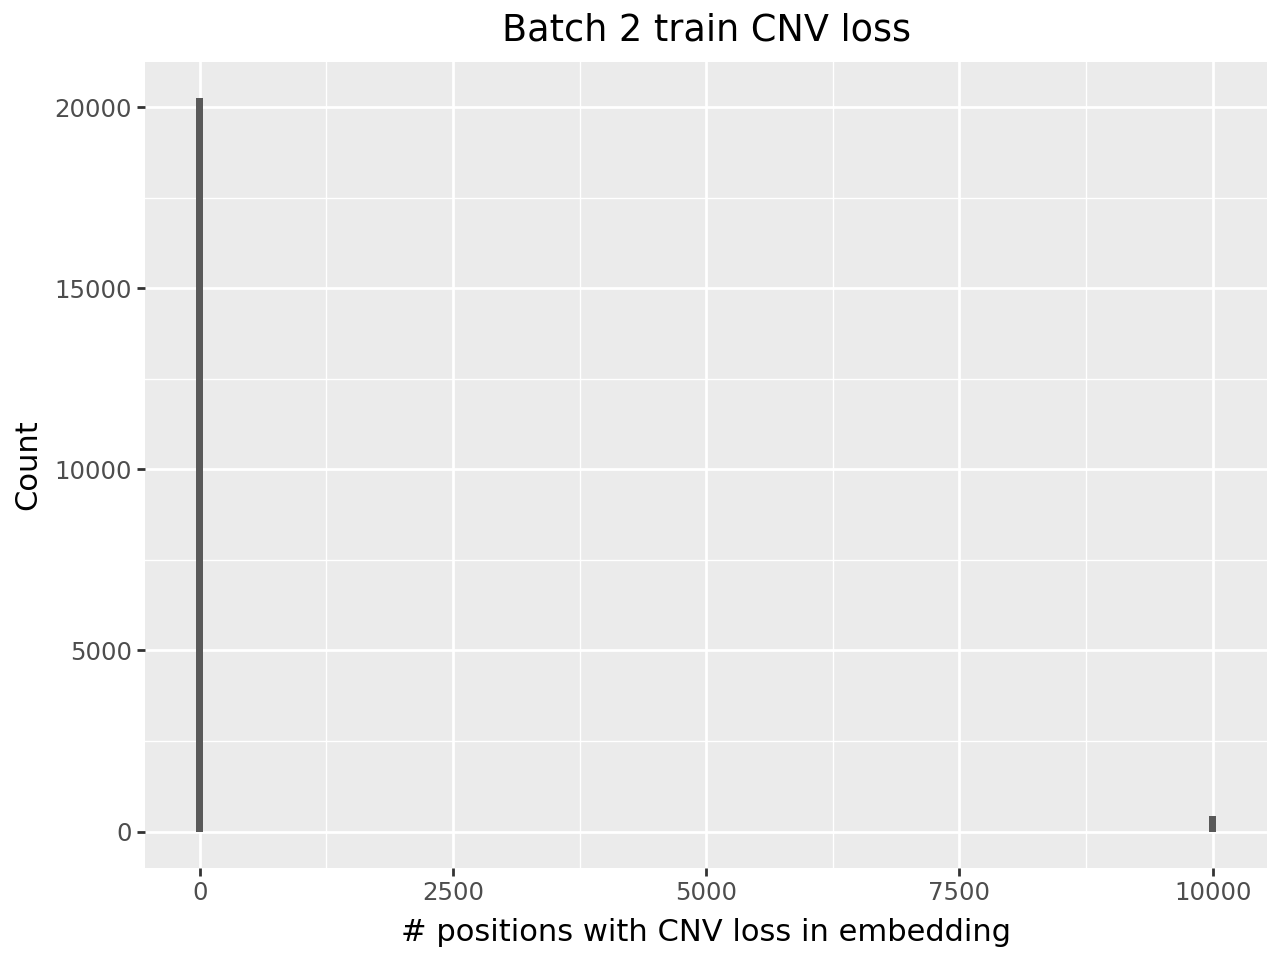

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 144'. Pick better value with 'binwidth'.


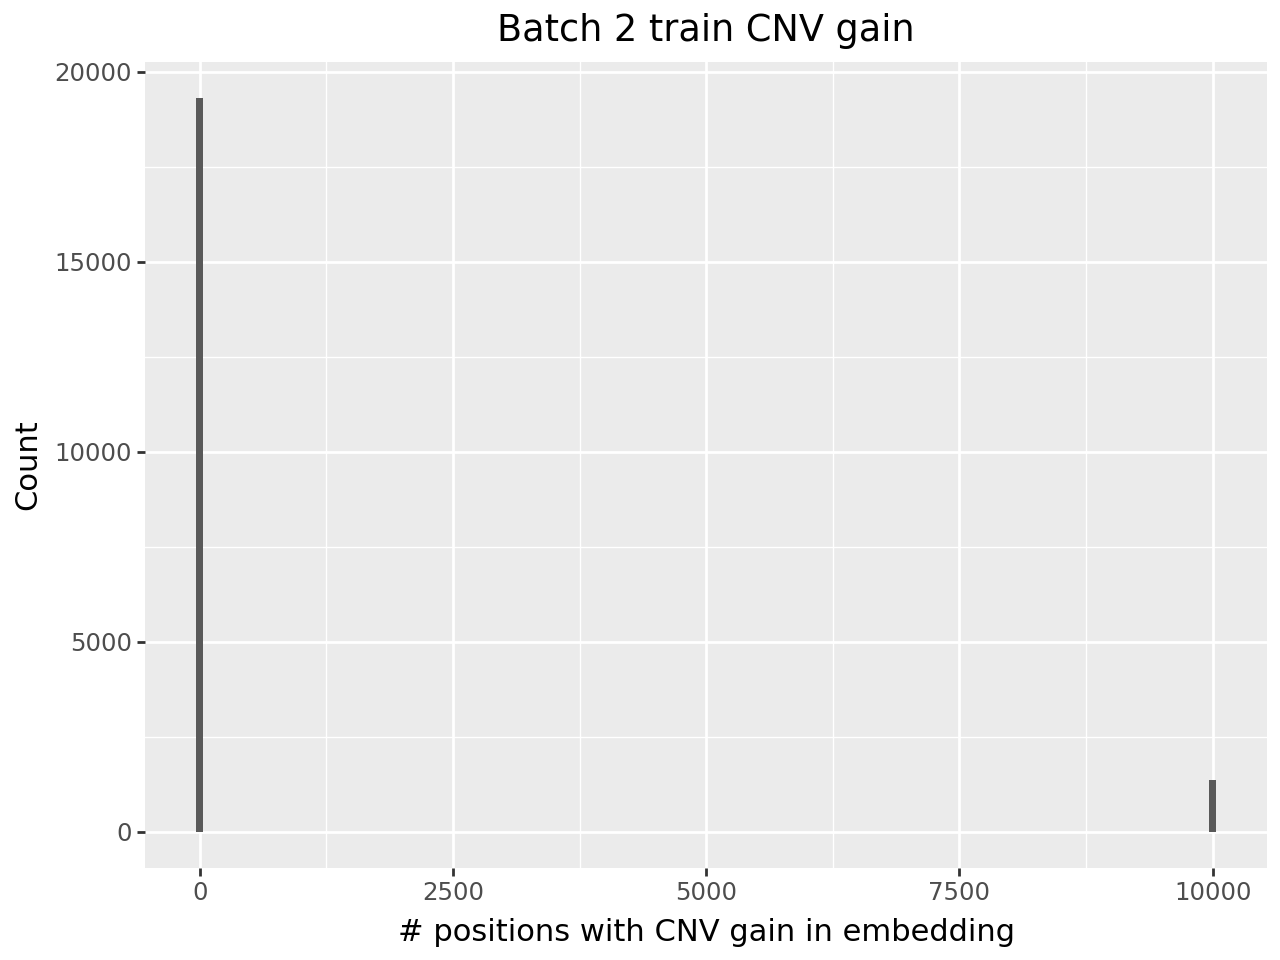

tensor([[1687., 2982., 3379.,  ...,    0.,    0.,    0.],
        [2410., 2315., 2466.,  ...,    0.,    0.,    0.],
        [2370., 2583., 2751.,  ...,    0.,    0.,    0.],
        ...,
        [2207., 3093., 2507.,  ...,    0.,    0.,    0.],
        [2366., 2796., 2674.,  ...,    0.,    0.,    0.],
        [2308., 2223., 2870.,  ...,    0.,    0.,    0.]])

In [ ]:
b2_train_dist_t = plot_dataset_dist(b2_train, name='Batch 2 train')
b2_train_dist_t

In [ ]:
b2_val = CnvDataset(
    root=data_root / 'embeddings' / 'batch_2' / 'val_pt',
    data_df=pd.read_csv(b2_val_path, sep='\t')
)
b2_val

Using 35 barcodes
Using 621 genes
No embedding files for 426 data points in ../data/embeddings/batch_2/val_pt/single_gene_barcode!


<class 'src.data.dataset.CnvDataset'> with 3177 datapoints

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 57'. Pick better value with 'binwidth'.


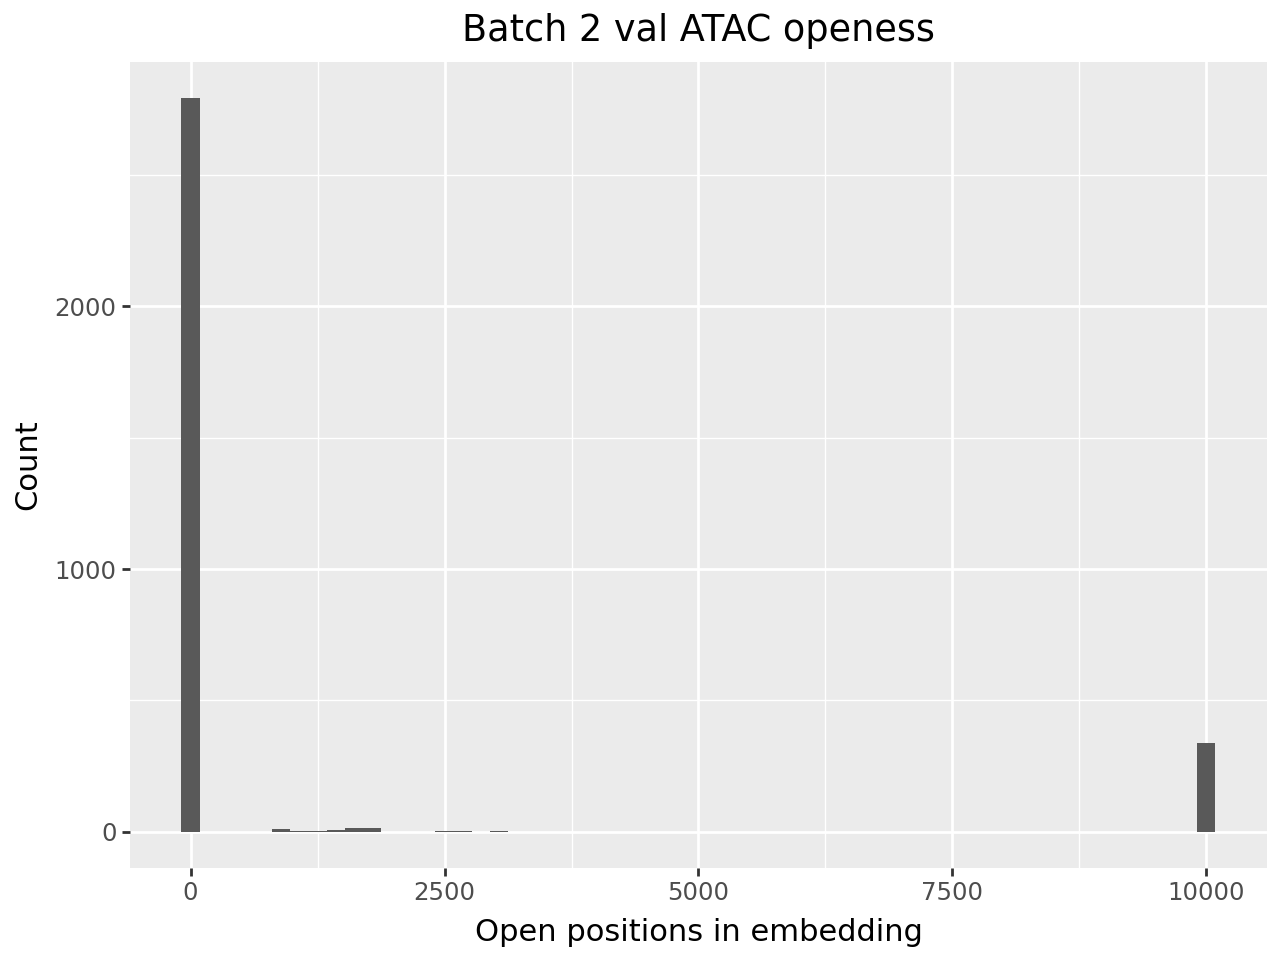

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 57'. Pick better value with 'binwidth'.


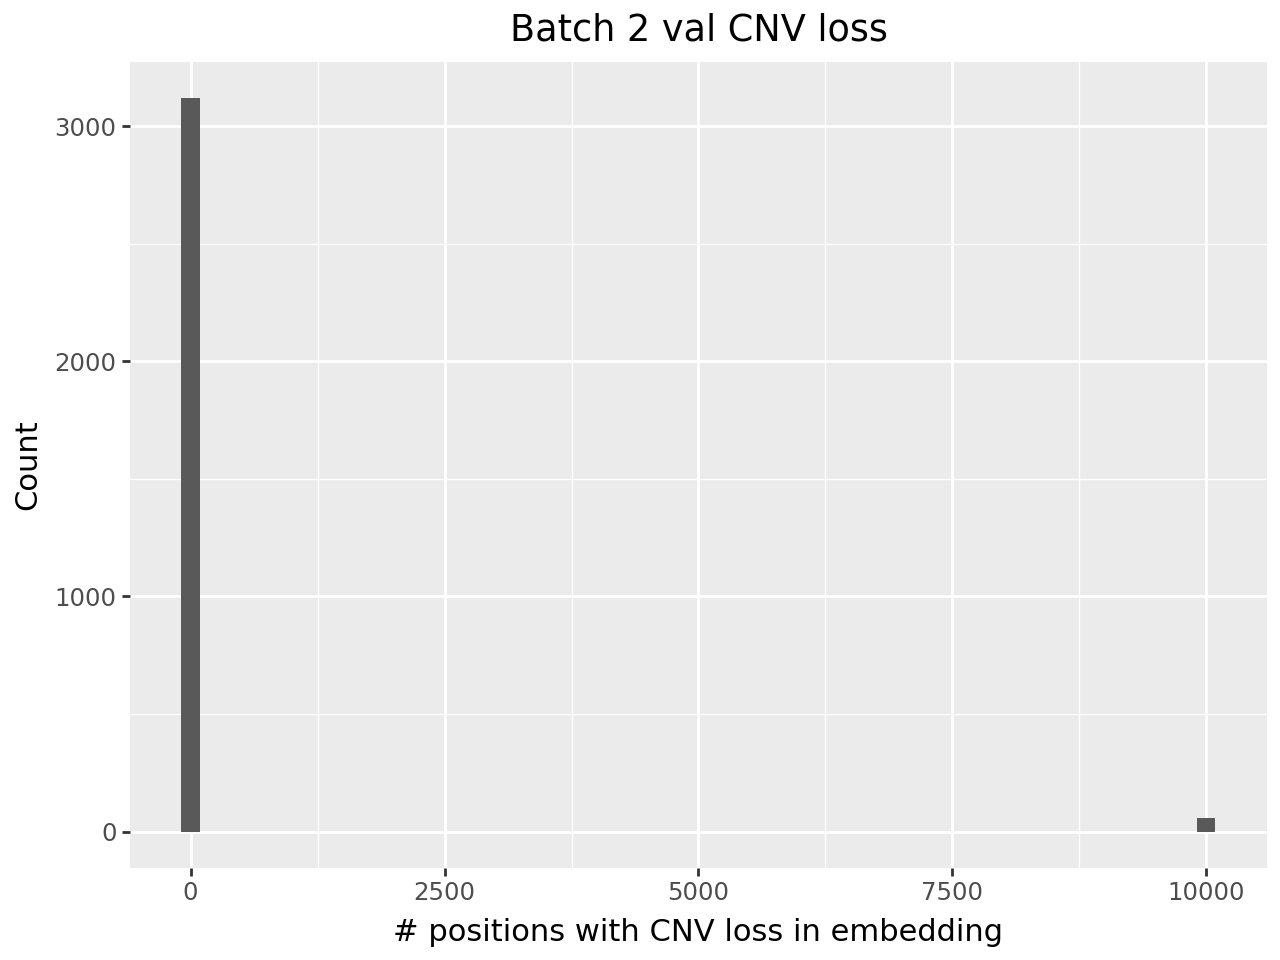

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 57'. Pick better value with 'binwidth'.


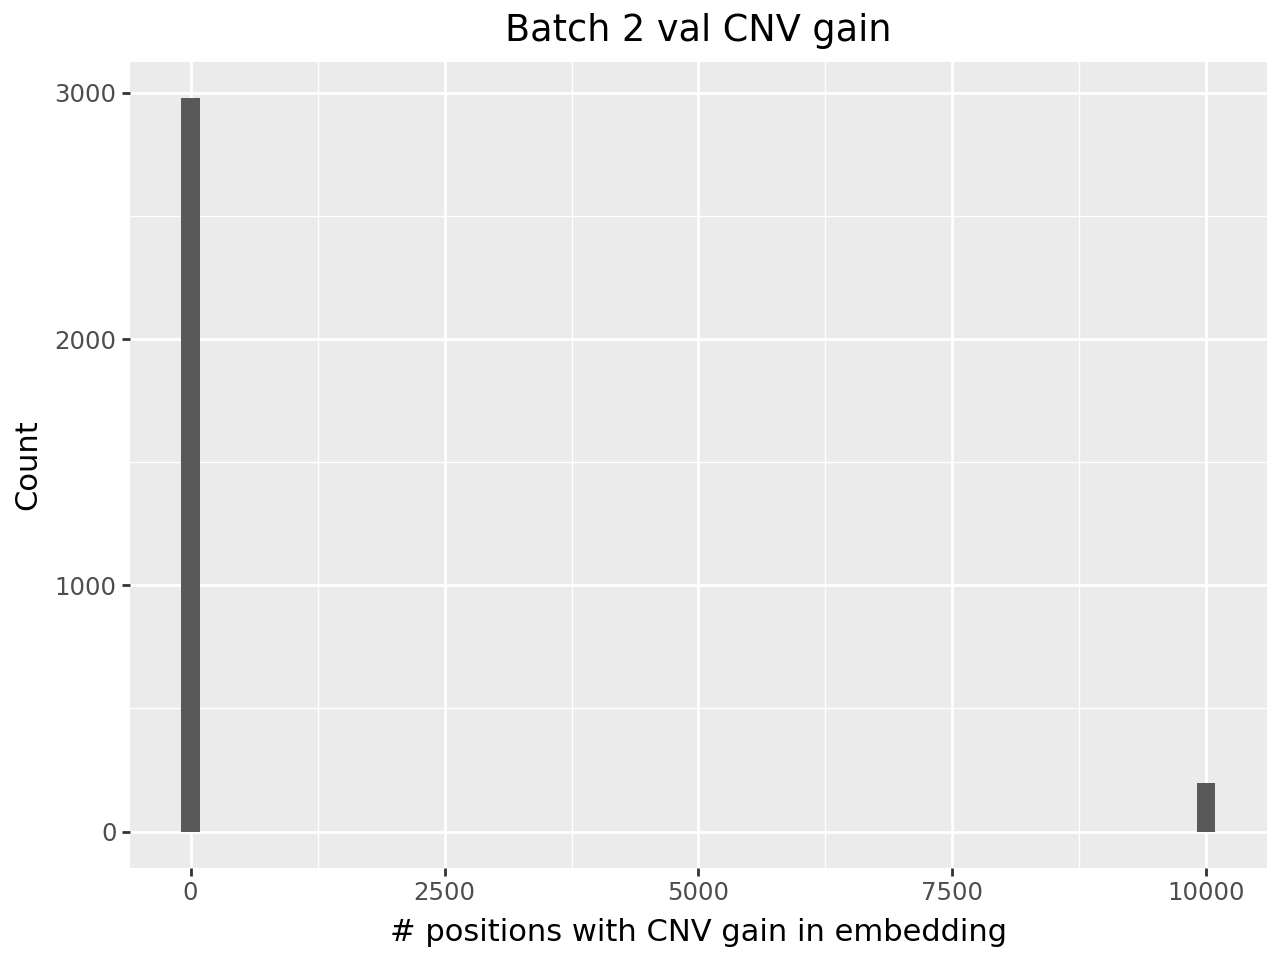

tensor([[2241., 2873., 2807.,  ...,    0.,    0.,    0.],
        [2772., 2269., 2125.,  ...,    0.,    0.,    0.],
        [2906., 2107., 2009.,  ...,    0.,    0.,    0.],
        ...,
        [2488., 2597., 2530.,  ...,    0.,    0.,    0.],
        [2022., 2836., 2857.,  ...,    0.,    0.,    0.],
        [2655., 2459., 2390.,  ...,    0.,    0.,    0.]])

In [ ]:
b2_val_dist_t = plot_dataset_dist(b2_val, name='Batch 2 val')
b2_val_dist_t

In [ ]:
b2_test = CnvDataset(
    root=data_root / 'embeddings' / 'batch_2' / 'test_pt',
    data_df=pd.read_csv(b2_test_path, sep='\t')
)
b2_test

Using 69 barcodes
Using 726 genes
No embedding files for 884 data points in ../data/embeddings/batch_2/test_pt/single_gene_barcode!


<class 'src.data.dataset.CnvDataset'> with 6444 datapoints

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 81'. Pick better value with 'binwidth'.


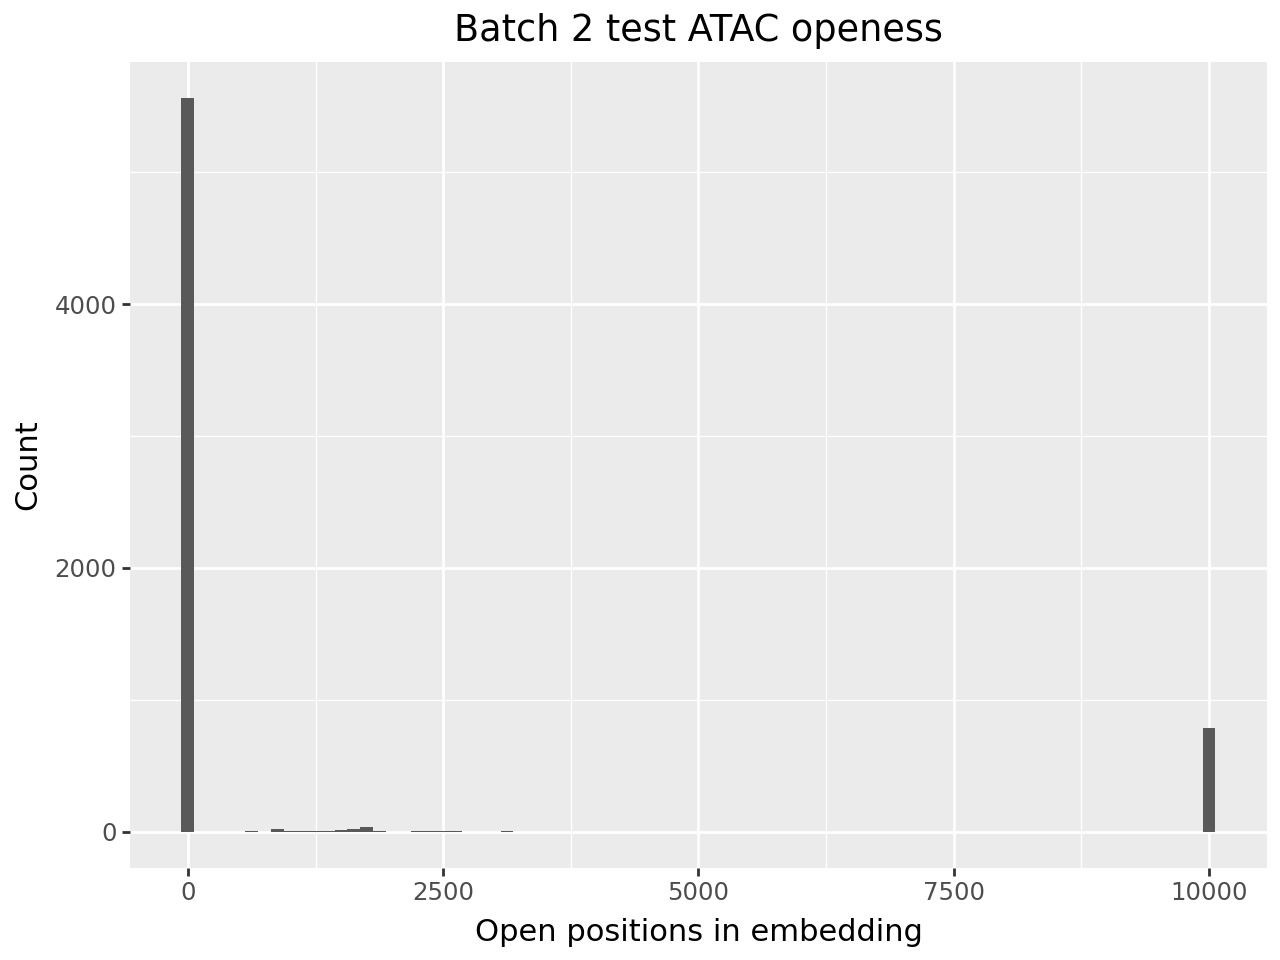

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 81'. Pick better value with 'binwidth'.


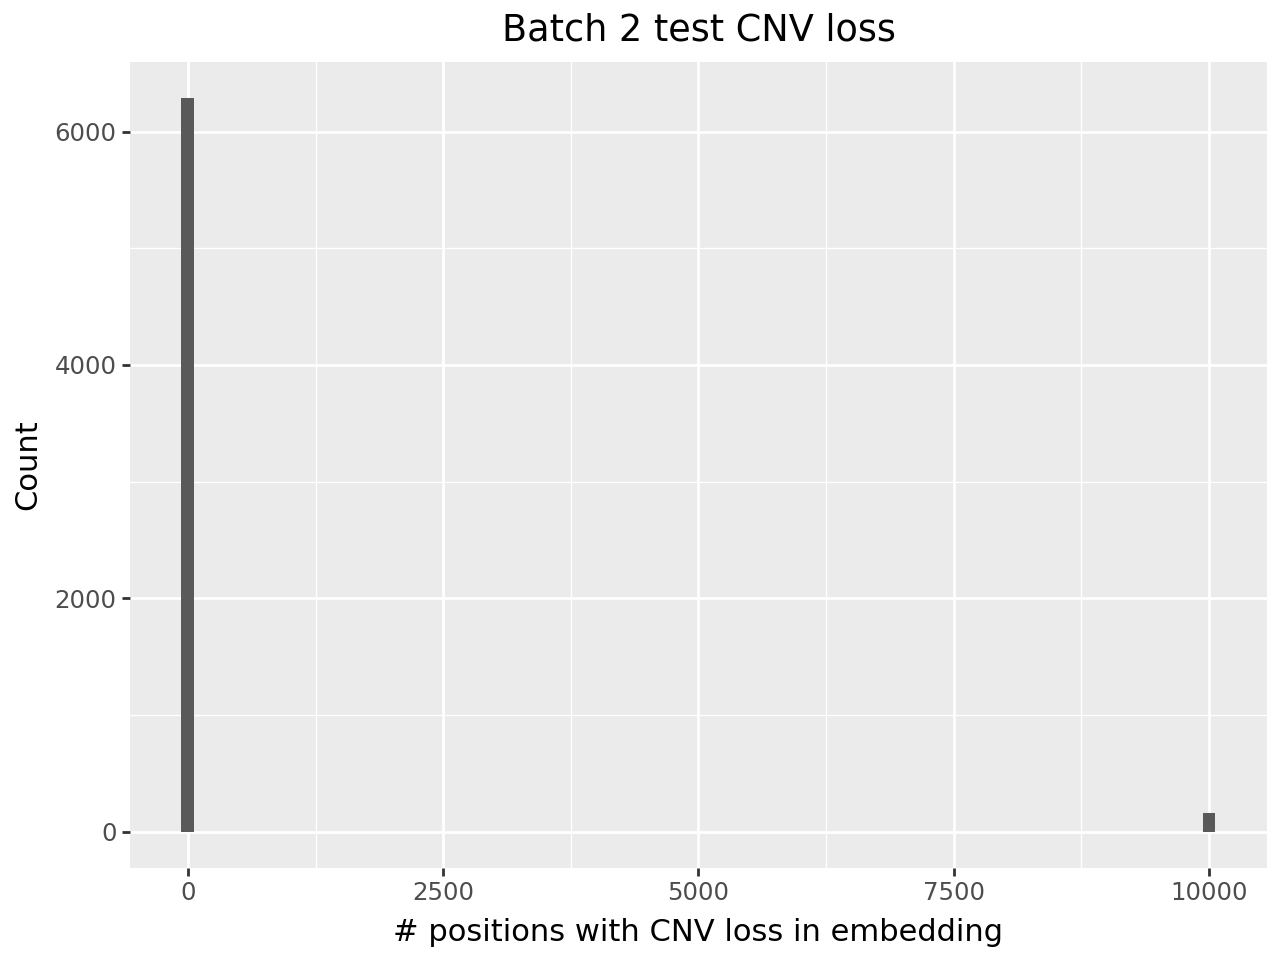

/vol/storage/shared/miniforge3/envs/ssb/lib/python3.12/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 81'. Pick better value with 'binwidth'.


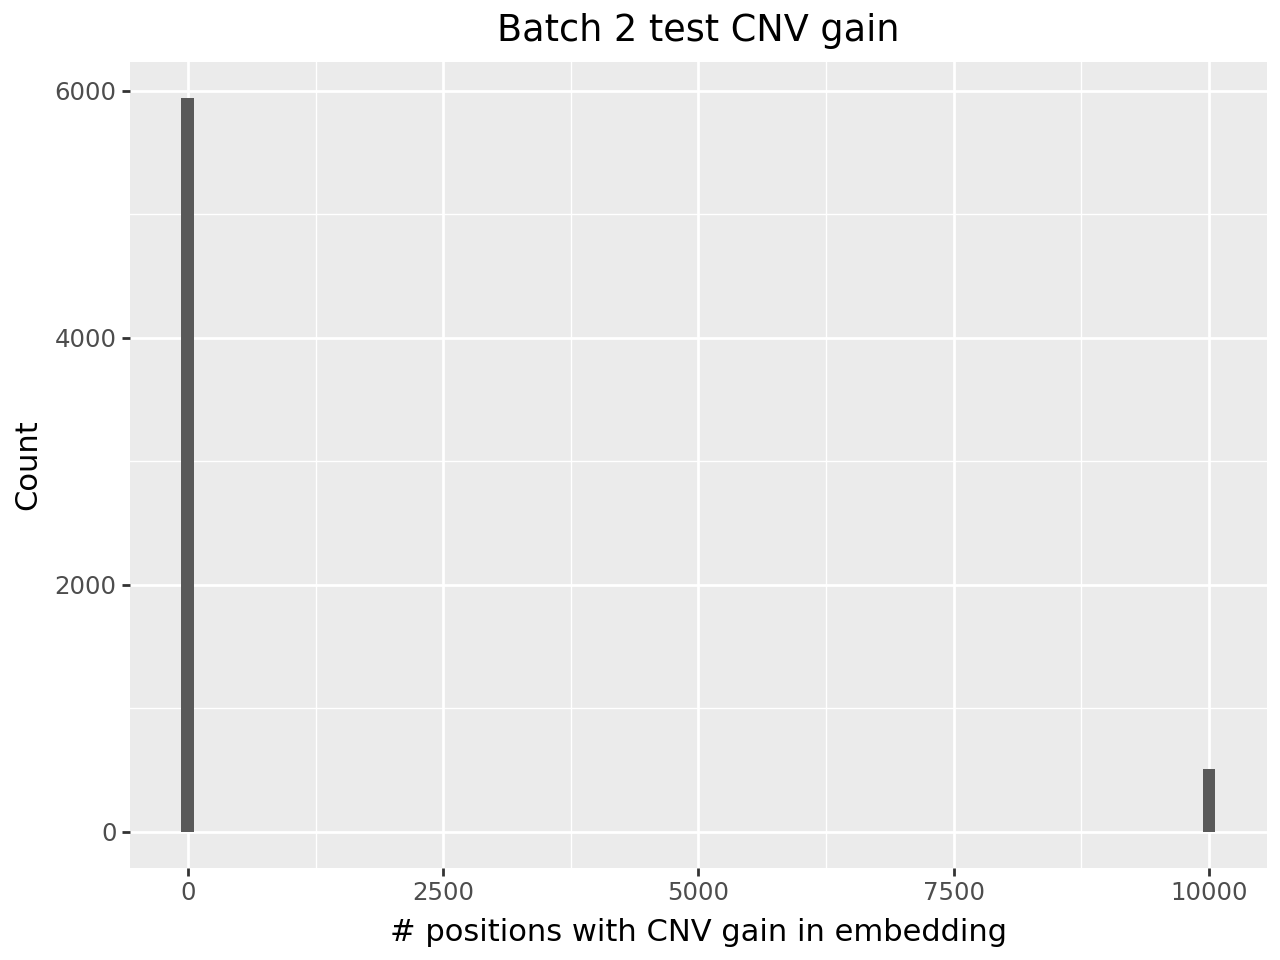

In [ ]:
b2_test_dist_t = plot_dataset_dist(b2_test, name='Batch 2 test')

### Missing data

#### Missing CNV pairs

In [ ]:
grep '/home/marw/cmscb8/preprocessing/../src/data/embedding.py:1160:' log/20250305_batch2_*.err | cut -f 7,9 -d ' ' > log/20250305_batch2_missingCNV.err

SyntaxError: invalid decimal literal (4129314816.py, line 1)

In [ ]:
grep '/home/marw/cmscb8/preprocessing/../src/data/embedding.py:1133:' log/20250304_batch1_*.err | cut -f 7,9 -d ' ' > log/20250304_batch1_missingCNV.err

In [8]:
b1_noCNV_df = pd.read_csv(Path('..') / 'log' / '20250304_batch1_missingCNV.err', names=['barcode', 'gene_id'], sep=' ')
b2_noCNV_df = pd.read_csv(Path('..') / 'log' / '20250305_batch2_missingCNV.err', names=['barcode', 'gene_id'], sep=' ')
b1_noGTF_df = pd.read_csv(data_root / 'preprocessing' / 'batch1_missing_genes.csv')
b2_noGTF_df = pd.read_csv(data_root / 'preprocessing' / 'batch2_missing_genes.csv')

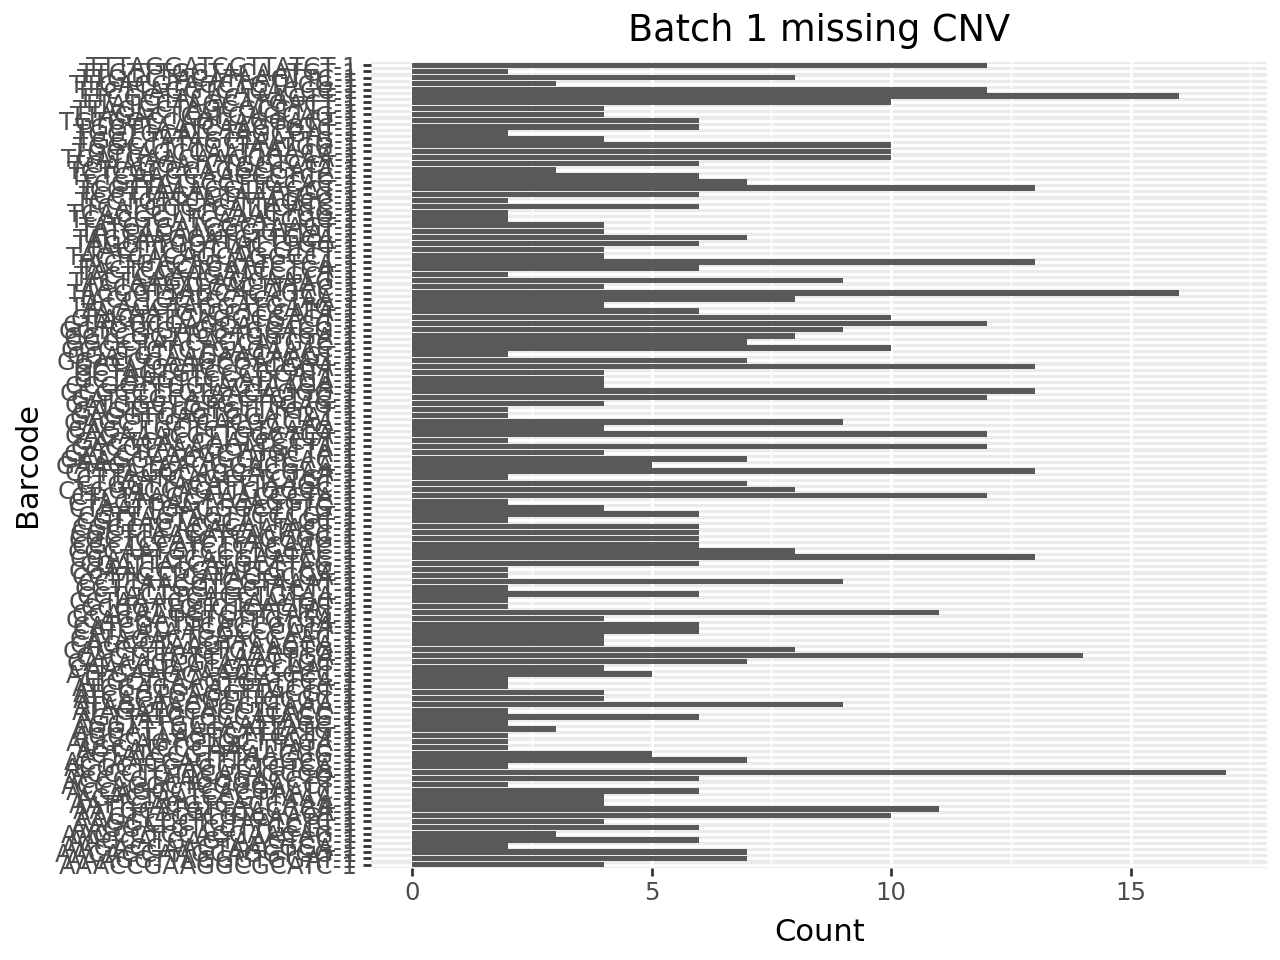

In [ ]:
ggplot(data=b1_noCNV_df) +\
    geom_col(aes(x='barcode'), stat='count') +\
    labs(title='Batch 1 missing CNV', x='Barcode', y='Count') +\
    theme(axis_text_x=element_blank())

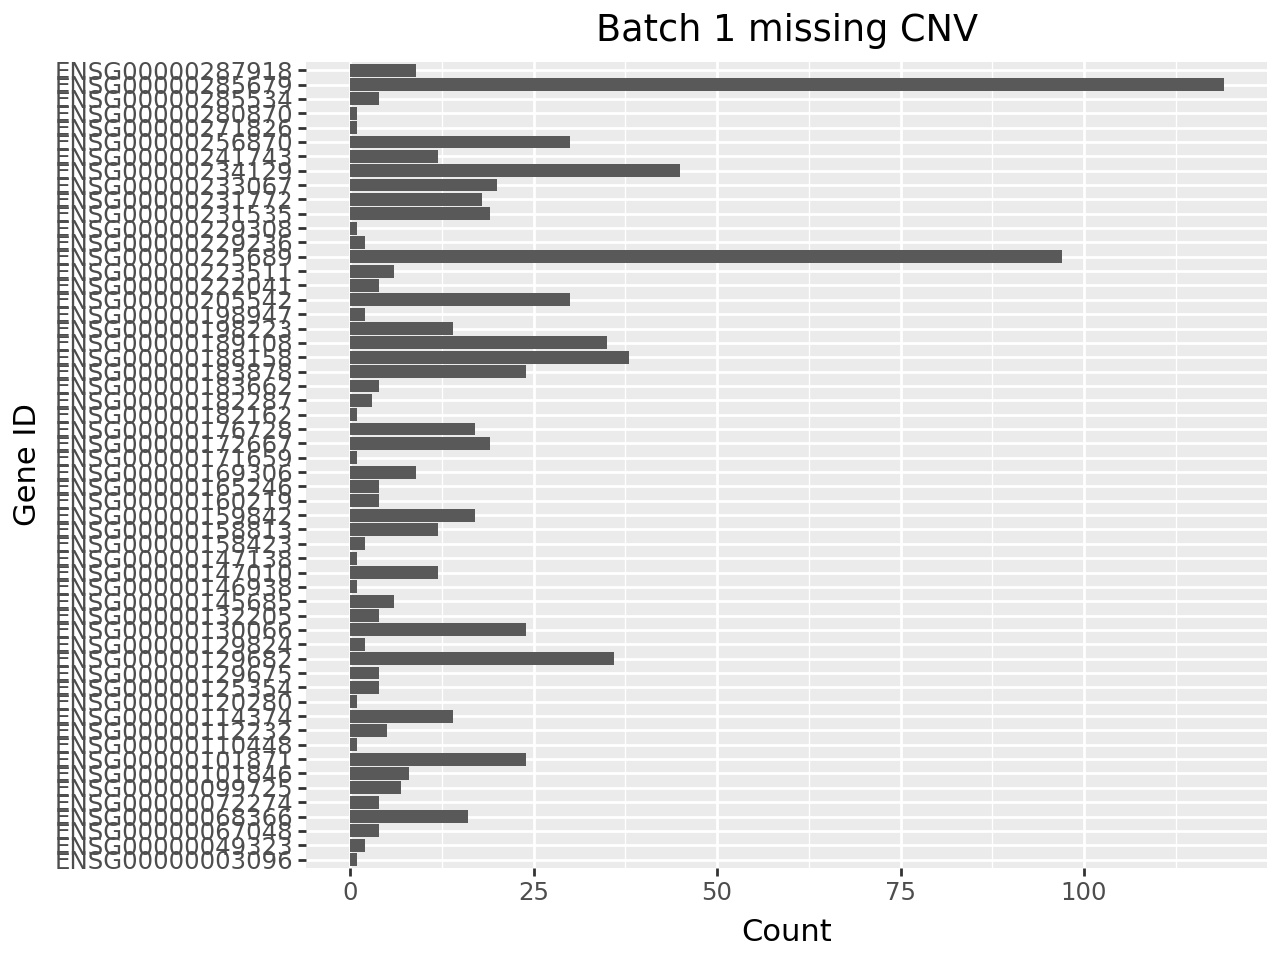

In [47]:
ggplot(data=b1_noCNV_df) +\
    geom_col(aes(x='gene_id'), stat='count') +\
    coord_flip() + labs(title='Batch 1 missing CNV', x='Gene ID', y='Count')

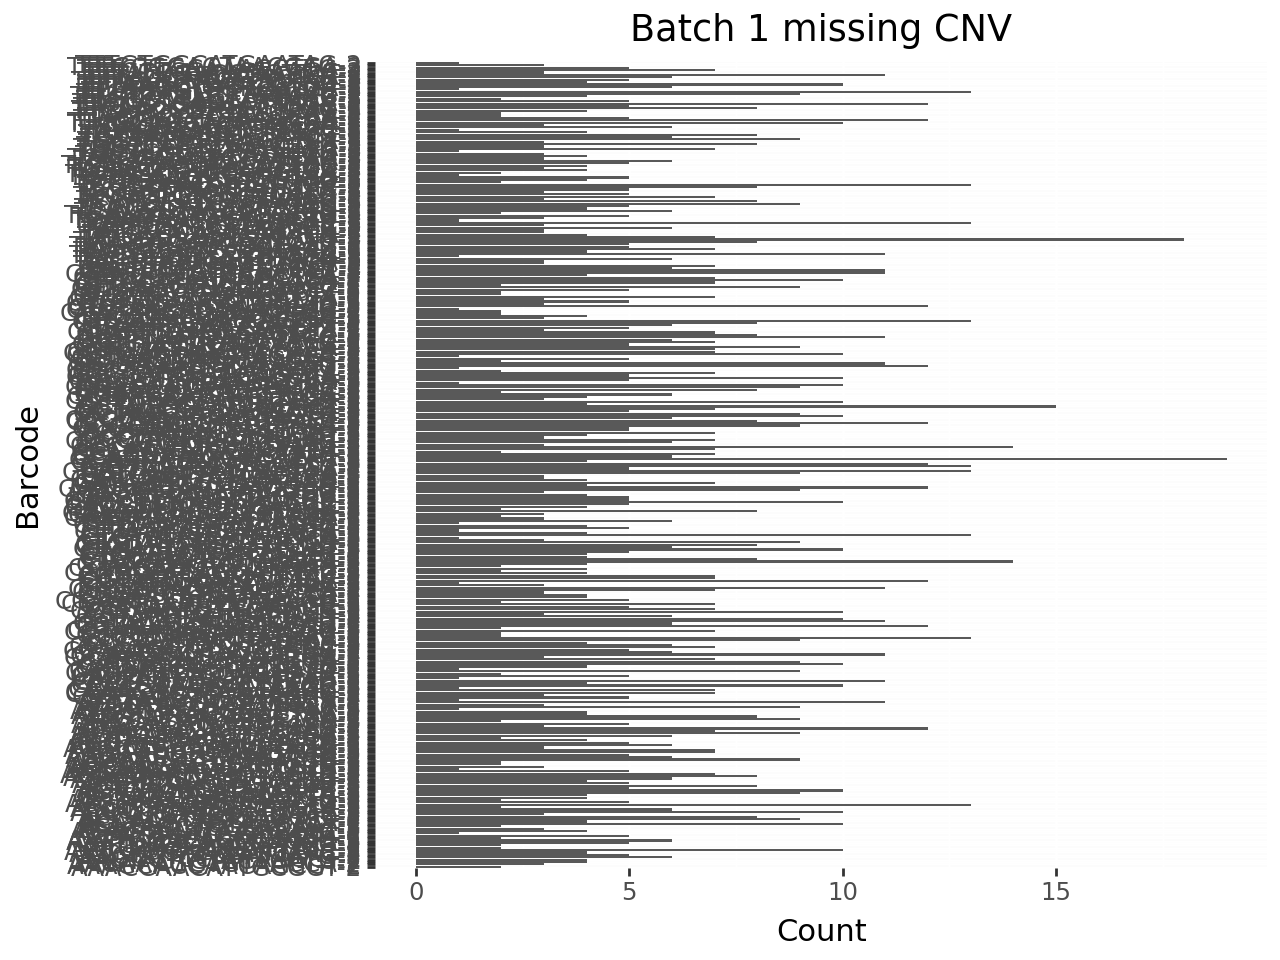

In [ ]:
ggplot(data=b2_noCNV_df) +\
    geom_col(aes(x='barcode'), stat='count') +\
    labs(title='Batch 2 missing CNV', x='Barcode', y='Count') +\
    theme(axis_text_x=element_blank())

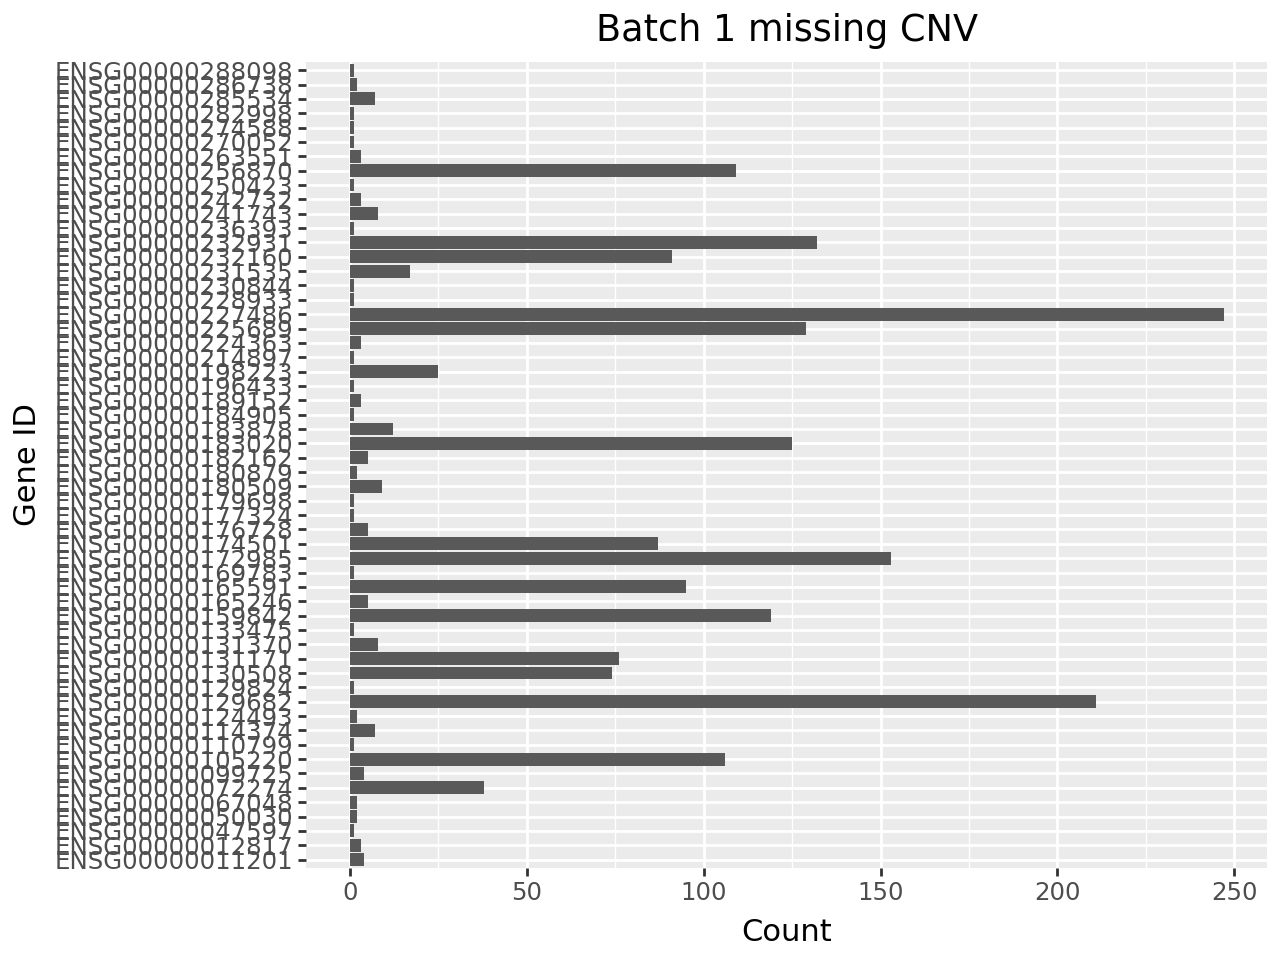

In [ ]:
ggplot(data=b2_noCNV_df) +\
    geom_col(aes(x='gene_id'), stat='count') +\
    coord_flip() + labs(title='Batch 2 missing CNV', x='Gene ID', y='Count')

In [88]:
b1_noGTF_df

,gene_id
0,ENSG00000123612
1,ENSG00000204161
2,ENSG00000198727
3,ENSG00000248816
4,ENSG00000180509
...,...
632,ENSG00000182866
633,ENSG00000132514
634,ENSG00000178562
635,ENSG00000287920


#### Batch 1
Missing data analysis for batch 1.

In [19]:
b1_train_df = pd.read_csv(b1_train_path, sep='\t')
b1_train_df['split'] = 'train'
b1_train = CnvDataset(data_root / 'embeddings' / 'batch_1' / 'train', b1_train_df)
b1_train_df['data status'] = 'missing'
b1_train_df.loc[
    (b1_train_df['barcode'].isin(b1_train.data_df['barcode'])) &
    (b1_train_df['gene_id'].isin(b1_train.data_df['gene_id']))
    ,'data status'] = 'available'
b1_train_df.loc[
    (b1_train_df['gene_id'].isin(b1_noGTF_df['gene_id']))
    ,'data status'] = 'GTF missing'
b1_train_df.loc[
    (b1_train_df['barcode'].isin(b1_noCNV_df['barcode'])) &
    (b1_train_df['gene_id'].isin(b1_noCNV_df['gene_id']))
    ,'data status'] = 'CNV missing'
b1_train_df

Using 356 barcodes
Using 1595 genes
No embedding files for 4335 data points in ../data/embeddings/batch_1/train/single_gene_barcode!


,barcode,gene_id,expression_count,classification,split,embedding_path,data status
0,AAACCAACATGTCAGC-1,ENSG00000269113,0.749940,low,train,../data/embeddings/batch_1/train/single_gene_b...,available
1,AAACCAACATGTCAGC-1,ENSG00000229956,1.173642,high,train,../data/embeddings/batch_1/train/single_gene_b...,available
2,AAACCAACATGTCAGC-1,ENSG00000237505,0.749940,low,train,../data/embeddings/batch_1/train/single_gene_b...,available
3,AAACCAACATGTCAGC-1,ENSG00000188641,0.749940,low,train,../data/embeddings/batch_1/train/single_gene_b...,available
4,AAACCAACATGTCAGC-1,ENSG00000162636,0.749940,low,train,../data/embeddings/batch_1/train/single_gene_b...,available
...,...,...,...,...,...,...,...
59336,TTTGTTGGTGCCGCAA-1,ENSG00000198938,2.220852,high,train,../data/embeddings/batch_1/train/single_gene_b...,GTF missing
59337,TTTGTTGGTGCCGCAA-1,ENSG00000198840,1.968703,high,train,../data/embeddings/batch_1/train/single_gene_b...,GTF missing
59338,TTTGTTGGTGCCGCAA-1,ENSG00000198886,1.116385,high,train,../data/embeddings/batch_1/train/single_gene_b...,GTF missing
59339,TTTGTTGGTGCCGCAA-1,ENSG00000198786,1.406267,high,train,../data/embeddings/batch_1/train/single_gene_b...,GTF missing


In [39]:
b1_train_old_df = pd.read_csv(data_root / 'splits' / 'old_splits' / 'batch1_training.tsv', sep='\t')
b1_train_old_df['split'] = 'train_old'
b1_train_old = CnvDataset(data_root / 'embeddings' / 'batch_1' / 'train', b1_train_old_df)
b1_train_old_df['data status'] = 'missing'
b1_train_old_df.loc[
    (b1_train_old_df['barcode'].isin(b1_train_old.data_df['barcode'])) &
    (b1_train_old_df['gene_id'].isin(b1_train_old.data_df['gene_id']))
    ,'data status'] = 'available'
b1_train_old_df.loc[
    (b1_train_old_df['gene_id'].isin(b1_noGTF_df['gene_id']))
    ,'data status'] = 'GTF missing'
b1_train_old_df.loc[
    (b1_train_old_df['barcode'].isin(b1_noCNV_df['barcode'])) &
    (b1_train_old_df['gene_id'].isin(b1_noCNV_df['gene_id']))
    ,'data status'] = 'CNV missing'
b1_train_old_df

Using 2576 barcodes
Using 1935 genes
No embedding files for 310765 data points in ../data/embeddings/batch_1/train/single_gene_barcode!


,barcode,gene_id,expression_count,classification,split,embedding_path,data status
0,AAACAGCCACAATACT-1,ENSG00000269113,1.538273,high,train_old,../data/embeddings/batch_1/train/single_gene_b...,missing
1,AAACAGCCACAATACT-1,ENSG00000172260,0.796987,low,train_old,../data/embeddings/batch_1/train/single_gene_b...,missing
2,AAACAGCCACAATACT-1,ENSG00000188641,0.796987,low,train_old,../data/embeddings/batch_1/train/single_gene_b...,missing
3,AAACAGCCACAATACT-1,ENSG00000265972,0.796987,low,train_old,../data/embeddings/batch_1/train/single_gene_b...,missing
4,AAACAGCCACAATACT-1,ENSG00000230426,1.538273,high,train_old,../data/embeddings/batch_1/train/single_gene_b...,missing
...,...,...,...,...,...,...,...
347719,TTTGTTGGTGGCTTCC-1,ENSG00000129682,1.540699,high,train_old,../data/embeddings/batch_1/train/single_gene_b...,GTF missing
347720,TTTGTTGGTGGCTTCC-1,ENSG00000198712,1.540699,high,train_old,../data/embeddings/batch_1/train/single_gene_b...,GTF missing
347721,TTTGTTGGTGGCTTCC-1,ENSG00000198899,0.798686,low,train_old,../data/embeddings/batch_1/train/single_gene_b...,GTF missing
347722,TTTGTTGGTGGCTTCC-1,ENSG00000198786,0.798686,low,train_old,../data/embeddings/batch_1/train/single_gene_b...,GTF missing


In [15]:
def data_to_text(dataset: CnvDataset, data_type: str, emb_length=10_000):
    assert data_type in ('ATAC', 'CNV-', 'CNV+')
    idx = {'ATAC': 4, 'CNV-': 5, 'CNV+': 6}[data_type]
    for e, _ in dataset:
        emb_sum = e.sum(axis=1)[idx]
        if emb_sum == 0:
            yield 'none'
        elif emb_sum == emb_length:
            yield 'part'
        else:
            yield 'full'

In [27]:
b1_val_df = pd.read_csv(b1_val_path, sep='\t')
b1_val_df['split'] = 'val'
b1_val = CnvDataset(data_root / 'embeddings' / 'batch_1' / 'val', b1_val_df)
b1_val_df['data status'] = 'missing'
b1_val_df.loc[
    (b1_val_df['barcode'].isin(b1_val.data_df['barcode'])) &
    (b1_val_df['gene_id'].isin(b1_val.data_df['gene_id']))
    ,'data status'] = 'available'
b1_val_df.loc[
    (b1_val_df['gene_id'].isin(b1_noGTF_df['gene_id']))
    ,'data status'] = 'GTF missing'
b1_val_df.loc[
    (b1_val_df['barcode'].isin(b1_noCNV_df['barcode'])) &
    (b1_val_df['gene_id'].isin(b1_noCNV_df['gene_id']))
    ,'data status'] = 'CNV missing'
b1_val_df

# b1_val.data_df['ATAC_status'] = list(data_to_text(b1_val, data_type='ATAC'))
# b1_val.data_df['CNVl_status'] = list(data_to_text(b1_val, data_type='CNV-'))
# b1_val.data_df['CNVg_status'] = list(data_to_text(b1_val, data_type='CNV+'))

# b1_val_df['ATAC_status'] = 'missing'
# b1_val_df['CNVl_status'] = 'missing'
# b1_val_df['CNVg_status'] = 'missing'

# b1_val_df.loc[
#     (b1_val_df['barcode'].isin(b1_val.data_df['barcode'])) &
#     (b1_val_df['gene_id'].isin(b1_val.data_df['gene_id']))
#     ,'ATAC_status'] = 'CNV missing'

Using 51 barcodes
Using 1093 genes
No embedding files for 988 data points in ../data/embeddings/batch_1/val/single_gene_barcode!


,barcode,gene_id,expression_count,classification,split,embedding_path,data status
0,AAAGGTTAGGGTGGAT-1,ENSG00000173372,0.407756,low,val,../data/embeddings/batch_1/val/single_gene_bar...,available
1,AAAGGTTAGGGTGGAT-1,ENSG00000226476,1.103188,high,val,../data/embeddings/batch_1/val/single_gene_bar...,available
2,AAAGGTTAGGGTGGAT-1,ENSG00000231252,1.257665,high,val,../data/embeddings/batch_1/val/single_gene_bar...,available
3,AAAGGTTAGGGTGGAT-1,ENSG00000229956,0.696581,low,val,../data/embeddings/batch_1/val/single_gene_bar...,available
4,AAAGGTTAGGGTGGAT-1,ENSG00000188641,0.407756,low,val,../data/embeddings/batch_1/val/single_gene_bar...,available
...,...,...,...,...,...,...,...
8949,TTGGCTACATAAGTTC-1,ENSG00000198938,2.065108,high,val,../data/embeddings/batch_1/val/single_gene_bar...,GTF missing
8950,TTGGCTACATAAGTTC-1,ENSG00000198840,1.721116,high,val,../data/embeddings/batch_1/val/single_gene_bar...,GTF missing
8951,TTGGCTACATAAGTTC-1,ENSG00000198886,2.611877,high,val,../data/embeddings/batch_1/val/single_gene_bar...,GTF missing
8952,TTGGCTACATAAGTTC-1,ENSG00000198786,1.907831,high,val,../data/embeddings/batch_1/val/single_gene_bar...,GTF missing


In [43]:
b1_val_old_df = pd.read_csv(data_root / 'splits' / 'old_splits' / 'batch1_val.tsv', sep='\t')
b1_val_old_df['split'] = 'val_old'
b1_val_old = CnvDataset(data_root / 'embeddings' / 'batch_1' / 'val', b1_val_old_df)
b1_val_old_df['data status'] = 'missing'
b1_val_old_df.loc[
    (b1_val_old_df['barcode'].isin(b1_val_old.data_df['barcode'])) &
    (b1_val_old_df['gene_id'].isin(b1_val_old.data_df['gene_id']))
    ,'data status'] = 'available'
b1_val_old_df.loc[
    (b1_val_old_df['gene_id'].isin(b1_noGTF_df['gene_id']))
    ,'data status'] = 'GTF missing'
b1_val_old_df.loc[
    (b1_val_old_df['barcode'].isin(b1_noCNV_df['barcode'])) &
    (b1_val_old_df['gene_id'].isin(b1_noCNV_df['gene_id']))
    ,'data status'] = 'CNV missing'

Using 368 barcodes
Using 1451 genes
No embedding files for 48309 data points in ../data/embeddings/batch_1/val/single_gene_barcode!


In [22]:
b1_test_df = pd.read_csv(b1_test_path, sep='\t')
b1_test_df['split'] = 'test'
b1_test = CnvDataset(data_root / 'embeddings' / 'batch_1' / 'test', b1_test_df)
b1_test_df['data status'] = 'missing'
b1_test_df.loc[
    (b1_test_df['barcode'].isin(b1_test.data_df['barcode'])) &
    (b1_test_df['gene_id'].isin(b1_test.data_df['gene_id']))
    ,'data status'] = 'available'
b1_test_df.loc[
    (b1_test_df['gene_id'].isin(b1_noGTF_df['gene_id']))
    ,'data status'] = 'GTF missing'
b1_test_df.loc[
    (b1_test_df['barcode'].isin(b1_noCNV_df['barcode'])) &
    (b1_test_df['gene_id'].isin(b1_noCNV_df['gene_id']))
    ,'data status'] = 'CNV missing'
b1_test_df

Using 102 barcodes
Using 1235 genes
No embedding files for 2149 data points in ../data/embeddings/batch_1/test/single_gene_barcode!


,barcode,gene_id,expression_count,classification,split,embedding_path,data status
0,AAACCGAAGGCGCATC-1,ENSG00000269113,0.825470,low,test,../data/embeddings/batch_1/test/single_gene_ba...,available
1,AAACCGAAGGCGCATC-1,ENSG00000231252,0.495597,low,test,../data/embeddings/batch_1/test/single_gene_ba...,available
2,AAACCGAAGGCGCATC-1,ENSG00000188641,0.495597,low,test,../data/embeddings/batch_1/test/single_gene_ba...,available
3,AAACCGAAGGCGCATC-1,ENSG00000265972,1.271419,high,test,../data/embeddings/batch_1/test/single_gene_ba...,available
4,AAACCGAAGGCGCATC-1,ENSG00000197956,0.495597,low,test,../data/embeddings/batch_1/test/single_gene_ba...,available
...,...,...,...,...,...,...,...
18630,TTTAGGATCGTTATCT-1,ENSG00000198938,1.444938,high,test,../data/embeddings/batch_1/test/single_gene_ba...,GTF missing
18631,TTTAGGATCGTTATCT-1,ENSG00000198840,1.768557,high,test,../data/embeddings/batch_1/test/single_gene_ba...,GTF missing
18632,TTTAGGATCGTTATCT-1,ENSG00000198886,0.963478,high,test,../data/embeddings/batch_1/test/single_gene_ba...,GTF missing
18633,TTTAGGATCGTTATCT-1,ENSG00000198786,0.963478,high,test,../data/embeddings/batch_1/test/single_gene_ba...,GTF missing


In [ ]:
b1_test_old_df = pd.read_csv(data_root / 'splits' / 'old_splits' / 'batch1_test.tsv', sep='\t')
b1_test_old_df['split'] = 'test_old'
b1_test_old = CnvDataset(data_root / 'embeddings' / 'batch_1' / 'test', b1_test_old_df)
b1_test_old_df['data status'] = 'missing'
b1_test_old_df.loc[
    (b1_test_old_df['barcode'].isin(b1_test_old.data_df['barcode'])) &
    (b1_test_old_df['gene_id'].isin(b1_test_old.data_df['gene_id']))
    ,'data status'] = 'available'
b1_test_old_df.loc[
    (b1_test_old_df['gene_id'].isin(b1_noGTF_df['gene_id']))
    ,'data status'] = 'GTF missing'
b1_test_old_df.loc[
    (b1_test_old_df['barcode'].isin(b1_noCNV_df['barcode'])) &
    (b1_test_old_df['gene_id'].isin(b1_noCNV_df['gene_id']))
    ,'data status'] = 'CNV missing'

Using 737 barcodes
Using 2000 genes
No embedding files for 1469405 data points in ../data/embeddings/batch_1/test/single_gene_barcode!


In [49]:
b1_test_ol_df = b1_test_old_df[b1_test_old_df['classification'] != 'zero']

In [67]:
b1_df = pd.concat([b1_train_df, b1_val_df, b1_test_df, b1_train_old_df, b1_val_old_df, b1_test_ol_df])
b1_df

,barcode,gene_id,expression_count,classification,split,embedding_path,data status
0,AAACCAACATGTCAGC-1,ENSG00000269113,0.749940,low,train,../data/embeddings/batch_1/train/single_gene_b...,available
1,AAACCAACATGTCAGC-1,ENSG00000229956,1.173642,high,train,../data/embeddings/batch_1/train/single_gene_b...,available
2,AAACCAACATGTCAGC-1,ENSG00000237505,0.749940,low,train,../data/embeddings/batch_1/train/single_gene_b...,available
3,AAACCAACATGTCAGC-1,ENSG00000188641,0.749940,low,train,../data/embeddings/batch_1/train/single_gene_b...,available
4,AAACCAACATGTCAGC-1,ENSG00000162636,0.749940,low,train,../data/embeddings/batch_1/train/single_gene_b...,available
...,...,...,...,...,...,...,...
1473994,TTTGTCTAGTCACTAA-1,ENSG00000198899,1.426412,high,test_old,../data/embeddings/batch_1/test/single_gene_ba...,GTF missing
1473995,TTTGTCTAGTCACTAA-1,ENSG00000198938,1.426412,high,test_old,../data/embeddings/batch_1/test/single_gene_ba...,GTF missing
1473996,TTTGTCTAGTCACTAA-1,ENSG00000198840,1.134351,high,test_old,../data/embeddings/batch_1/test/single_gene_ba...,GTF missing
1473997,TTTGTCTAGTCACTAA-1,ENSG00000198886,0.720070,low,test_old,../data/embeddings/batch_1/test/single_gene_ba...,GTF missing


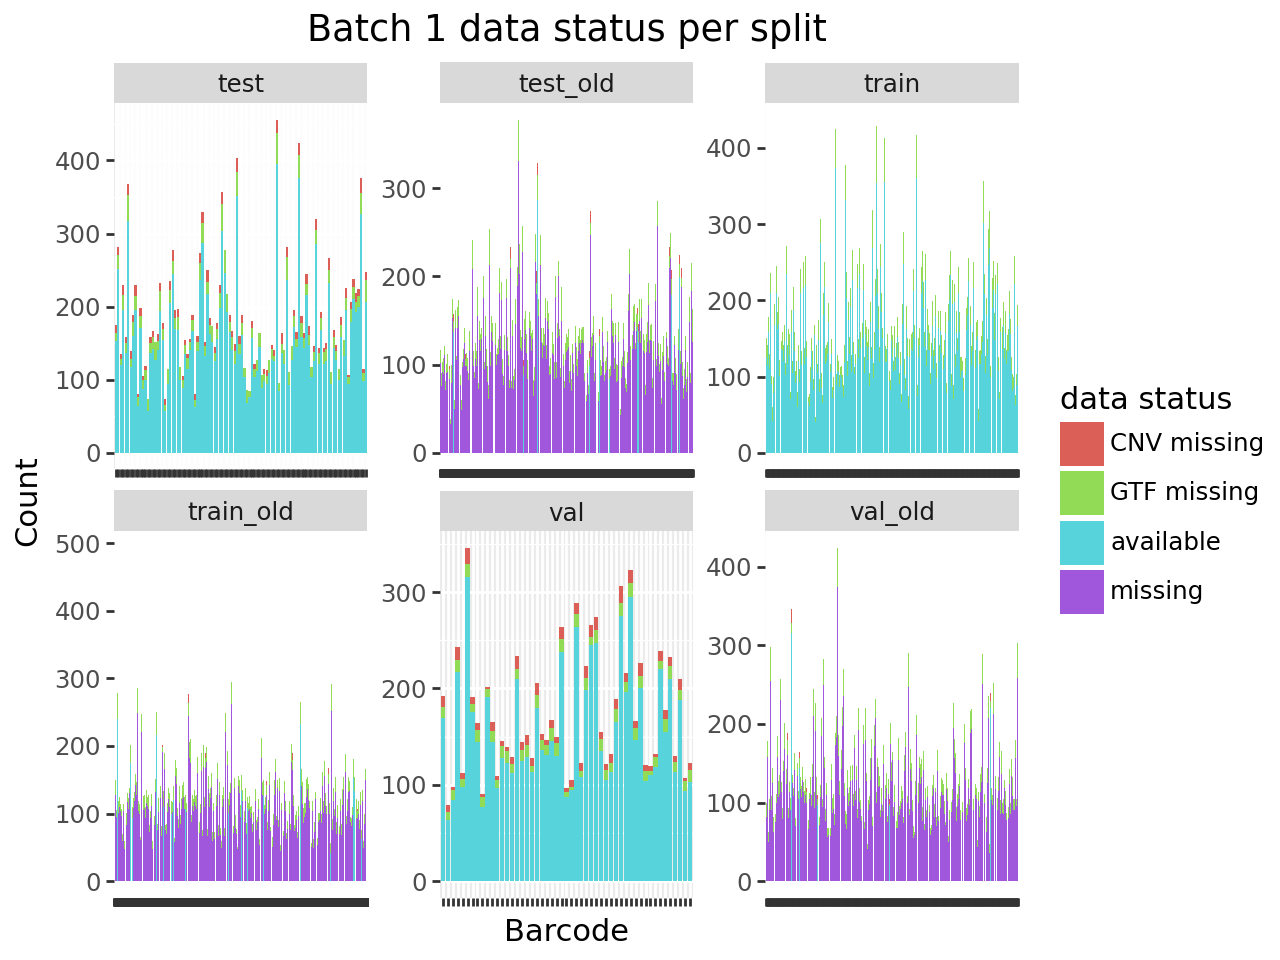

In [68]:
ggplot(data=b1_df, mapping=aes(x='barcode',fill='data status')) +\
    geom_col(stat='count') +\
    facet_wrap('~split', scales='free') +\
    labs(title='Batch 1 data status per split', x='Barcode', y='Count') +\
    theme(axis_text_x=element_blank())

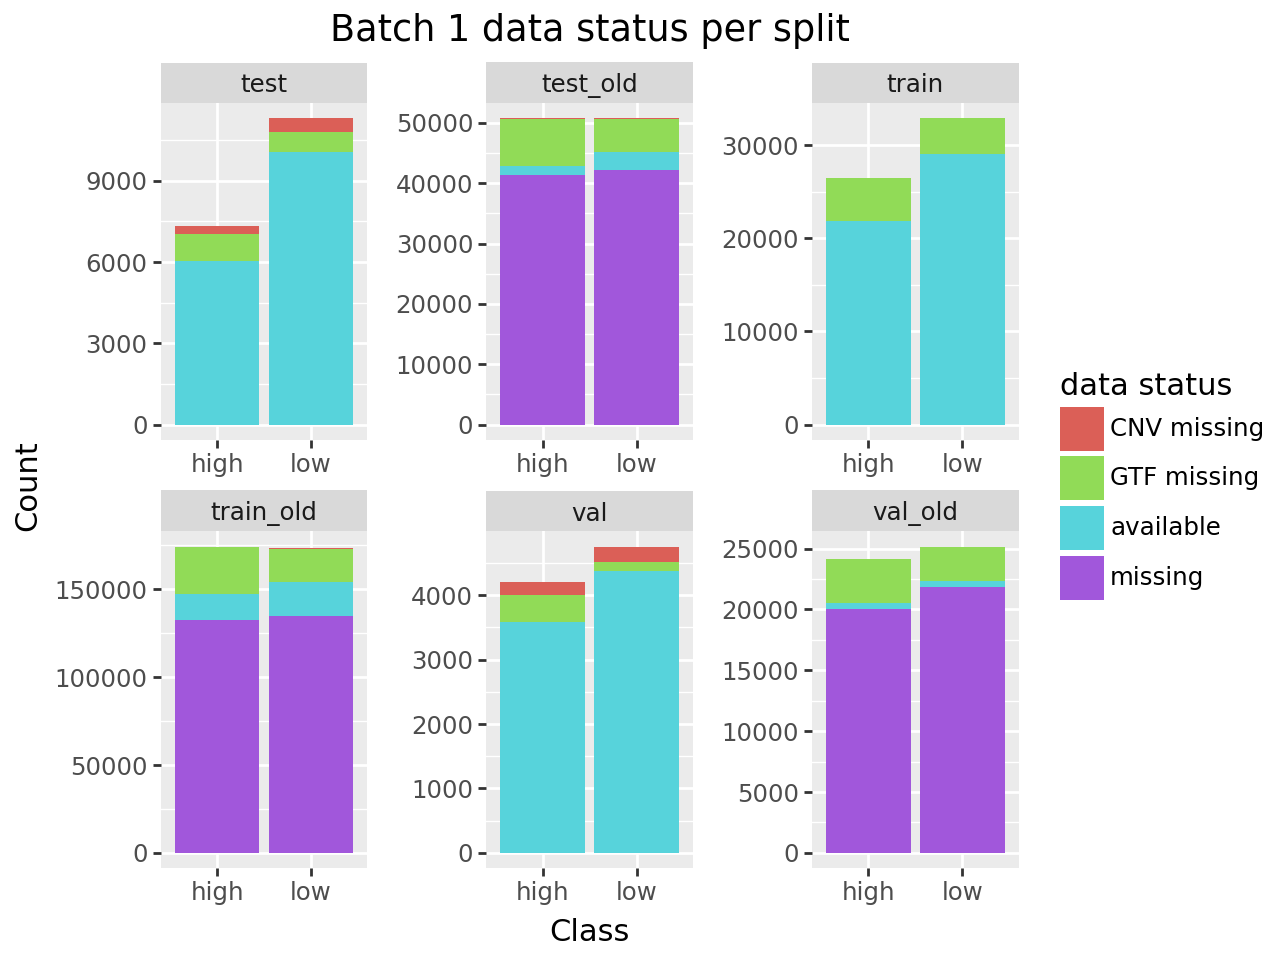

In [64]:
ggplot(data=b1_df, mapping=aes(x='classification',fill='data status')) +\
    geom_col(stat='count') +\
    facet_wrap('~split', scales='free') +\
    labs(title='Batch 1 data status per split', x='Class', y='Count')

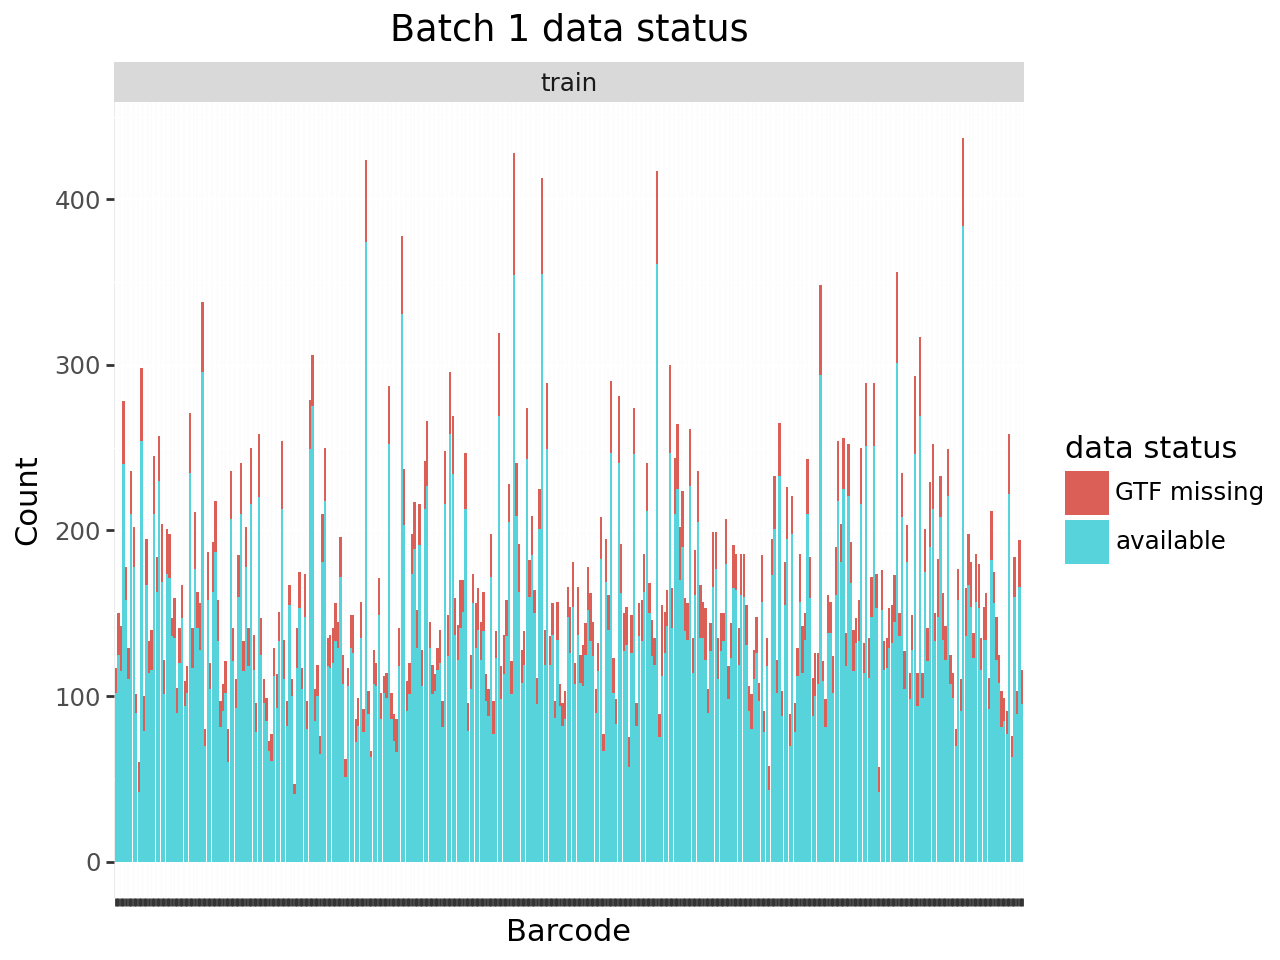

In [ ]:
ggplot(data=b1_df[b1_df['split'] == 'train'], mapping=aes(x='barcode',fill='data status')) +\
    geom_col(stat='count') +\
    facet_wrap('~split') +\
    labs(title='Batch 1 train data status', x='Barcode', y='Count') +\
    theme(axis_text_x=element_blank())

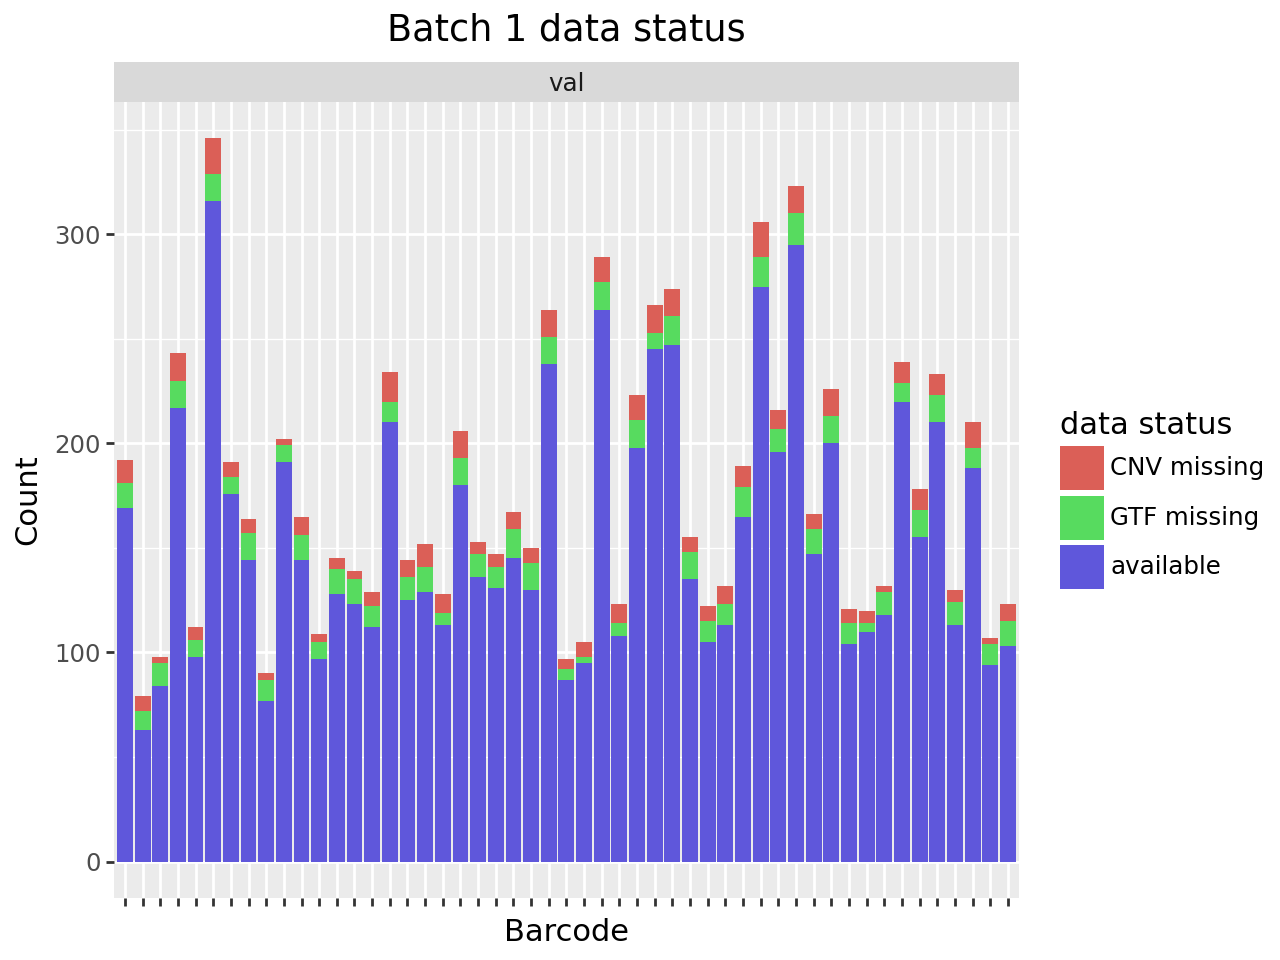

In [ ]:
ggplot(data=b1_df[b1_df['split'] == 'val'], mapping=aes(x='barcode',fill='data status')) +\
    geom_col(stat='count') +\
    facet_wrap('~split') +\
    labs(title='Batch 1 val data status', x='Barcode', y='Count') +\
    theme(axis_text_x=element_blank())

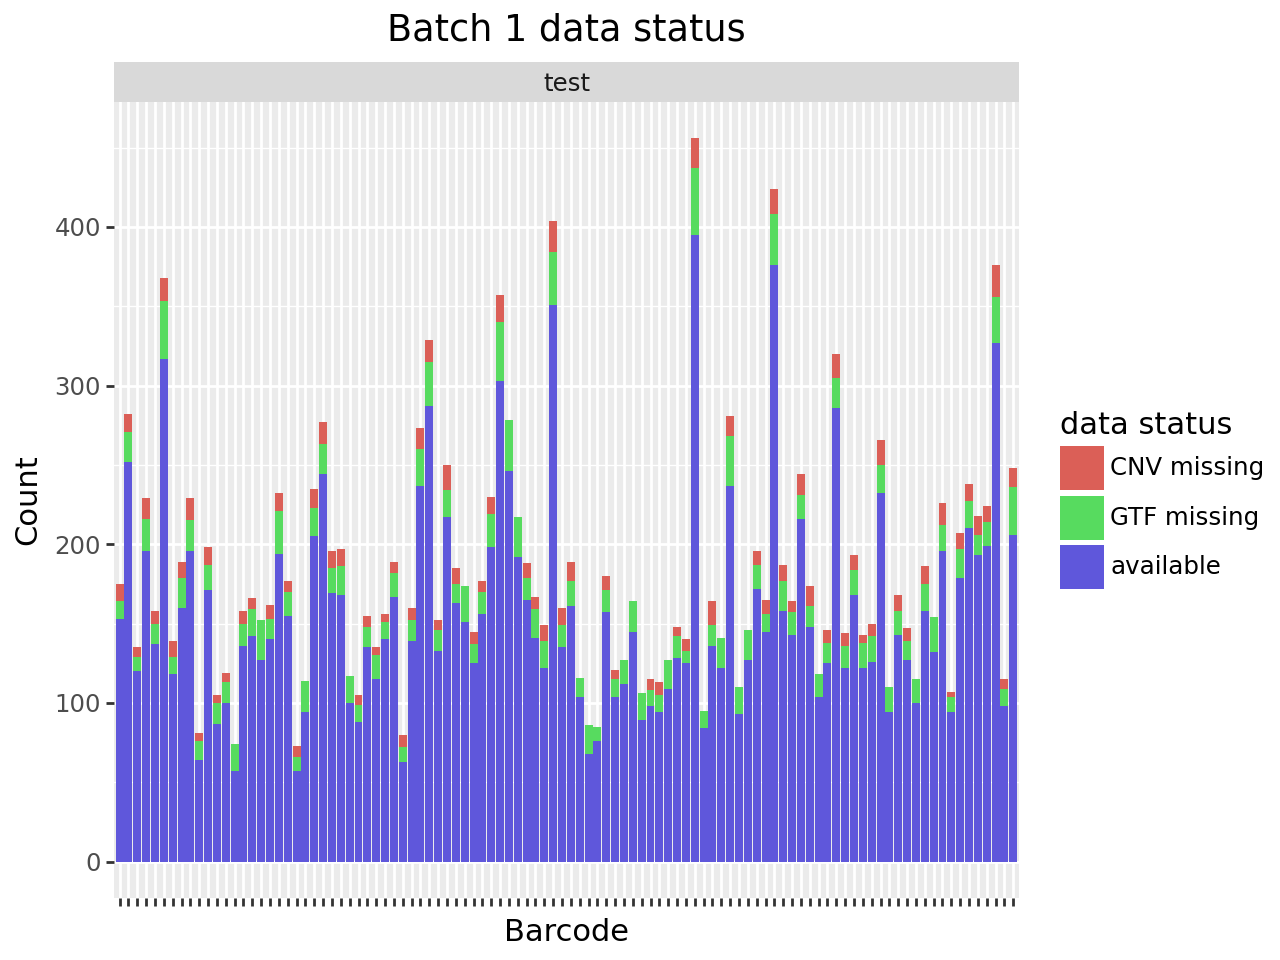

In [ ]:
ggplot(data=b1_df[b1_df['split'] == 'test'], mapping=aes(x='barcode',fill='data status')) +\
    geom_col(stat='count') +\
    facet_wrap('~split') +\
    labs(title='Batch 1 test data status', x='Barcode', y='Count') +\
    theme(axis_text_x=element_blank())

#### Batch 2
Missing data analysis for batch 2.

In [31]:
b2_train_df = pd.read_csv(b2_train_path, sep='\t')
b2_train_df['split'] = 'train'
b2_train = CnvDataset(data_root / 'embeddings' / 'batch_2' / 'train', b2_train_df)
b2_train_df['data status'] = 'missing'
b2_train_df.loc[
    (b2_train_df['barcode'].isin(b2_train.data_df['barcode'])) &
    (b2_train_df['gene_id'].isin(b2_train.data_df['gene_id']))
    ,'data status'] = 'available'
b2_train_df.loc[
    (b2_train_df['gene_id'].isin(b2_noGTF_df['gene_id']))
    ,'data status'] = 'GTF missing'
b2_train_df.loc[
    (b2_train_df['barcode'].isin(b2_noCNV_df['barcode'])) &
    (b2_train_df['gene_id'].isin(b2_noCNV_df['gene_id']))
    ,'data status'] = 'CNV missing'
b2_train_df

Using 239 barcodes
Using 1217 genes
No embedding files for 2835 data points in ../data/embeddings/batch_2/train/single_gene_barcode!


,barcode,gene_id,expression_count,classification,split,embedding_path,data status
0,AAAGCACCAACAGCCT-2,ENSG00000187583,0.385658,low,train,../data/embeddings/batch_2/train/single_gene_b...,available
1,AAAGCACCAACAGCCT-2,ENSG00000121904,0.385658,low,train,../data/embeddings/batch_2/train/single_gene_b...,available
2,AAAGCACCAACAGCCT-2,ENSG00000269113,0.663287,low,train,../data/embeddings/batch_2/train/single_gene_b...,available
3,AAAGCACCAACAGCCT-2,ENSG00000186094,1.457234,high,train,../data/embeddings/batch_2/train/single_gene_b...,available
4,AAAGCACCAACAGCCT-2,ENSG00000226476,0.880350,low,train,../data/embeddings/batch_2/train/single_gene_b...,available
...,...,...,...,...,...,...,...
23491,TTTCTTGCAAACCTTG-2,ENSG00000198938,2.550302,high,train,../data/embeddings/batch_2/train/single_gene_b...,GTF missing
23492,TTTCTTGCAAACCTTG-2,ENSG00000198840,2.047580,high,train,../data/embeddings/batch_2/train/single_gene_b...,GTF missing
23493,TTTCTTGCAAACCTTG-2,ENSG00000198886,0.988530,high,train,../data/embeddings/batch_2/train/single_gene_b...,GTF missing
23494,TTTCTTGCAAACCTTG-2,ENSG00000198786,0.988530,high,train,../data/embeddings/batch_2/train/single_gene_b...,GTF missing


In [32]:
b2_val_df = pd.read_csv(b2_val_path, sep='\t')
b2_val_df['split'] = 'val'
b2_val = CnvDataset(data_root / 'embeddings' / 'batch_2' / 'val', b2_val_df)
b2_val_df['data status'] = 'missing'
b2_val_df.loc[
    (b2_val_df['barcode'].isin(b2_val.data_df['barcode'])) &
    (b2_val_df['gene_id'].isin(b2_val.data_df['gene_id']))
    ,'data status'] = 'available'
b2_val_df.loc[
    (b2_val_df['gene_id'].isin(b2_noGTF_df['gene_id']))
    ,'data status'] = 'GTF missing'
b2_val_df.loc[
    (b2_val_df['barcode'].isin(b2_noCNV_df['barcode'])) &
    (b2_val_df['gene_id'].isin(b2_noCNV_df['gene_id']))
    ,'data status'] = 'CNV missing'
b2_val_df

Using 35 barcodes
Using 621 genes
No embedding files for 426 data points in ../data/embeddings/batch_2/val/single_gene_barcode!


,barcode,gene_id,expression_count,classification,split,embedding_path,data status
0,AAACCAACATTGCGGT-2,ENSG00000162512,1.024897,high,val,../data/embeddings/batch_2/val/single_gene_bar...,available
1,AAACCAACATTGCGGT-2,ENSG00000186094,1.850096,high,val,../data/embeddings/batch_2/val/single_gene_bar...,available
2,AAACCAACATTGCGGT-2,ENSG00000231252,1.024897,high,val,../data/embeddings/batch_2/val/single_gene_bar...,available
3,AAACCAACATTGCGGT-2,ENSG00000183023,1.024897,high,val,../data/embeddings/batch_2/val/single_gene_bar...,available
4,AAACCAACATTGCGGT-2,ENSG00000115355,1.024897,high,val,../data/embeddings/batch_2/val/single_gene_bar...,available
...,...,...,...,...,...,...,...
3598,TTTGTGGCATGAATAG-2,ENSG00000130254,1.790029,high,val,../data/embeddings/batch_2/val/single_gene_bar...,available
3599,TTTGTGGCATGAATAG-2,ENSG00000080573,1.790029,high,val,../data/embeddings/batch_2/val/single_gene_bar...,available
3600,TTTGTGGCATGAATAG-2,ENSG00000167615,1.790029,high,val,../data/embeddings/batch_2/val/single_gene_bar...,available
3601,TTTGTGGCATGAATAG-2,ENSG00000225377,1.790029,high,val,../data/embeddings/batch_2/val/single_gene_bar...,available


In [33]:
b2_test_df = pd.read_csv(b2_test_path, sep='\t')
b2_test_df['split'] = 'test'
b2_test = CnvDataset(data_root / 'embeddings' / 'batch_2' / 'test', b2_test_df)
b2_test_df['data status'] = 'missing'
b2_test_df.loc[
    (b2_test_df['barcode'].isin(b2_test.data_df['barcode'])) &
    (b2_test_df['gene_id'].isin(b2_test.data_df['gene_id']))
    ,'data status'] = 'available'
b2_test_df.loc[
    (b2_test_df['gene_id'].isin(b2_noGTF_df['gene_id']))
    ,'data status'] = 'GTF missing'
b2_test_df.loc[
    (b2_test_df['barcode'].isin(b2_noCNV_df['barcode'])) &
    (b2_test_df['gene_id'].isin(b2_noCNV_df['gene_id']))
    ,'data status'] = 'CNV missing'
b2_test_df

Using 69 barcodes
Using 726 genes
No embedding files for 884 data points in ../data/embeddings/batch_2/test/single_gene_barcode!


,barcode,gene_id,expression_count,classification,split,embedding_path,data status
0,AACAAAGGTGTAACCA-2,ENSG00000187583,1.146755,high,test,../data/embeddings/batch_2/test/single_gene_ba...,available
1,AACAAAGGTGTAACCA-2,ENSG00000130775,1.146755,high,test,../data/embeddings/batch_2/test/single_gene_ba...,available
2,AACAAAGGTGTAACCA-2,ENSG00000117395,1.146755,high,test,../data/embeddings/batch_2/test/single_gene_ba...,available
3,AACAAAGGTGTAACCA-2,ENSG00000269113,1.146755,high,test,../data/embeddings/batch_2/test/single_gene_ba...,available
4,AACAAAGGTGTAACCA-2,ENSG00000186094,1.146755,high,test,../data/embeddings/batch_2/test/single_gene_ba...,available
...,...,...,...,...,...,...,...
7323,TTTGCGGAGTAACGGA-2,ENSG00000198763,2.001615,high,test,../data/embeddings/batch_2/test/single_gene_ba...,GTF missing
7324,TTTGCGGAGTAACGGA-2,ENSG00000198712,2.001615,high,test,../data/embeddings/batch_2/test/single_gene_ba...,GTF missing
7325,TTTGCGGAGTAACGGA-2,ENSG00000198899,2.001615,high,test,../data/embeddings/batch_2/test/single_gene_ba...,GTF missing
7326,TTTGCGGAGTAACGGA-2,ENSG00000198840,2.001615,high,test,../data/embeddings/batch_2/test/single_gene_ba...,GTF missing


In [34]:
b2_df = pd.concat([b2_train_df, b2_val_df, b2_test_df])

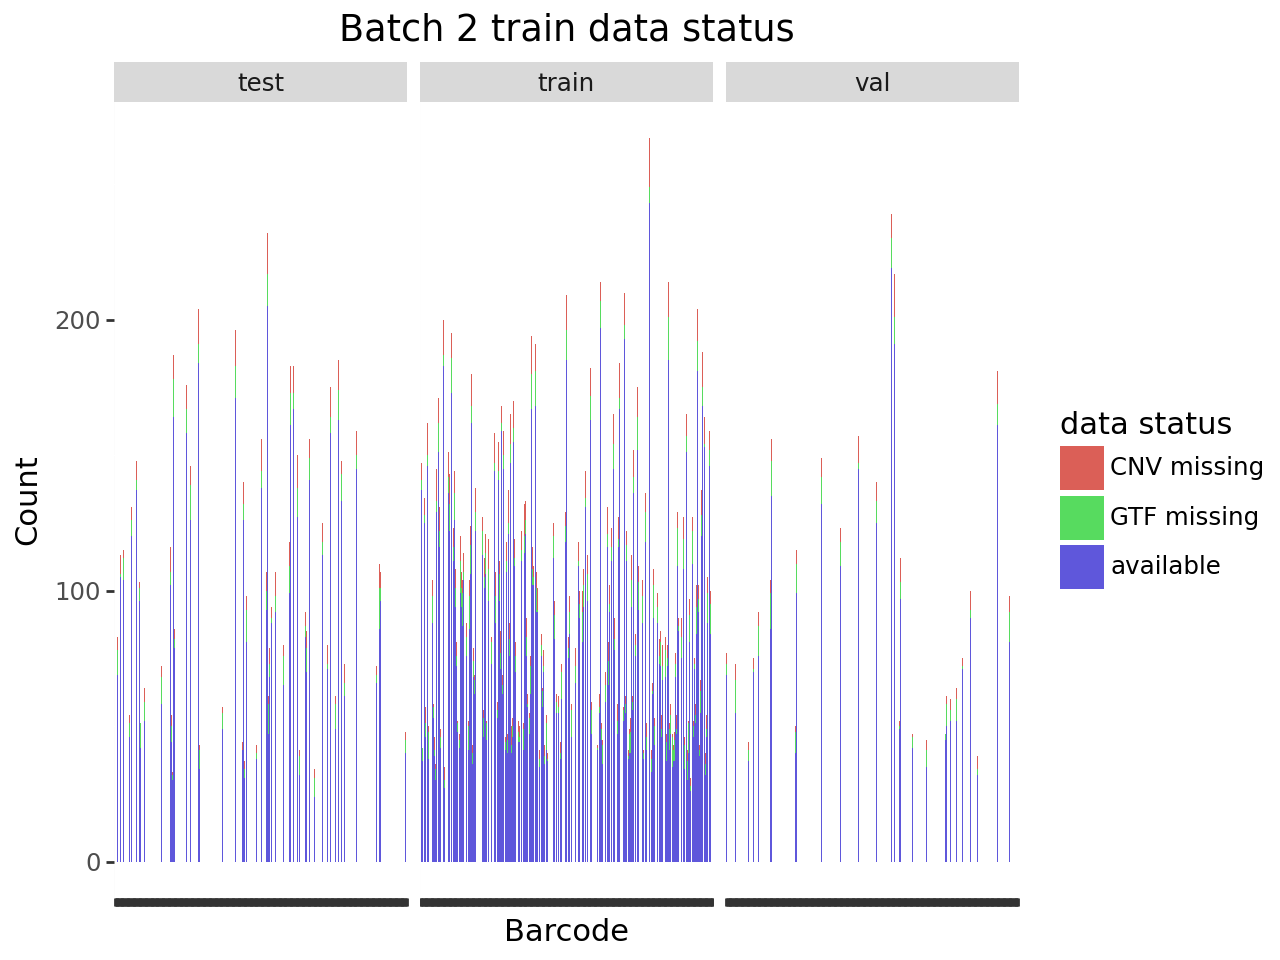

In [35]:
ggplot(data=b2_df, mapping=aes(x='barcode',fill='data status')) +\
    geom_col(stat='count') +\
    facet_wrap('~split') +\
    labs(title='Batch 2 train data status', x='Barcode', y='Count') +\
    theme(axis_text_x=element_blank())

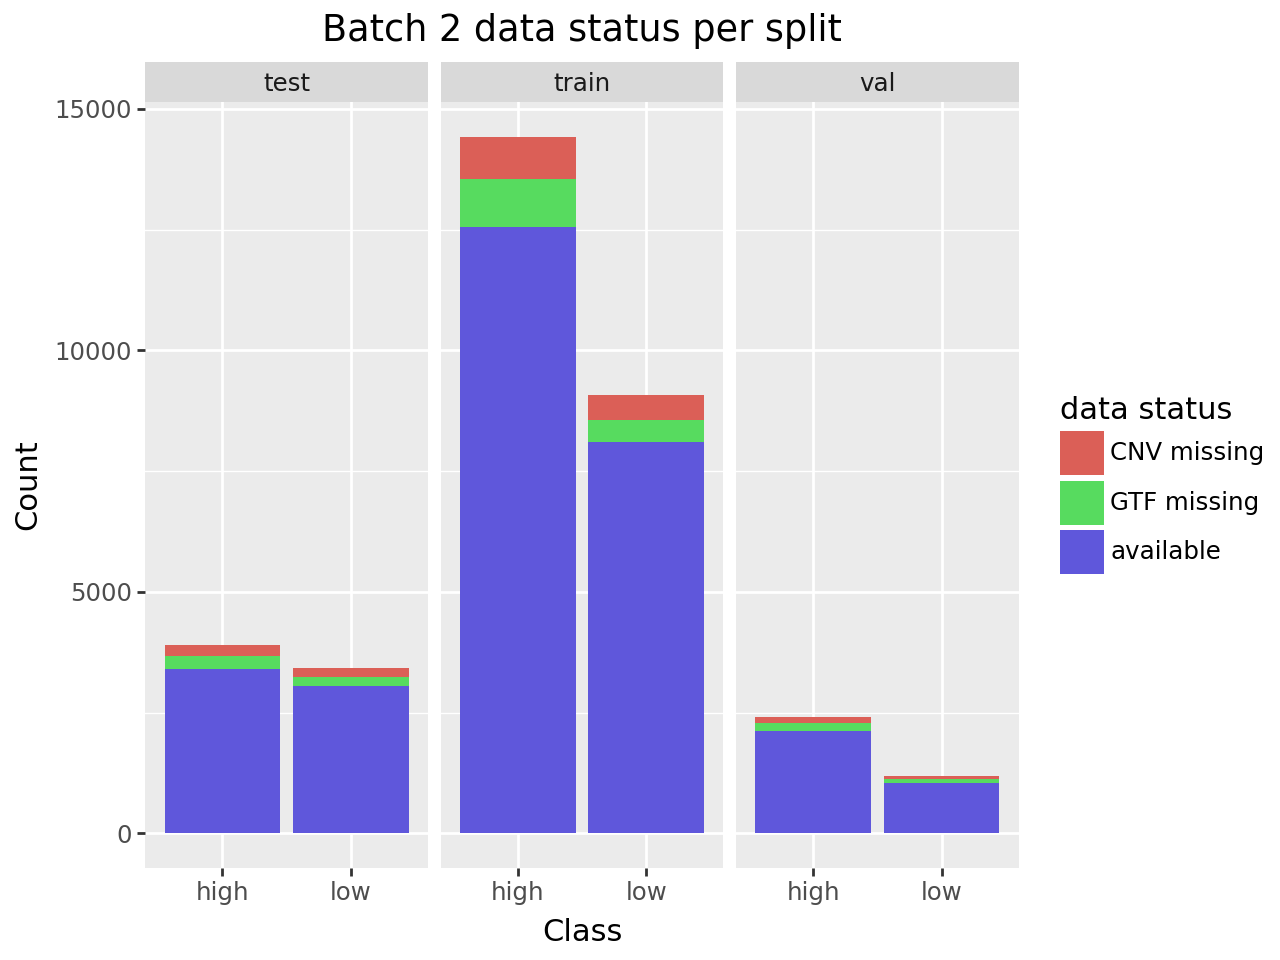

In [37]:
ggplot(data=b2_df, mapping=aes(x='classification',fill='data status')) +\
    geom_col(stat='count') +\
    facet_wrap('~split') +\
    labs(title='Batch 2 data status per split', x='Class', y='Count')

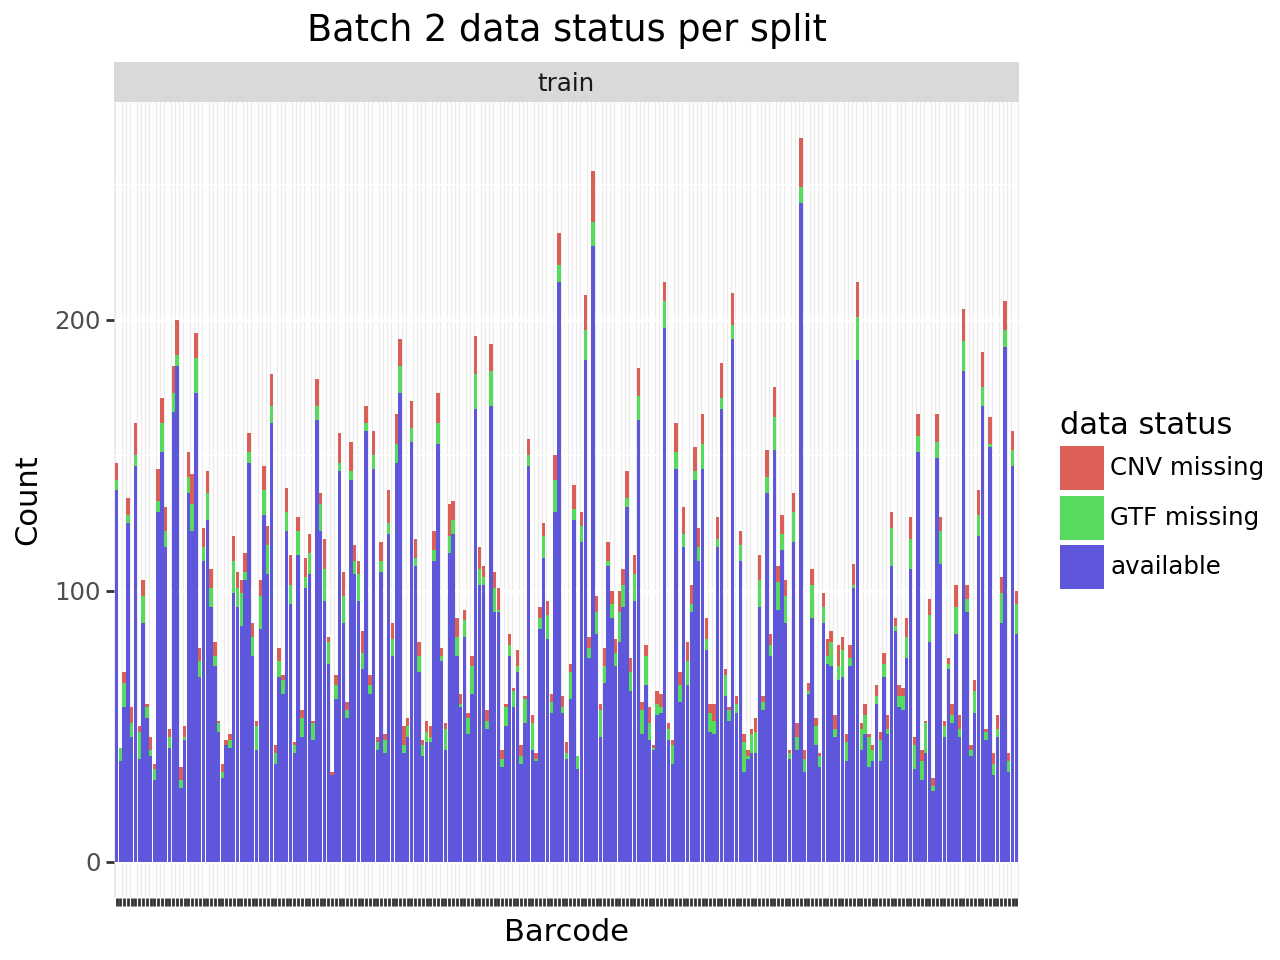

In [115]:
ggplot(data=b2_df[b2_df['split'] == 'train'], mapping=aes(x='barcode',fill='data status')) +\
    geom_col(stat='count') +\
    facet_wrap('~split') +\
    labs(title='Batch 2 data status per split', x='Barcode', y='Count') +\
    theme(axis_text_x=element_blank())

In [1]:
ggplot(data=b2_df[b2_df['split'] == 'val'], mapping=aes(x='barcode',fill='data status')) +\
    geom_col(stat='count') +\
    facet_wrap('~split') +\
    labs(title='Batch 2 validation data status', x='Barcode', y='Count') +\
    theme(axis_text_x=element_blank())

NameError: name 'ggplot' is not defined

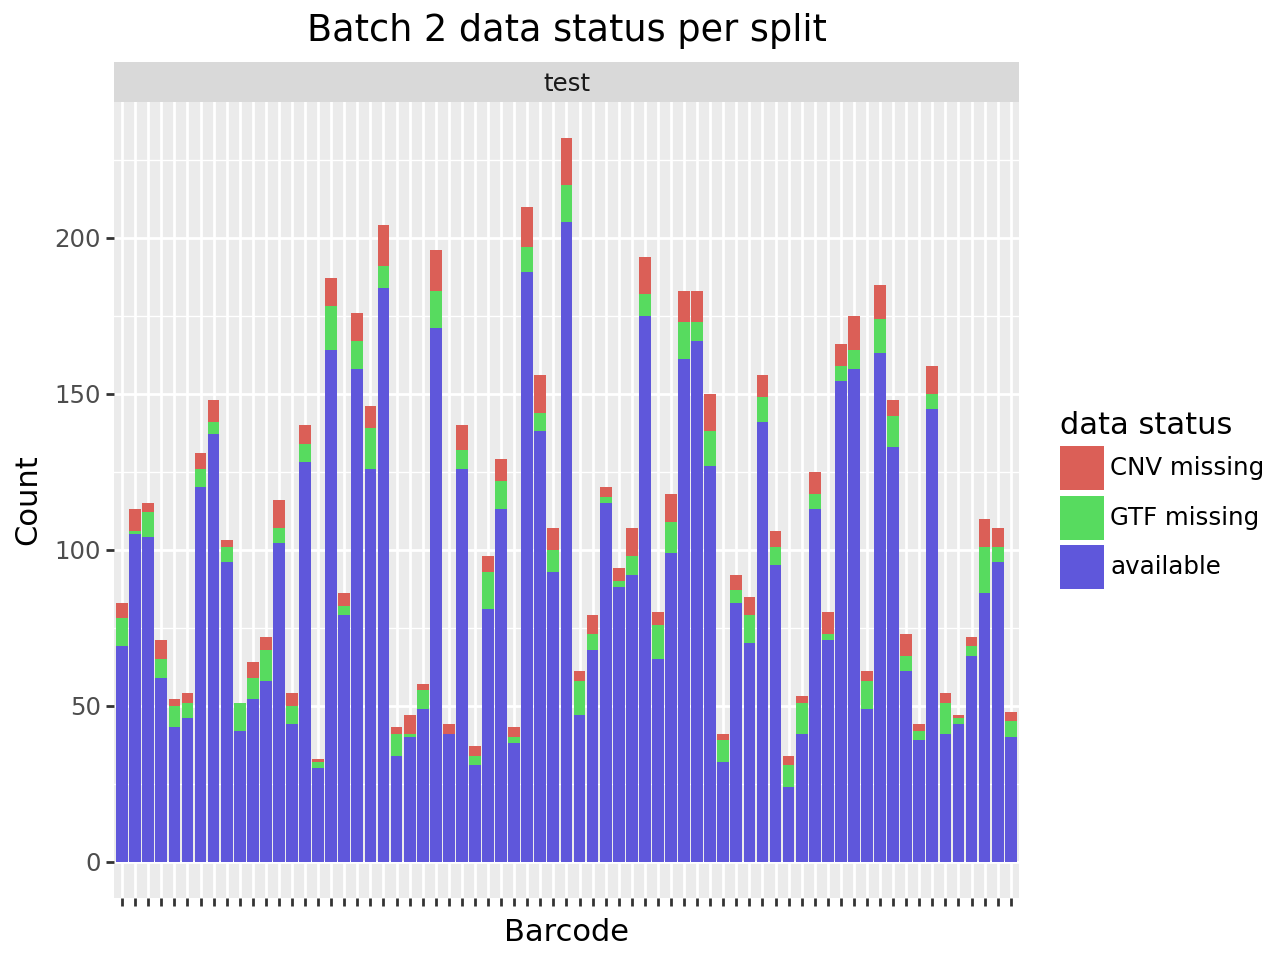

In [ ]:
ggplot(data=b2_df[b2_df['split'] == 'test'], mapping=aes(x='barcode',fill='data status')) +\
    geom_col(stat='count') +\
    facet_wrap('~split') +\
    labs(title='Batch 2 test data status', x='Barcode', y='Count') +\
    theme(axis_text_x=element_blank())

### Downsampled splits

In [53]:
b1_train_down_path = data_root / 'splits' / 'batch1_train_subsampled'
b1_train_down_df = pd.read_csv(b1_train_down_path, sep='\t')

In [55]:
b1_train_down = CnvDataset(
    root=data_root / 'embeddings' / 'batch_1' / 'train',
    data_df=b1_train_down_df
)

Using 356 barcodes
Using 1549 genes
No embedding files for 4092 data points in ../data/embeddings/batch_1/train/single_gene_barcode!


In [56]:
b1_train_down_df['split'] = 'train_down_samp'
b1_train_down_df['data status'] = 'missing'
b1_train_down_df.loc[
    (b1_train_down_df['barcode'].isin(b1_train_down.data_df['barcode'])) &
    (b1_train_down_df['gene_id'].isin(b1_train_down.data_df['gene_id']))
    ,'data status'] = 'available'
b1_train_down_df.loc[
    (b1_train_down_df['gene_id'].isin(b1_noGTF_df['gene_id']))
    ,'data status'] = 'GTF missing'
b1_train_down_df.loc[
    (b1_train_down_df['barcode'].isin(b1_noCNV_df['barcode'])) &
    (b1_train_down_df['gene_id'].isin(b1_noCNV_df['gene_id']))
    ,'data status'] = 'CNV missing'
b1_train_down_df

,barcode,gene_id,expression_count,classification,embedding_path,split,data status
0,AAACCAACATGTCAGC-1,ENSG00000229956,1.173642,high,../data/embeddings/batch_1/train/single_gene_b...,train_down_samp,available
1,AAACCAACATGTCAGC-1,ENSG00000157827,1.470319,high,../data/embeddings/batch_1/train/single_gene_b...,train_down_samp,available
2,AAACCAACATGTCAGC-1,ENSG00000236283,1.470319,high,../data/embeddings/batch_1/train/single_gene_b...,train_down_samp,available
3,AAACCAACATGTCAGC-1,ENSG00000115896,1.173642,high,../data/embeddings/batch_1/train/single_gene_b...,train_down_samp,available
4,AAACCAACATGTCAGC-1,ENSG00000187514,1.173642,high,../data/embeddings/batch_1/train/single_gene_b...,train_down_samp,available
...,...,...,...,...,...,...,...
52907,TGCTATGCACAACAGG-1,ENSG00000187239,0.451939,low,../data/embeddings/batch_1/train/single_gene_b...,train_down_samp,available
52908,CCACTTGGTAATCGCA-1,ENSG00000010810,0.726569,low,../data/embeddings/batch_1/train/single_gene_b...,train_down_samp,available
52909,AACAAGCCACATACTG-1,ENSG00000150593,0.367547,low,../data/embeddings/batch_1/train/single_gene_b...,train_down_samp,available
52910,TGCTATGCACAACAGG-1,ENSG00000107263,0.451939,low,../data/embeddings/batch_1/train/single_gene_b...,train_down_samp,available


In [65]:
b1_df = pd.concat([b1_train_df, b1_train_old_df, b1_train_down_df])

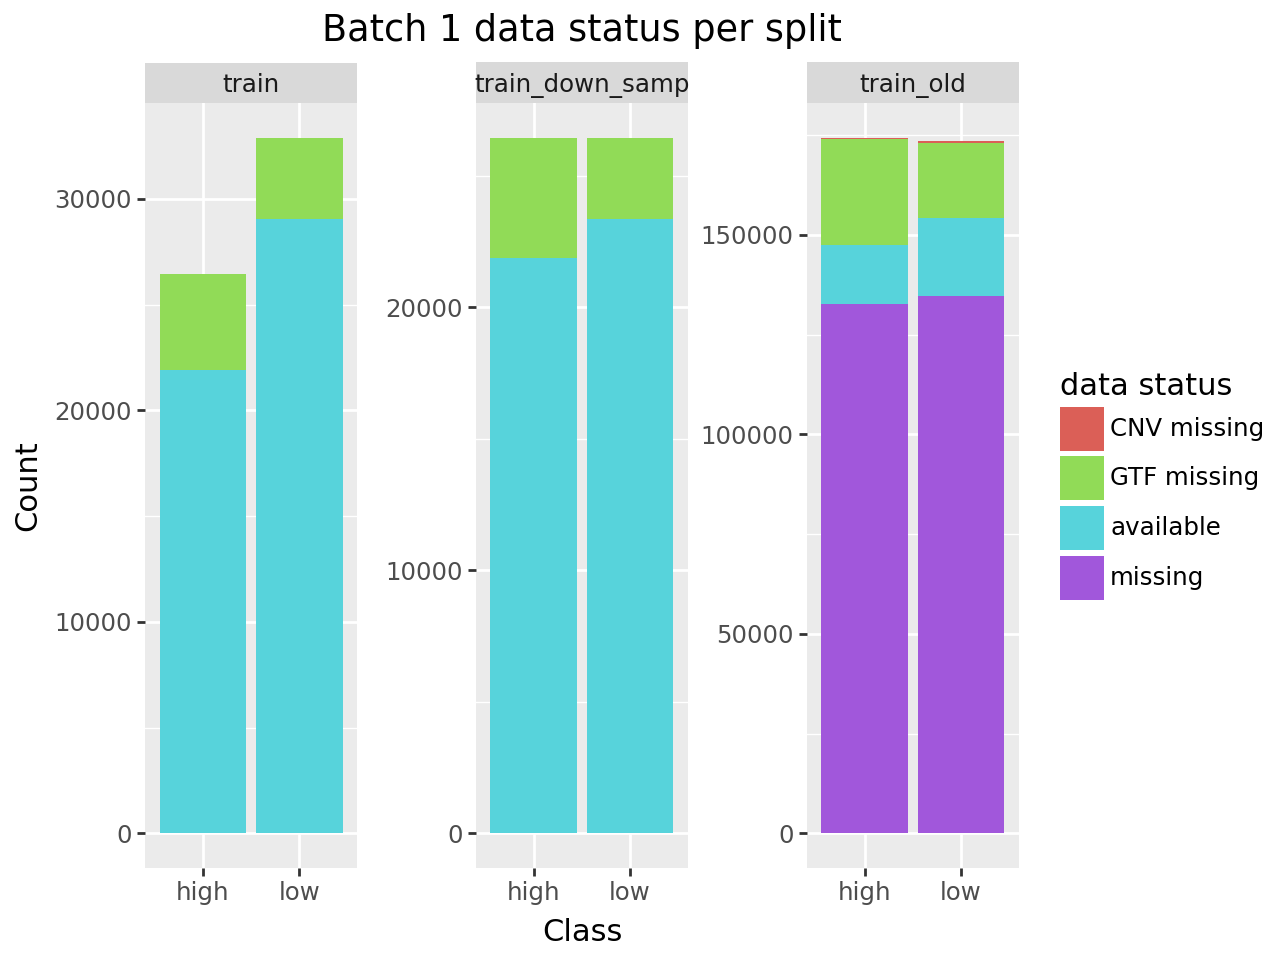

In [66]:
ggplot(data=b1_df, mapping=aes(x='classification',fill='data status')) +\
    geom_col(stat='count') +\
    facet_wrap('~split', scales='free') +\
    labs(title='Batch 1 data status per split', x='Class', y='Count')

### Genes with missing GTF annotation

In [ ]:
print('Batch1 uniq genes with missing GTF annotation')
b1_train_missing_genes = set(b1_train_df['gene_id'].unique()).difference(set(b1_train.data_df['gene_id'].unique()))
print(len(b1_train_missing_genes), 'train')
b1_val_missing_genes = set(b1_val_df['gene_id'].unique()).difference(set(b1_val.data_df['gene_id'].unique()))
print(len(b1_val_missing_genes), 'val')
b1_test_missing_genes = set(b1_test_df['gene_id'].unique()).difference(set(b1_test.data_df['gene_id'].unique()))
print(len(b1_test_missing_genes), 'test')
b1_missing_genes = b1_train_missing_genes.union(b1_val_missing_genes).union(b1_test_missing_genes)
print(len(b1_missing_genes), 'b1 total')

Batch1 uniq genes with missing GTF annotation
632 train
88 val
96 test
637 b1 total


In [ ]:
print('Batch 2 uniq genes with missing GTF annotation')
b2_train_missing_genes = set(b2_train_df['gene_id'].unique()).difference(set(b2_train.data_df['gene_id'].unique()))
print(len(b2_train_missing_genes), 'train')
b2_val_missing_genes = set(b2_val_df['gene_id'].unique()).difference(set(b2_val.data_df['gene_id'].unique()))
print(len(b2_val_missing_genes), 'val')
b2_test_missing_genes = set(b2_test_df['gene_id'].unique()).difference(set(b2_test.data_df['gene_id'].unique()))
print(len(b2_test_missing_genes), 'test')
b2_missing_genes = b2_train_missing_genes.union(b2_val_missing_genes).union(b2_test_missing_genes)
print(len(b2_missing_genes), 'b2 total')

Batch 2 uniq genes with missing GTF annotation
94 train
58 val
62 test
108 b2 total


In [85]:
b1_missing_gene_df = pd.DataFrame({'gene_id': list(b1_missing_genes)})
b1_missing_gene_df.to_csv(data_root / 'preprocessing' / 'batch1_missing_genes.csv', index=False)

In [86]:
b2_missing_gene_df = pd.DataFrame({'gene_id': list(b2_missing_genes)})
b2_missing_gene_df.to_csv(data_root / 'preprocessing' / 'batch2_missing_genes.csv', index=False)

## Barcode - gene pairs
Previously, we noticed during embedding calculation, that not all barcodes have targets/labels all genes, which is required for supervised learning. 
Thus, we analyse the barcode - gene pairs in the data here.
In particular, we want to identify the minimal gene set, that is shared among all barcodes of a batch.

In [ ]:
# algoritm idea make iterative intersections.
# 1. start will a set of all uniq genes
# 2. for each uniq barcode intersect the uniq gene ids associated to this barcode
# 3. return the result of all intersections

In [13]:
def find_minimal_gene_set(df: pd.DataFrame):
    uniq_gene_ids = set(df['gene_id'])
    uniq_barodes = set(df['barcode'])
    minimal_gene_set = uniq_gene_ids
    for barcode in uniq_barodes:
        minimal_gene_set = minimal_gene_set.intersection(
            set(df[df['barcode'] == barcode]['gene_id'])
        )
    return minimal_gene_set

In [8]:
uniq_gene_ids = set(b1_df['gene_id'])
len(uniq_gene_ids)
list(uniq_gene_ids)[:10]

['ENSG00000186047',
 'ENSG00000188001',
 'ENSG00000233008',
 'ENSG00000154485',
 'ENSG00000196787',
 'ENSG00000287200',
 'ENSG00000224982',
 'ENSG00000130844',
 'ENSG00000152583',
 'ENSG00000053254']

In [9]:
uniq_barodes = set(b1_df['barcode'])
len(uniq_barodes)
list(uniq_barodes)[:10]

['ACCCTGTTCCAGGAAA-1',
 'TATATCCTCCTGGTCT-1',
 'TTCGGTACAAATTGCT-1',
 'GTACTGGTCATGTGGT-1',
 'CTTGCGCGTTTATGGG-1',
 'GCACTAAGTTTACGTC-1',
 'GCCTTAACATTGACAT-1',
 'TGAAGGATCATTTGCT-1',
 'CTCCTGAGTTGTGACA-1',
 'TTAAGTGTCAGGTCCA-1']

In [10]:
minimal_gene_overlap = uniq_gene_ids
for barcode in uniq_barodes:
    minimal_gene_overlap = minimal_gene_overlap.intersection(
        set(b1_df[b1_df['barcode'] == barcode]['gene_id'])
    )
len(minimal_gene_overlap)

2000

In [ ]:
b1_min_gene_set = find_minimal_gene_set(
    b1_df = pd.read_csv(b1_full_data, sep='\t')
)
len(b1_min_gene_set)

In vestigate minimal gene set for batch 2.

In [12]:
b2_df = pd.read_csv(b2_full_data, sep='\t')

In [14]:
b2_min_gene_set = find_minimal_gene_set(b2_df)
len(b2_min_gene_set)

2000

### Minimal gene set of splits
As we see, the minimal gene overlap contains all 2000 genes we selected for our analysis.
Thus, check if the error arrises from the split data.

#### Batch 1 train
Minimal gene overlap set for training split of batch 1.

In [15]:
b1_train_min_gene_set = find_minimal_gene_set(
    pd.read_csv(b1_train_path, sep='\t')
)
len(b1_train_min_gene_set)

0

#### Batch 1 validation
Minimal gene overlap set for training split of batch 1.

In [16]:
b1_val_min_gene_set = find_minimal_gene_set(
    pd.read_csv(b1_val_path, sep='\t')
)
len(b1_val_min_gene_set)

0

#### Batch 1 test
Minimal gene overlap set for training split of batch 1.

In [17]:
b1_test_min_gene_set = find_minimal_gene_set(
    pd.read_csv(b1_test_path, sep='\t')
)
len(b1_test_min_gene_set)

0

#### Batch 2 train

In [18]:
b2_train_min_gene_set = find_minimal_gene_set(
    pd.read_csv(b2_train_path, sep='\t')
)
len(b2_train_min_gene_set)

0

#### Batch 2 validation

In [19]:
b2_val_min_gene_set = find_minimal_gene_set(
    pd.read_csv(b2_val_path, sep='\t')
)
len(b2_val_min_gene_set)

0

#### Batch 2 test

In [20]:
b2_test_min_gene_set = find_minimal_gene_set(
    pd.read_csv(b2_test_path, sep='\t')
)
len(b2_test_min_gene_set)

0

In [116]:
all(data_set.data_df['embedding_path'].apply(lambda p: str(p).endswith('mtx')))

True

In [131]:
dist_list = list()
for i in range(len(data_set)):
    dist_list.append(torch.sum(data_set[i]['embedding'], axis=1))
len(dist_list)

6444

In [133]:
torch.sum(dist_tensor, axis=0)

tensor([17221102, 15241252, 15535574, 17700908,        0,  1580000,  5040000])

In [37]:
data_set.data_df

,barcode,gene_id,expression_count,classification,embedding_path
2,AAAGGTTAGGGTGGAT-1,ENSG00000231252,1.257665,high,../data/embeddings/batch_1/val/single_gene_bar...
3,AAAGGTTAGGGTGGAT-1,ENSG00000229956,0.696581,low,../data/embeddings/batch_1/val/single_gene_bar...
4,AAAGGTTAGGGTGGAT-1,ENSG00000188641,0.407756,low,../data/embeddings/batch_1/val/single_gene_bar...
5,AAAGGTTAGGGTGGAT-1,ENSG00000197956,0.696581,low,../data/embeddings/batch_1/val/single_gene_bar...
6,AAAGGTTAGGGTGGAT-1,ENSG00000162687,0.920410,high,../data/embeddings/batch_1/val/single_gene_bar...
...,...,...,...,...,...
8939,TTGGCTACATAAGTTC-1,ENSG00000205542,1.192522,high,../data/embeddings/batch_1/val/single_gene_bar...
8940,TTGGCTACATAAGTTC-1,ENSG00000188158,1.192522,high,../data/embeddings/batch_1/val/single_gene_bar...
8941,TTGGCTACATAAGTTC-1,ENSG00000147010,0.764393,low,../data/embeddings/batch_1/val/single_gene_bar...
8942,TTGGCTACATAAGTTC-1,ENSG00000158813,1.192522,high,../data/embeddings/batch_1/val/single_gene_bar...


In [40]:
b1_overlaps_dt = pd.read_csv(data_root / 'gene_positions_and_overlaps' / 'overlaps_batch1.tsv', sep='\t')

In [60]:
b1_val_df = data_set.data_df[['barcode', 'gene_id']]
b1_ovp_df = b1_overlaps_dt[['barcode', 'gene_id']]

In [61]:
b1_ovp_df.merge(b1_val_df, on=['barcode', 'gene_id'])

,barcode,gene_id
0,AAAGGTTAGGGTGGAT-1,ENSG00000197956
1,AAAGGTTAGGGTGGAT-1,ENSG00000162687
2,AAAGGTTAGGGTGGAT-1,ENSG00000092969
3,AAAGGTTAGGGTGGAT-1,ENSG00000143702
4,AACAGCAAGCAGGTGG-1,ENSG00000127124
...,...,...
5778,TGGCCTTTCTTAATGG-1,ENSG00000188158
5779,TTCTTAGGTCACACCC-1,ENSG00000147010
5780,TTCTTAGGTCACACCC-1,ENSG00000147010
5781,TTGGCTACATAAGTTC-1,ENSG00000101871


In [62]:
b1_ovp_df.merge(b1_val_df, on=['barcode', 'gene_id']).iloc[42]

barcode    ATAGATGCACCTCACC-1
gene_id       ENSG00000118473
Name: 42, dtype: object

In [63]:
b1_val_df[
    (b1_val_df['barcode'] == 'ATAGATGCACCTCACC-1') & 
    (b1_val_df['gene_id'] == 'ENSG00000118473')
]

,barcode,gene_id
1519,ATAGATGCACCTCACC-1,ENSG00000118473


In [64]:
from scipy.io import mmread

In [139]:
# test for batch 1 training split if the ATAC peak signal and the CNV loss are present
for d in Path('../data/embeddings/batch_1/training/single_gene_barcode/').iterdir():
    for f in d.iterdir():
        if f.name.endswith('mtx'):
            t_sum = torch.sum(torch.from_numpy(mmread(f)).to(torch.uint8), axis=1)
            if any(t_sum[4:] > 0):
                print(t_sum)
# mmread('/ENSG00000003096.mtx')

tensor([ 3031,  2155,  2170,  2644,     0,     0, 10000])
tensor([ 3168,  1809,  1963,  3060,     0, 10000,     0])
tensor([ 2703,  2168,  2433,  2696, 10000,     0,     0])
tensor([ 2921,  2110,  1967,  3002,     0,     0, 10000])
tensor([ 2697,  2231,  2191,  2881,     0,     0, 10000])
tensor([ 2377,  2375,  2639,  2609, 10000,     0,     0])
tensor([ 2658,  2107,  2161,  3074,     0,     0, 10000])
tensor([ 3065,  1831,  1915,  3189,     0, 10000,     0])
tensor([2832, 1966, 2083, 3119, 1512,    0,    0])
tensor([ 2940,  1883,  2193,  2984,     0,     0, 10000])
tensor([ 3125,  1951,  2028,  2896,     0, 10000,     0])
tensor([ 2620,  2302,  2129,  2949,     0, 10000,     0])
tensor([2976, 1935, 1996, 3093,    0,    0, 9999])
tensor([ 2855,  2108,  2002,  3035,     0,     0, 10000])
tensor([ 2813,  2191,  2057,  2939,     0,     0, 10000])
tensor([ 2872,  1921,  2158,  3049,     0,     0, 10000])
tensor([ 2721,  2119,  2216,  2944, 10000,     0,     0])
tensor([ 2972,  1710,  1830,

KeyboardInterrupt: 

In [71]:
tensor_from_file = torch.from_numpy(mmread(data_set.data_df['embedding_path'].iloc[1519])).to(torch.uint8)
tensor_from_file

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 1, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [73]:
tensor_from_dataset = data_set[1519]['embedding']
tensor_from_dataset

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 1,  ..., 0, 0, 0],
        [0, 1, 0,  ..., 0, 1, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [74]:
assert torch.equal(tensor_from_dataset, tensor_from_file)

In [77]:
test_region_dt = b1_overlaps_dt[
    (b1_overlaps_dt['barcode'] == 'ATAGATGCACCTCACC-1') & 
    (b1_overlaps_dt['gene_id'] == 'ENSG00000118473')
]
test_region_dt['Start_emb'] = test_region_dt['Start_gene'] - 2000
test_region_dt['End_emb'] = test_region_dt['Start_gene'] + 8000
test_region_dt

/tmp/ipykernel_2734438/699973521.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_2734438/699973521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,barcode,Chromosome,Start_peak,End_peak,gene_id,Start_gene,End_gene,Start_emb,End_emb
394,ATAGATGCACCTCACC-1,1,66533617,66534405,ENSG00000118473,66531267,66753139,66529267,66539267


In [79]:
test_region_dt['Start_emb'] < test_region_dt['Start_peak']

394    True
dtype: bool

In [80]:
test_region_dt['End_emb'] > test_region_dt['Start_peak']

394    True
dtype: bool

In [84]:
from src.data.embedding import Embedder

In [88]:
embedder = Embedder(
    fasta_path=genome_fasta,
    gtf_path=gtf_path,
    atac_path=overlap_path,
    cnv_path=epiAneufinder_path,
    barcode_set={'ATAGATGCACCTCACC-1'},
    gene_set={'ENSG00000118473'}
    )

[Embedder]: Iterating over all possible barcode-gene pairs
[Embedder]: Computing 1 Embeddings with mode: "single_gene_barcode"
[Embedder]: Using 1 barcodes
[Embedder]: Using 1 genes


In [89]:
b, g, e = next(embedder)
print(b, g)
print(e)

ATAGATGCACCTCACC-1 ENSG00000118473
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [94]:
e.sum(axis=1)

array([ 2891,  1966,  2007,  3136, 10000,     0,     0], dtype=uint64)

In [95]:
tensor_from_file.sum(axis=1)

tensor([2811, 2189, 2128, 2872,    0,    0,    0])

This means something is wrong with the dataset class.
The ATAC-seq signal shows up in the newly computed embeddings, but not in dataset or the embedding files. 

## Dataset class
This section tests the dataset class `CnvDataset` from `src/data/dataset.py`.

In [3]:
import sys
sys.path.append('..') # add the parent directory to system path
from src.data.dataset import CnvDataset

In [87]:
# directories we will need
out_root = git_root / 'out'

# files we will need
genome_fasta = data_root / 'reference' / 'GRCh38.d1.vd1.fa'
assert genome_fasta.exists()
gtf_path=data_root / 'gene_positions_and_overlaps' / 'gene_positions.csv'
assert gtf_path.is_file()
overlap_path = data_root / 'gene_positions_and_overlaps' / 'overlaps_batch1.tsv'
assert overlap_path.exists()
epiAneufinder_path = out_root / 'epiAneufinder' / 'epiAneuFinder_results.tsv'
assert epiAneufinder_path.exists()

### File format benchmark
We discussed multiple file formats to use in the backend for storing computed embeddings on the disk. Suggestions were the vanilla pytorch format `.pt`, pickle files `.pkl` and the scipy matrix format `.mtx`.
Since pytorch is using pickle in the backend for creating `.pt` files, we decided to only use the `.pt` and `.mtx` formats.
In the following we benchmark reading from these file types, as this could be a bottleneck during training. 

In [7]:
b1_val_path = data_root / 'splits' / 'batch1_val_filtered.tsv'
b1_val_dataset = CnvDataset(
    root=data_root / 'embeddings' / 'batch_1' / 'val',
    data_df=pd.read_csv(b1_val_path, sep='\t'),
    embedding_mode='single_gene_barcode',
    file_format='mtx',
    verbose=2
)

Using 51 barcodes
Using 1093 genes
No embedding files for 932 data points in ../data/embeddings/batch_1/val/single_gene_barcode!
../data/embeddings/batch_1/val/single_gene_barcode/AAAGGTTAGGGTGGAT-1/ENSG00000173372.mtx


In [67]:
b1_val_redo = CnvDataset(
    root=data_root / 'embeddings' / 'batch_1' / 'val_redo_2',
    data_df=pd.read_csv(b1_val_path, sep='\t'),
    fasta_path=genome_fasta,
    atac_path=overlap_path,
    cnv_path=epiAneufinder_path,
    verbose=2,
    force_recompute=True
)

Using 51 barcodes
Using 1093 genes
Recomputing embeddings:  True
[embed]: Iterating over custom barcode to genes mapping
[embed]: Computing 8954 Embeddings with mode: "single_gene_barcode"
[embed]: Using 51 barcodes
[embed]: Using 1093 genes


[embed]: Computing embeddings (# genes done):   0%|                                            | 0/1093 [00:00<?, ?it/s]

emb_df
 Empty DataFrame
Columns: [barcode, gene_id, embedding_path]
Index: []


RuntimeError: No embedding files found!

In [16]:
b1_val_df = pd.read_csv(b1_val_path, sep='\t')

In [21]:
b1_val_df.shape

(8954, 5)

In [20]:
b1_val_df['embedding_path'] = [
    b1_val_redo.ids_to_emb_path(b, g) for b, g in 
    b1_val_df[['barcode', 'gene_id']].itertuples(index=False)
]

In [23]:
missing_df = b1_val_df[~b1_val_df['embedding_path'].isin(b1_val_redo.data_df['embedding_path'])]

In [35]:
missing_df['barcode'].value_counts()

barcode
AATGCATGTTCACCCA-1    39
CTTTAGGCAGCACGAA-1    39
GCGCCTTGTAACAGGG-1    38
ACCCTGTTCATAGCCG-1    37
GACGTAAAGCATGTTA-1    37
TACGGTTAGCACAGCC-1    36
TACTGACAGAATCTCA-1    33
TTCTTAGGTCACACCC-1    30
TGATGAACAAGGCCAA-1    30
TGGCCTTTCTTAATGG-1    27
GATTTGCAGCCTGTTC-1    20
CGCTTAACATCACAGC-1    19
CTGGACCAGTTGGGCC-1    19
CGATTTGCACGAATCC-1    19
CTGGTTACATTTAAGC-1    19
GTAGTTTCAGGCGAGT-1    19
TGCTAGCCAATTAACC-1    19
GCTATCCTCCCTCGCA-1    19
CACTTTGTCTAACTGA-1    19
TACTAAGTCAGCAAAG-1    18
CAAGGTAAGGTCCAAT-1    18
TCGTTAAAGGTTAGCT-1    17
TCTCGCCCAGGCGATA-1    17
CCATAAGGTGGTTATG-1    17
AAAGGTTAGGGTGGAT-1    17
ATTGAAGCAAATGCCC-1    17
ACTATCCGTTTAACGG-1    17
GGGCTAACAGCATGTC-1    16
TAGTAAGCATGTTGCA-1    16
ATAGGTACAGGTTAAA-1    15
GGACCGAAGCGATAAG-1    15
TGTGGCCAGGAGGACT-1    15
TTGGCTACATAAGTTC-1    14
AAGCCTCCACGAACAG-1    13
CAGCCTAAGTGAAGTG-1    13
TCGTTATTCCTTGCAC-1    13
ATAGATGCACCTCACC-1    13
CACAAGCGTAAATTGC-1    13
ACTAACCAGTTGGGCC-1    13
ACCCGTAAGGGACCTC-

In [29]:
b1_val_redo.data_df

,barcode,gene_id,expression_count,classification,embedding_path
0,GACGTAAAGCATGTTA-1,ENSG00000069424,0.606885,low,../data/embeddings/batch_1/val_redo/single_gen...
1,CCTTAACGTCGTAAAT-1,ENSG00000215788,0.638693,low,../data/embeddings/batch_1/val_redo/single_gen...
2,GCTATCCTCCCTCGCA-1,ENSG00000215788,0.216336,low,../data/embeddings/batch_1/val_redo/single_gen...
3,TACGGTTAGCACAGCC-1,ENSG00000215788,0.569907,low,../data/embeddings/batch_1/val_redo/single_gen...
4,GATTTGCAGCCTGTTC-1,ENSG00000171621,0.346812,low,../data/embeddings/batch_1/val_redo/single_gen...
...,...,...,...,...,...
8017,AAGCCTCCACGAACAG-1,ENSG00000287918,0.744612,low,../data/embeddings/batch_1/val_redo/single_gen...
8018,ACCCTGTTCATAGCCG-1,ENSG00000160219,0.267540,low,../data/embeddings/batch_1/val_redo/single_gen...
8019,GACGTAAAGCATGTTA-1,ENSG00000160219,0.981858,high,../data/embeddings/batch_1/val_redo/single_gen...
8020,GGTCTTGAGGAGCACG-1,ENSG00000160219,0.728388,low,../data/embeddings/batch_1/val_redo/single_gen...


Check if there are duplicate barcode - gene pairs in the val data frame.

In [30]:
b1_val_df[['barcode', 'gene_id']].drop_duplicates().shape

(8954, 2)

In [31]:
b1_val_df.shape

(8954, 5)

In [32]:
b1_val_df[b1_val_df['barcode'] == 'AAAGGTTAGGGTGGAT-1'].shape

(192, 5)

In [41]:
barcode_to_genes = {
    barcode: list(set(b1_val_df[b1_val_df['barcode'] == barcode]['gene_id']))
    for barcode in set(b1_val_df['barcode'])
}

In [42]:
n_embeddings = sum(map(len, barcode_to_genes.values()))
n_embeddings

8954

In [48]:
cnv_df = pd.read_csv(out_root / 'epiAneufinder/epiAneuFinder_results.tsv', sep=' ')

In [49]:
cnv_df

,idx,seq,start,end,GCGCAATGTTGCGGAT-3,CTAGTGAGTCACCTAT-3,AATCATGTCGATCAGT-1,TCCTTAGTCGGGACTC-4,ACTATCCGTCTAACCT-1,GTGCACGGTCACAAAT-3,...,AGTGTGGCAATTATGC-1,AGAGAGGAGCAGGCCT-2,ATCCACCTCAACAAGG-1,GGTTGAGCATAGGCGA-1,GTACTTAAGACACCGC-1,CGTAGCGGTAGGTTGC-1,TGCTATGCAAGGACCA-1,CAGGGCTTCCAAGTGT-2,CAAGTAACAGGTTACC-2,TGATTCAAGTTCCTGC-1
0,1,chr1,800001,900000,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,0,1
1,2,chr1,900001,1000000,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,0,1
2,3,chr1,1000001,1100000,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,0,1
3,4,chr1,1100001,1200000,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,0,1
4,5,chr1,1200001,1300000,1,1,1,1,1,1,...,1,1,1,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26009,26010,chr22,50100001,50200000,1,0,0,1,1,1,...,1,1,1,0,1,1,2,1,1,1
26010,26011,chr22,50200001,50300000,1,0,0,1,1,1,...,1,1,1,0,1,1,2,1,1,1
26011,26012,chr22,50300001,50400000,1,0,0,1,1,1,...,1,1,1,0,1,1,2,1,1,1
26012,26013,chr22,50400001,50500000,1,0,0,1,1,1,...,1,1,1,0,1,1,2,1,1,1


Debug stepwise the mapping dict reshaping code:

1. check barcodes

In [50]:
uniq_barcodes = set(cnv_df.columns[4:])
len(uniq_barcodes)

5778

In [54]:
b1_val_uniq_barcodes = set(b1_val_df['barcode'])
print(len(b1_val_uniq_barcodes))
len(b1_val_uniq_barcodes.intersection(uniq_barcodes))

51


51

In [55]:
iter_barcode_set = set(barcode_to_genes.keys())
uniq_barcodes = uniq_barcodes.intersection(iter_barcode_set)
len(uniq_barcodes)

51

2. check genes

In [57]:
atac_df = pd.read_csv(data_root / 'overlap_genes_peaks.tsv', sep='\t')
atac_df

,Chromosome,Start_peak,End_peak,Start_gene,End_gene,gene_id
0,1,9855,10676,9121,26894,ENSG00000290825
1,1,9855,10676,10010,15670,ENSG00000223972
2,1,181027,181582,87295,183719,ENSG00000241860
3,1,181027,181582,144386,201861,ENSG00000310528
4,1,181027,181582,178931,186937,ENSG00000308415
...,...,...,...,...,...,...
92630,Y,11332807,11333567,11330329,11335595,ENSG00000258991
92631,Y,11333695,11334440,11330329,11335595,ENSG00000258991
92632,Y,11333695,11334440,11333627,11339693,ENSG00000270455
92633,Y,56855391,56856232,56853244,56857488,ENSG00000235857


In [58]:
uniq_gene_ids = set(atac_df['gene_id'].unique())
len(uniq_gene_ids)

36749

In [59]:
iter_gene_set = {
    gene for vals in barcode_to_genes.values() for gene in vals
}
uniq_gene_overlap = uniq_gene_ids.intersection(iter_gene_set)
len(uniq_gene_overlap)

910

In [60]:
b1_val_uniq_gene_ids = set(b1_val_df['gene_id'])
print(len(b1_val_uniq_gene_ids))
print(len(b1_val_uniq_gene_ids.intersection(uniq_gene_ids)))

1093
910


This means, we filter genes based on the atac peaks file.

In [61]:
len([gid for gid in uniq_gene_ids if gid not in uniq_gene_overlap])

35839

In [62]:
new_uniq_gene_ids = uniq_gene_overlap

# sort uniq barcodes for alphabetical iteration order
uniq_barcodes = sorted(list(uniq_barcodes))

# create a mapping from gene to barcode to serve for iteration later
gene_to_barcodes = {gene: list() for gene in new_uniq_gene_ids}
# TODO: use boolean map to encode barcodes per gene for saving memory
for cnv_barcode in uniq_barcodes:
    for gene in barcode_to_genes[cnv_barcode]:
        if gene in new_uniq_gene_ids:
            gene_to_barcodes[gene].append(cnv_barcode)

In [65]:
new_n_embeddings = sum(map(len, gene_to_barcodes.values()))
assert new_n_embeddings == n_embeddings, 'Not some # embeddings: {} != {}'.format(
    new_n_embeddings, n_embeddings
)

AssertionError: Not some # embeddings: 8049 != 8954

In [6]:
b1_val_dataset

<class 'src.data.dataset.CnvDataset'> with 8022 datapoints

In [7]:
b2_val_path = data_root / 'splits' / 'batch2_val_filtered.tsv'
b2_val_dataset = CnvDataset(
    root=data_root / 'embeddings' / 'batch_2',
    data_df=pd.read_csv(b2_val_path, sep='\t'),
    embedding_mode='single_gene_barcode',
    file_format='pt'
)

Using 35 barcodes
Using 621 genes
No embedding files for 3603 data points in ../data/embeddings/batch_2/single_gene_barcode!


In [8]:
b2_val_dataset

<class 'src.data.dataset.CnvDataset'> with 0 datapoints

In [ ]:
b1_test_path = b1_val_dataset.data_df['embedding_path'].iloc[42]
b2_test_path = b2_val_dataset.data_df['embedding_path'].iloc[42]
print(b1_test_path)
print(b2_test_path)

../data/embeddings/batch_1/val/single_gene_barcode/AAAGGTTAGGGTGGAT-1/ENSG00000117984.mtx
../data/embeddings/batch_2/single_gene_barcode/AAACCAACATTGCGGT-2/ENSG00000172985.pt


In [ ]:
from torch import load as pyt_load
from scipy.io import mmread

In [ ]:
%%timeit
t = mmread(b1_test_path)

3.93 ms ± 40.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
t = pyt_load(b2_test_path)

257 μs ± 646 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
%%timeit
t = b1_val_dataset[42]

5.16 ms ± 204 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
t = b2_val_dataset[42]

511 μs ± 25.1 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


This means, using the `mtx` format is `# samples * # iterations * 1000 μs` longer

Now, let's gauge the disk space required for only the embedding of specific 
barcode, gene pairs described in the dataset splits.
One embedding has roughly a size of 550Kb:
```sh
(ssb) marw@goodmosquito-0dcaa:~/cmscb8$ ll -h data/embeddings/file_type_test/
-rw-rw-r-- 1 marw student 549K Feb 27 08:03 ENSG00000090104.pt
```

With this, we can extrapolate the required space from the number of embeddings 
per split as an upper bound.
```sh
(ssb) marw@goodmosquito-0dcaa:~/cmscb8$ wc -l data/splits/*
  18636 data/splits/batch1_test_filtered.tsv
  59342 data/splits/batch1_training_filtered.tsv
   8955 data/splits/batch1_val_filtered.tsv
   7329 data/splits/batch2_test_filtered.tsv
  23497 data/splits/batch2_training_filtered.tsv
   3604 data/splits/batch2_val_filtered.tsv
wc: data/splits/old_splits: Is a directory
      0 data/splits/old_splits
 121363 total
```
For each of these files, we need to subtract 1 for the header.
After that we can calculate the expected size in Mb by `# embeddings * 550Kb / 1000`.

In [2]:
# space required for batch 1
(18636 - 1 + 59342 - 1 + 8955 - 1) * 550 / 1000

47811.5

In [3]:
# space required for batch 1
(7329 - 1 + 23497 - 1 + 3604 - 1) * 550 / 1000

18934.85

In [5]:
# space required for all embeddings in Gb
(121363 - 6) * 550 / 1_000_000

66.74635

## Loading Batch 2
Next we try to load batch 2, which is currently saved as `.pt` file in `data/embeddings/batch_2`.

In [ ]:
b2_val_data_root = data_root / 'embeddings' / 'batch_2'
b2_train_path = data_root / 'splits' / 'batch2_training_filtered.tsv'
b2_val_path = data_root / 'splits' / 'batch2_val_filtered.tsv'
b2_test_path = data_root / 'splits' / 'batch2_test_filtered.tsv'

In [ ]:
b2_val_df = pd.read_csv(b2_val_path, sep='\t')

In [ ]:
b2_val_dataset = CnvDataset(
    root=b2_val_data_root,
    data_df=b2_val_df,
    embedding_mode='single_gene_barcode',
    verbose=2,
    file_format='pt'
)

Using 35 barcodes
Using 621 genes
emb_on_disk_df
                   barcode          gene_id  \
0       CCTGTATGTGGTTCTT-2  ENSG00000172578   
1       CCTGTATGTGGTTCTT-2  ENSG00000114450   
2       CCTGTATGTGGTTCTT-2  ENSG00000136297   
3       CCTGTATGTGGTTCTT-2  ENSG00000104783   
4       CCTGTATGTGGTTCTT-2  ENSG00000188676   
...                    ...              ...   
427373  GAGGACTAGTATCGCG-2  ENSG00000287493   
427374  GAGGACTAGTATCGCG-2  ENSG00000122025   
427375  GAGGACTAGTATCGCG-2  ENSG00000125851   
427376  GAGGACTAGTATCGCG-2  ENSG00000267421   
427377  GAGGACTAGTATCGCG-2  ENSG00000285592   

                                           embedding_path  
0       ../data/embeddings/batch_2/single_gene_barcode...  
1       ../data/embeddings/batch_2/single_gene_barcode...  
2       ../data/embeddings/batch_2/single_gene_barcode...  
3       ../data/embeddings/batch_2/single_gene_barcode...  
4       ../data/embeddings/batch_2/single_gene_barcode...  
...                       

In [ ]:
b2_val_dataset

<class 'src.data.dataset.CnvDataset'> with 3160 datapoints

In [ ]:
b1_val_dataset

<class 'src.data.dataset.CnvDataset'> with 8022 datapoints

In [ ]:
%%time
t_list = [b1_val_dataset[i] for i in range(3_100)]

In [ ]:
%%time
t_list = [b2_val_dataset[i] for i in range(3_100)]

In [ ]:
b2_val_df

,barcode,gene_id,expression_count,classification
0,AAACCAACATTGCGGT-2,ENSG00000162512,1.024897,high
1,AAACCAACATTGCGGT-2,ENSG00000186094,1.850096,high
2,AAACCAACATTGCGGT-2,ENSG00000231252,1.024897,high
3,AAACCAACATTGCGGT-2,ENSG00000183023,1.024897,high
4,AAACCAACATTGCGGT-2,ENSG00000115355,1.024897,high
...,...,...,...,...
3598,TTTGTGGCATGAATAG-2,ENSG00000130254,1.790029,high
3599,TTTGTGGCATGAATAG-2,ENSG00000080573,1.790029,high
3600,TTTGTGGCATGAATAG-2,ENSG00000167615,1.790029,high
3601,TTTGTGGCATGAATAG-2,ENSG00000225377,1.790029,high


In [ ]:
[(b, g) for b, g in b2_val_df[['barcode', 'gene_id']].itertuples(index=False)][:10]

[('AAACCAACATTGCGGT-2', 'ENSG00000162512'),
 ('AAACCAACATTGCGGT-2', 'ENSG00000186094'),
 ('AAACCAACATTGCGGT-2', 'ENSG00000231252'),
 ('AAACCAACATTGCGGT-2', 'ENSG00000183023'),
 ('AAACCAACATTGCGGT-2', 'ENSG00000115355'),
 ('AAACCAACATTGCGGT-2', 'ENSG00000172005'),
 ('AAACCAACATTGCGGT-2', 'ENSG00000172985'),
 ('AAACCAACATTGCGGT-2', 'ENSG00000152127'),
 ('AAACCAACATTGCGGT-2', 'ENSG00000157827'),
 ('AAACCAACATTGCGGT-2', 'ENSG00000236283')]

In [ ]:
b1_val_df['embedding_path'] = [b1_val_dataset.ids_to_emb_path(b, g) for b, g in b1_val_df[['barcode', 'gene_id']].itertuples(index=False)]

In [ ]:
b1_val_df[b1_val_df.apply(lambda x: not x['embedding_path'].exists(), axis=1)]

,barcode,gene_id,expression_count,classification,embedding_path
0,AAAGGTTAGGGTGGAT-1,ENSG00000173372,0.407756,low,../data/embeddings/batch_1/val/single_gene_bar...
1,AAAGGTTAGGGTGGAT-1,ENSG00000226476,1.103188,high,../data/embeddings/batch_1/val/single_gene_bar...
89,AAAGGTTAGGGTGGAT-1,ENSG00000287523,0.920410,high,../data/embeddings/batch_1/val/single_gene_bar...
97,AAAGGTTAGGGTGGAT-1,ENSG00000038945,0.407756,low,../data/embeddings/batch_1/val/single_gene_bar...
146,AAAGGTTAGGGTGGAT-1,ENSG00000258081,0.920410,high,../data/embeddings/batch_1/val/single_gene_bar...
...,...,...,...,...,...
8949,TTGGCTACATAAGTTC-1,ENSG00000198938,2.065108,high,../data/embeddings/batch_1/val/single_gene_bar...
8950,TTGGCTACATAAGTTC-1,ENSG00000198840,1.721116,high,../data/embeddings/batch_1/val/single_gene_bar...
8951,TTGGCTACATAAGTTC-1,ENSG00000198886,2.611877,high,../data/embeddings/batch_1/val/single_gene_bar...
8952,TTGGCTACATAAGTTC-1,ENSG00000198786,1.907831,high,../data/embeddings/batch_1/val/single_gene_bar...


In [ ]:
b1_val_df.loc[0]['embedding_path'].exists()

False

In [ ]:
any([p.exists() for p in b2_val_paths])

False

In [ ]:
p_dir = b2_val_paths[0].parent
p_name = b2_val_paths[0].name.split('.')[0] + '.pt'
p = p_dir / p_name
print(p)
p.exists()

../data/embeddings/batch_1/val/single_gene_barcode/AAACCAACATTGCGGT-2/ENSG00000162512.pt


False

## Complete Batch 1 Training

In [ ]:
from pathlib import Path
import pandas as pd
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
from src.data.dataset import CnvDataset

In [2]:
b1_train_df = pd.read_csv('../data/splits/batch1_training_filtered.tsv', sep='\t')

In [3]:
b1_train = CnvDataset('../data/embeddings/batch_1/train', b1_train_df, file_format='mtx')
b1_train

Using 356 barcodes
Using 1595 genes
No embedding files for 4335 data points in ../data/embeddings/batch_1/train/single_gene_barcode!


<class 'src.data.dataset.CnvDataset'> with 55006 datapoints

In [4]:
b1_train_df['embedding_path'] = b1_train_df.apply(lambda r: b1_train.ids_to_emb_path(r['barcode'], r['gene_id']), axis=1)

In [5]:
b1_train_df

,barcode,gene_id,expression_count,classification,embedding_path
0,AAACCAACATGTCAGC-1,ENSG00000269113,0.749940,low,../data/embeddings/batch_1/train/single_gene_b...
1,AAACCAACATGTCAGC-1,ENSG00000229956,1.173642,high,../data/embeddings/batch_1/train/single_gene_b...
2,AAACCAACATGTCAGC-1,ENSG00000237505,0.749940,low,../data/embeddings/batch_1/train/single_gene_b...
3,AAACCAACATGTCAGC-1,ENSG00000188641,0.749940,low,../data/embeddings/batch_1/train/single_gene_b...
4,AAACCAACATGTCAGC-1,ENSG00000162636,0.749940,low,../data/embeddings/batch_1/train/single_gene_b...
...,...,...,...,...,...
59336,TTTGTTGGTGCCGCAA-1,ENSG00000198938,2.220852,high,../data/embeddings/batch_1/train/single_gene_b...
59337,TTTGTTGGTGCCGCAA-1,ENSG00000198840,1.968703,high,../data/embeddings/batch_1/train/single_gene_b...
59338,TTTGTTGGTGCCGCAA-1,ENSG00000198886,1.116385,high,../data/embeddings/batch_1/train/single_gene_b...
59339,TTTGTTGGTGCCGCAA-1,ENSG00000198786,1.406267,high,../data/embeddings/batch_1/train/single_gene_b...


In [7]:
b1_train_missing_df = b1_train_df[~b1_train_df['embedding_path'].apply(lambda p: p.exists())]

In [8]:
b1_train_missing_df

,barcode,gene_id,expression_count,classification,embedding_path
48,AAACCAACATGTCAGC-1,ENSG00000227220,1.173642,high,../data/embeddings/batch_1/train/single_gene_b...
88,AAACCAACATGTCAGC-1,ENSG00000258081,1.173642,high,../data/embeddings/batch_1/train/single_gene_b...
108,AAACCAACATGTCAGC-1,ENSG00000198888,0.749940,low,../data/embeddings/batch_1/train/single_gene_b...
109,AAACCAACATGTCAGC-1,ENSG00000198763,1.470319,high,../data/embeddings/batch_1/train/single_gene_b...
110,AAACCAACATGTCAGC-1,ENSG00000198804,2.995075,high,../data/embeddings/batch_1/train/single_gene_b...
...,...,...,...,...,...
59336,TTTGTTGGTGCCGCAA-1,ENSG00000198938,2.220852,high,../data/embeddings/batch_1/train/single_gene_b...
59337,TTTGTTGGTGCCGCAA-1,ENSG00000198840,1.968703,high,../data/embeddings/batch_1/train/single_gene_b...
59338,TTTGTTGGTGCCGCAA-1,ENSG00000198886,1.116385,high,../data/embeddings/batch_1/train/single_gene_b...
59339,TTTGTTGGTGCCGCAA-1,ENSG00000198786,1.406267,high,../data/embeddings/batch_1/train/single_gene_b...


In [19]:
b1_train_missing_dataset = CnvDataset(
    'data/embeddings/batch_1/train_missing',
    b1_train_missing_df,
    file_format='mtx',
    force_recompute=True,
    fasta_path='../data/reference/GRCh38.d1.vd1.fa',
    gtf_path=Path('../data/reference/Homo_sapiens.GRCh38.113.gtf.gz'),
    atac_path='../data/gene_positions_and_overlaps/overlaps_batch1.tsv',
    cnv_path=Path('../out/epiAneufinder/epiAneuFinder_results.tsv'),
    verbose=3
    )

Using 356 barcodes
ACCTTCCAGGAACCGG-1,GGCTAGACAAGGTCCT-1,GCAAGTCGTAGTTAAC-1,TATGACATCTTGTCCA-1,GAAGCCTGTGATCAGC-1,TTGTCCATCTCTAGCC-1,AGGTCTTAGTTATCTC-1,ATTAGGTGTGGGTACT-1,GGTTGAGCAAGCCAGA-1,CTATTCAGTGTTGTAG-1,GTTAAGTGTAACCACA-1,GTACTAATCCTGGTCT-1,GGATGAATCCTGATTT-1,ACATTGCAGGTAGCTT-1,CACTTAAAGGGACTAA-1,AGCACTTAGCTGTACG-1,GTTACTAAGCTGAGGG-1,TTGGGTTAGACCATAC-1,GTTAAGTGTTAGCTGA-1,CTTTGGGAGTCAGTAC-1,ACGAATCTCTCGACCT-1,AATCATGTCAAACTCA-1,CTCCTGAGTGATGATT-1,AAGGCCCTCGTTACAA-1,ACCAAGTTCCCATAGG-1,CCCTGGACACCTATAG-1,AAGCCTCCATCCCTCA-1,TCCTTCAAGGTTTGAC-1,ATGTTCAAGGCATTGT-1,GGTAAACCAGGTATTT-1,TTAAGGTGTTCACTGT-1,CCCGCAACAGGTCCTG-1,AAGCTAGAGCGCAATT-1,AGTAACCTCGGCTATG-1,TCAGTAATCCAGGAAA-1,GCTAAGAAGACTAAGG-1,ACAGGATCACAAGCCT-1,TACTTCGTCTGTAATG-1,CGGCTCACAACAGCCT-1,GCCTTTATCTAATTGG-1,CTTCTAAGTTTCCTCC-1,GTAATAGCAACTAGGG-1,AGTGTGGCAATTATGC-1,ACCTGTTGTCTAACCT-1,ACTTACTTCACTAGGT-1,GAGCTTGTCAGTGAAG-1,TGCATGAGTTCGGTAA-1,GCCATGATCGGTCAGC-1,CGGTGAGAGCATTAGC-1,ATGAATGCAGCATGTC-1,TTGCACACAGCTTAGC-1,GTTCCTGGTTGA

RuntimeError: No CNV data overlapping with selected genes!

## Resplitting batches
To replit the batches based on the available data, make a folder containing links to all files of the batch. Then implement to split function on the datset object itself to make the split on available data.

In [ ]:
cd data/embeddings/batch_2
mkdir -p all/single_gene_barcode/
cd all/single_gene_barcode/

In [ ]:
for f in $(find ../../val/ -name *.pt); do
    mkdir $(basename $(dirname $f));
    ln -s "../"$f $(basename $(dirname $f));
done

In [ ]:
for f in $(find ../../test/ -name *.pt); do
    mkdir $(basename $(dirname $f));
    ln -s "../"$f $(basename $(dirname $f));
done

In [ ]:
for f in $(find ../../train/ -name *.pt); do
    mkdir $(basename $(dirname $f));
    ln -s "../"$f $(basename $(dirname $f));
done